# Entregável 3 de Visão Computacional e Robótica


Entrega até **13/09**

Pode ser feito **em quartetos** (no máximo).
Escreva abaixo os nomes dos integrantes:


Gustavo Oliveira,
Luciano Felix,
Pedro Cliquet e
Vinicius Morales

**Link para o vídeo da parte 5**:

**Link para o vídeo da parte 6 - Final**:

In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import biblioteca

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca)

### Carregar as imagens

A seguir, vocês podem alterar qual imagem de teste esta sendo utilizada no notebook, o codigo deve funcionar em todas as 3.


In [2]:
img1 = cv2.imread("img/frame01.jpg")
img2 = cv2.imread("img/frame02.jpg")
img3 = cv2.imread("img/frame03.jpg") # Mais dificil

img =img3.copy() # Trocar o numero da imagem.

Ouça a explicação do professor sobre detecção de retas em imagens.
Nas tarefas a seguir, você irá usar um estimador linear de mínimos quadrados.

## Parte 1
### Segmentar Linhas Amarelas
Modifique a função `segmenta_linha_amarela` do arquivo [biblioteca.py](biblioteca.py) para segmentar as linhas amarelas no centro da pista.

Utiliza a função cv2.morphologyEx() para limpar ruidos na imagem

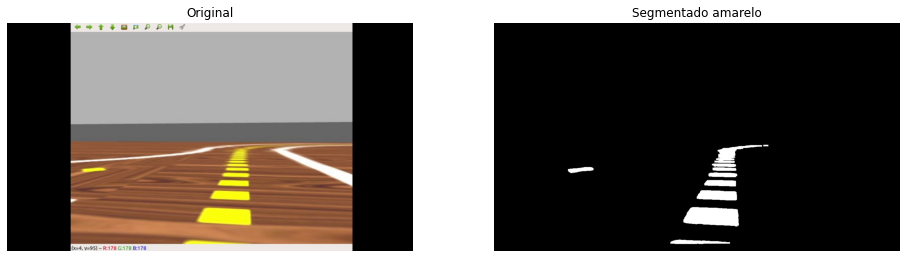

In [3]:
# Segmentar Linha
mask = biblioteca.segmenta_linha_amarela(img)

# Plot
f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="gray")
ax[0].set_title('Original')
ax[1].set_title('Segmentado amarelo')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada: SIMMMMMM to ouvindo um audio
# Uma imagem com o as linhas amarelas da pista em branco

## Parte 2
### Segmentar Segmentos da Linha Amarela
Modifique a função `encontrar_contornos` e `encontrar_centro_dos_contornos` do arquivo [biblioteca.py](biblioteca.py) para calcular os contornos e calcular os centros de cada contorno. Na função `encontrar_centro_dos_contornos` desenhe também o centro com uma cruz.

Dica: Utilize `crosshair(img, point, size, color)` (já está pronta) para desenhar uma cruz no ponto.

636.7807125307125
y
691.8446969696969


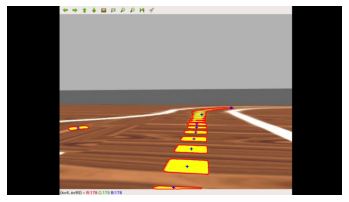

In [4]:
# Contornos
contornos = biblioteca.encontrar_contornos(mask)
cv2.drawContours(img, contornos, -1, [0, 0, 255], 2)

# # Centro de Massa
img, X, Y = biblioteca.encontrar_centro_dos_contornos(img, contornos)
print(X[0])
print('y')
print(Y[0])
# Plot
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Saida Esperada:
# Imagem original com os contornos de cada segmento denhados e uma cruz no centro de cada um.

## Parte 3
### Calcular Regressão Linear

Primeiro modifique a função `desenhar_linha_entre_pontos` do arquivo [biblioteca.py](biblioteca.py) para desenhar uma linha entre cada um dos centros dos segmentos.

Em seguida modifique a função `regressao_por_centro` do arquivo [biblioteca.py](biblioteca.py) para ajustar uma linha entre os centros dos segmentos. Desenhe a linha na imagem.

Dica: `cv2.line(img,ponto1,ponto2,color,2)` desenha uma linha que passe entre os pontos, mesmo que ponto1 e ponto2 `não pertençam` a imagem.

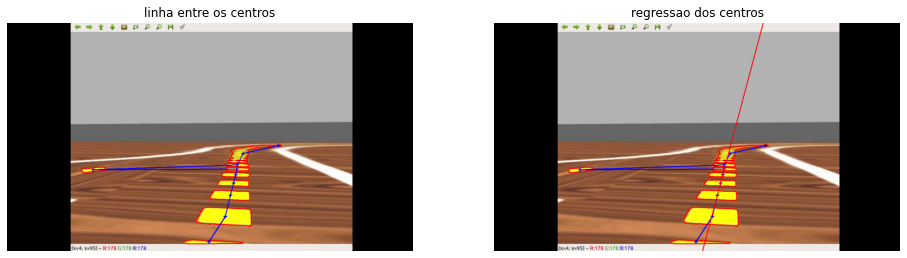

In [5]:
f, ax = plt.subplots(1, 2, figsize=(16,6))

# Desenhar Linha entre pontos
img = biblioteca.desenhar_linha_entre_pontos(img, X,Y, (255,0,0))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Regressão Linear
if X:
## Regressão pelo centro
    X = np.array(X)
    Y = np.array(Y)
    img, lm = biblioteca.regressao_por_centro(img, X,Y)

# Plot
ax[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('linha entre os centros')
ax[1].set_title('regressao dos centros')

ax[0].axis('off')
ax[1].axis('off')

plt.show()
# Saida Esperada:
# Uma imagem com uma linha entreo os centros e outra com a regrassão dos pontos

## Parte 4
### Calcular angulo com a vertical.

Modifique a função `calcular_angulo_com_vertical` do arquivo [biblioteca.py](biblioteca.py) para calcular o ângulo em graus da reta obtida anteriormente com a VERTICAL.

In [6]:
angulo = biblioteca.calcular_angulo_com_vertical(img, lm)

print("Angulo = %s"%angulo)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()
# Saida Esperada:
# frame01.jpg: Angulo = -7.534561718846401
# frame02.jpg: Angulo = -61.548618362057695
# frame03.jpg: Angulo = varia muito  # o correto seria -10.0

Angulo = [-14.87793022]


## Parte 5
### Repetir em um stream de video

Agora, modifique o arquivo [run_on_video.py](run_on_video.py) com todos os recursos mostrados anteriormente, para que a linha acompanhe o movimento do robo. Deve também mostrar o angulo com a vertical na image
### Baixe o arquivo a seguir para funcionar:
### https://github.com/Insper/robot202/raw/master/projeto/centro_massa/video.mp4

## Parte 6
### Ponto de Fuga

Robôs que trabalham dentro de prédios precisam saber seguir corredores.

Uma das maneiras de fazer isso é o robô alinhar o centro de sua câmera ao ponto de fuga do corredor, para que sua trajetória seja aproximadamente paralela às paredes do mesmo.


O ponto de fuga é aquele para o qual as retas paralelas parecem convergir

Dada a seguinte imagem de um corredor:

![Imagem do corredor](notebook_aux/ponto_fuga.png)

Podemos traçar as linhas geradas pela perspectiva, seu ponto de encontro será o ponto de fuga.



### Revisão: reta passando por dois pontos

![Encontro de duas retas](notebook_aux/retas.png)


Seja o ponto $A:(a_x, a_y)$ e o ponto $B:(b_x, b_y)$

Queremos encontrar uma reta $r: y = mx + h$ que passa por $A$ e $B$, em que $m$ é o *coeficiente angular* e $h$ é o intercepto ou coeficiente linear da reta.

Temos que:

$m = \frac{\Delta_y}{\Delta_x} = \frac{b_y - a_y}{b_x - a_x}$

Uma vez encontrado o valor de $m$, a substituição a seguir permite encontrar a equação da reta:

$m = \frac{y - a_y}{x - a_x}$

$mx - ma_x = y - a_y$

$mx = y - a_y + ma_x$

$y = mx -ma_x + a_y$

$h = a_y - ma_x$


$y = mx - ma_x + a_y$

### Interseção de duas retas

Temos que na interseção as duas retas se encontram num ponto $(x_i, y_i)$

Sejam as retas $r1: y = m1x + h1$ e $r2: y = m2x + h2$

Vamos encontrar o ponto $x_i$ em que os valores de $y_i$ serão iguais:

$m1x_i + h1 = m2x_i + h2$

$(m1 - m2)x_i = h2 - h1$

$x_i = \frac{h2 - h1}{m1 - m2}$

$y_i = m1x_i + h1$

**Dados de teste:**

Caso precise testar seu código, você pode conferir com estes valores. As retas definidas por pontos $r1: (P_1, P_2)$ e $r2: (Q_1, Q_2)$, para os valores:

```python

p1 = (3.0, 2.5)
p2 = (4.0, 0.6)
q1 = (1.0, 2.4)
q2 = (0.6, 1.1)
```

Encontram-se no ponto `(1.7572 4.8611)`


Pede-se: 

* A partir do ponto para onde convergem as linhas do corredor, marque o ponto de fuga no vídeo.  Você precisa mostrar as retas que vão convergir.


**Sugestão:** 

A partir do coeficiente angular, selecionar uma reta mais à esquerda e uma mais à direita para encontrar a interseção.

Lembre-se de que na OpenCV o eixo y fica **para baixo**, por isso os coeficientes angulares se comportam como na figura abaixo:

![Valores de coeficiente angular](notebook_aux/coeficientes_m.png)

Lembre-se de que, no espaço de cores HSV, o vermelho se encontra no início e no fim da escala do componente H. Se você estiver filtrando vermelho em um só dos extremos pode não ter bons resultados

In [7]:
import biblioteca2

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca2) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca2)

## Segmentar Faixas Brancas

(660, 880, 3)


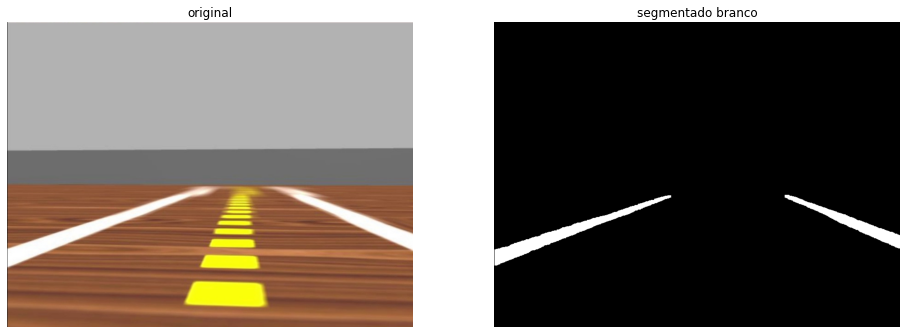

In [16]:
Como img = img1.copy()[30:-30,200:-200] # Remover barra de tarefa da imagem
print(img.shape)

# Segmenta Linha Branca
mask = biblioteca2.segmenta_linha_branca(img)

# Plot
f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="gray")
ax[0].set_title('original')
ax[1].set_title('segmentado branco')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Uma imagem com o as faixas brancas segmentadas

## Calcular Linha
Usando cv2.HoughLinesP() calcule apenas UMA linha que passe em cada uma das faixas

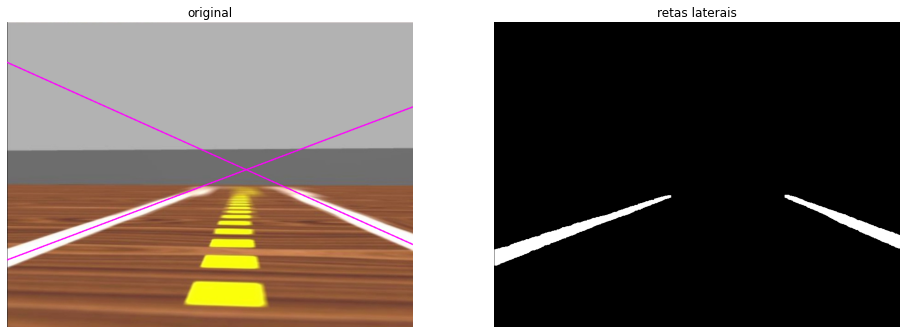

In [17]:
linhas = biblioteca2.estimar_linha_nas_faixas(img, mask)

# Plot
f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="Greys_r")
ax[0].set_title('original')
ax[1].set_title('retas laterais')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# APENAS uma linha magenta em cada faixa branca

## Calcular Equações da Linha nas Faixas
Com os pontos de cada faixa, calcule a equação de cada reta

In [18]:
equacoes = biblioteca2.calcular_equacao_das_retas(linhas)

for m, h in equacoes:
    print("Equacao: y = {m}x + {c}".format(m=m,c=h))

# Saida Esperada:data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA4sAAAFOCAYAAAAvqYhNAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/Il7ecAAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOz9ebxt21XXi35bH2POueq9il2fOsTICWhQIETgIhgUr4AhCMQCjbwLPoR7AQsIUlx5PAg+eYJEBPlQhM9HpL5UAooJhVIqeAP4QkIiJDnn7HqvvepZjTF6e3/03scYs1hr77OLU+S0b7LPWnvOUfTRRx9jt19vrbcmqophGIZhGIZhGIZhtHHPdwMMwzAMwzAMwzCMFx4mFg3DMAzDMAzDMIwZTCwahmEYhmEYhmEYM5hYNAzDMAzDMAzDMGYwsWgYhmEYhmEYhmHMYGLRMAzDMAzDMAzDmMHEomGcgIj8GxH52vu97W2O87iIqIjk93oswzAMw3gpICKfKCLPPN/tSIjIfxCRNz7f7TCMe0WszqJhvLAQkceB9wEdVS2f5+YYhmEYxn1DRH4F+AFV/Z77fNxPjMd9+A62/bvA56vqx9/PNhjGByPmWTSMYxCR7Plug2EYhmG8WHipRMS8VK7TMMDEovESRESeFJFfEZFdEXmniPzV+Pn3i8h3isjPi8gR8Enxs29o7fsVInJFRC6LyOfHcNGXt/b/hvj7J4rIMyLyj0Tketzn81rH+VQReYeI7IvI0yLydc9tLxiGYRjGvSMi7xeRN4nI7wNHIpKLyGtE5Dfiv7O/F71+iMg3Av8L8O0icigi3x4//7b4b+G+iPx3EflfWsd/tYj8Tvzumoh8yx226ytF5I9E5EBE/kBEXh8/fxL4N8Cfi23YjZ/3ROT/KyJPxfP8GxFZjN+lf9PfJCJXgbeKyIaI/KyI3BCRnfj7w63z/4qIfH78/eUi8p9FZE9EborIj9xjtxvGc4aJReMlhYh0gH8P/CfgLPB/AP9ORP5k3ORvAt8IrAK/NrXvXwb+IfDJwMuBT7zN6c4Dp4CHgP8N+NcishG/OwL+DrAOfCrw90XkM+7+ygzDMAzjeeNvEP4tWwfOAT8HfAOwCfxj4P8SkTOq+tXArwL/u6quqOr/Hvf/beAj4vY/CPyYiCzE774N+DZVXQM+BPjRO2zTHxGE6Sng/wX8gIhcUNV3AV8I/GZsw3rc/p8Br4jteDnh3+7/s3W887F9jwF/j2BDvzX+/VFgAHz7MW35fxPsjg3gYeBf3eE1GMbzjolF46XGa4AV4J+p6lhVfwn4WcI/dAA/raq/rqpeVYdT+34O8FZVfaeq9oGvu825CuDrVbVQ1Z8HDoE/CaCqv6Kq/yOe5/eBHwL+/H25QsMwDMN4bnmLqj6tqgPgc4GfV9Wfj//GvQ34HeCvHLezqv6Aqm6raqmq/wLoEf+9JPxb+nIROa2qh6r6W3fSIFX9MVW9HNvwI8B7gVfP21ZEhCAA/4Gq3lLVA+DNwF9vbeaBf6qqI1UdxPb+X6raj9t/I8f/O14QROVFVR2q6q8ds51hvOAwsWi81LgIPK2qvvXZBwgziABP327f1t9P2hZgeypBTZ8gVBGRjxGRX47hK3uEWc7Td3IBhmEYhvECo/3v4WPAZ8cQ1N0Y5vnxwIXjdhaRfywi74phmrsEb2D6N/F/I3j83i0ivy0in3YnDRKRvyMiv9tqw4dz/L+zZ4Al4L+3tv+P8fPEjfYksogsich3icgHRGQf+C/AuszPd/AVgAD/LS5/+X/cyTUYxgsBW6BrvNS4DDwiIq4lGB8F3gM8DpyUHvgKIXwk8cg9tOMHCeEq/6uqDkXkX2Ji0TAMw3hx0v6382ng36rqF9zBtsT1iV8BvBZ4p6p6EdkhiCtU9b3A3xARB3wm8OMisqWqR8c1RkQeA747HvM3VbUSkd9Nx5xuA3CTEEb6Yap66U7aDfwjgvfzY1T1qoh8BPCO1jmaHVWvAl8Q2/bxwNtF5L+o6v887hoM44WCeRaNlxr/leDh+woR6cRF958O/PAd7PujwOdJSJCzBNxLTcVV4FYUiq8mrJU0DMMwjBc7PwB8uoh8iohkIrIQE8SkydZrwMta268CJXADyEXk/wTW0pci8rlxvaMHduPH7eigeSwTxN2NeIzPI3gWE9eAh0WkCxCP/d3At4rI2bjPQyLyKSecY5UgMHdFZBP4p8dtKCKf3br+ndi2212DYbwgMLFovKRQ1TFBHP6vhJnE7wD+jqq++w72/Q/AW4BfBv4nkNZNjO6iKV8EfL2IHBAW0N/pgn3DMAzDeMGiqk8DrwO+iiDWnga+nMbm/Dbgs2IG0bcAv0AI+XwPYVnIkMmw1r8MvFNEDuO+fz2ujTypDX8A/AvgNwnC8E8Bv97a5JeAdwJXReRm/OxNxH/bY1jp22nWTc7jXwKLBFvit+I1HMdHA/81XsPPAF+qqn980jUYxgsFUT0p6s4wjOOI6bf/f0Bvam2iYRiGYRiGYbzoMc+iYTwLROT1sRbTBvD/Af69CUXDMAzDMAzjgxETi4bx7Ph/AtcJ9Zsq4O8/v80xDMMwDMMwjAeDhaEahmEYhmEYhmEYM5hn0TAMwzAMwzAMw5jhxDqL/+ybvlE/5S/+pfrvgpDKzIhmIIqnwCNkcQsvgqhHUEBQHOAQBBEAD6pABghI+nsHZAwq8UwK5Cglx2UXVhwIqHi8KiIgZHgfMhJnerwWVnGxbSUORejg1ePdGOdAqhwlQ6VEFIQcxaOuQtUhKiAK6hHRus3hyhRQKu3Ea/chR7I4Mq3CbqJ4ASUPfUOFV0WpcApKRmiIIuoQVUQ988oACoJTh4rEXMw+tFUAF/Z3Gu4GmsXtfOh/MlQqUI33VwjRleFKvCooOHJEPEgJ5DgNx/CieBeutzlGrEfrPd55XL29og7EV+GadaYUUeuiBFVF4s/0u4jE8WIYxouRV330R5/w4Bt3goR/dAzDMAzjvqB6vFF+oljc2d3nmStX41HmVBlNX0AUH7Ofh71cFBF1i+ZLnvjvX9q22ea4fxclCKKJ75vz3Nk/p1rvoxouUiaO076O8HcVmdo/7pu2in2lRHHT7Fn3k0z+J27Q7iWZOfPJ9eL9MVsp4CC1I42FE801bbbVphVS93W7b5R5d5MogZOMnnv8kxthGMYHIa96vhtgGIZhGMYdc6JYbK9nDEJqnnGfvI3T303+fUL4zdUISXLIXCF5MnO+15Ol1dx9k56aON6c65q4XIn9JDObhGNNfpcE1Lwemz13+uy4trS3OO47af05YbOZfeJx6+01tm3efT5pGuFu7qdhGIZhGIZhGM83J4rFCW5r38vJWubOD/Q8cndta3sPb69QZb7mvmdO6P97OeY9fW8YhmEYhmEYxouVOxeLcII2uI1oeD40xfOlY04874Pqpwd0saYFDcMwDMMwDOMly4nZUK2shmEYhmEYhmEYxksTK51hGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMYwYTi4ZhGIZhGIZhGMYMJhYNwzAMwzAMwzCMGUwsGoZhGIZhGIZhGDOYWDQMwzAMwzAMwzBmMLFoGIZhGIZhGIZhzGBi0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4lFwzAMwzAMwzAMY4b8pC9F5Llqx31BVRERVLX+7Lm8hnTe+33OdF3PBQ/qGl5KtMcffPD05fN5XdPnvhtSe5+L5+n5eAc9V+8Je0cYhmEYxkuHE8Xi/WbayPDe31eDIx1rWjDeb+YZzQ/qfKpa/0nnup99Nm3U3smxH9S1PpcG/IMi9WH7nr0Yad+LdB1tMfIgxuC8cz4o2hNLD3LcvdiF1Yt5DBuGYRiGce/csVi8H8bO9DEehAHVNmzTzwdh4LaPd5JBeD/O6b2fe847Of+dkIzmdJ77LUjvhActrkQE59xzZvw+V164B3E97bYe1+777Tm7k/t/r+dpPyftc92vPkzP5Lzn537ep+P64UFENLSvyTAMwzCMlx53LBbv1wy8iOC9f2BGyDxvwbzw1AdxzuQpvd+GdJZlM4buvOPe7T2a7pfbGdJtz9n9GhPOPfjls23R/aCYnqxwzj0Qj/eD9pwfNxkxz2t6r21Jx31Q74V2JMP0xMr97Md0LO99Pdba9/9+nmf6Ptxvr2z7eEVRUFXVPR/TMAzDMIwXHyeKxbYxcr8NkOnj3w+mhdSD9iJVVVULnQclfNu/TwvS++ExnScI2l7G40TcvV7v9HkftFexLRQeJNNhw20j+34I+XR/nivjffp6UhuOa9/dHN97T1VV9TU9KC9WOkdblKY23A/a9yadp/35/RDV7XZP99v9Jp2nLMv6XQfP7RpqwzAMwzCeX24rFququu/rbpIAaYufB8n99IJNH1dEKMuyNtzu53mmDfTUXw9S+EwbvPO8jvdTGKsqZVk+cLFYliVFUTxwwdi+P/fbo90WCePxeMa7d7/XEU4//8d5E+910qI9OfGgeS4mJ+aFdN+vybbpcfUg3wOJ6TB4W8doGIZhGC8dThSL29vbPPXUU8D9Na6cc3jvKcuSsizvm5E7LwS0qqoHGkbVnm1/LrxXz8V5khHaNnjT54n7KUySWHwQHuHn2tucmLc+7l49i/PG94O4J9OicNqLfVwf3sma3ZP6/7m6Rw/SQ/agJz3meZqnz3+/1pCm47f7y7yKhmEYhvHS4kSxeO3aNd73vvc9sJM/lzPUD2oW/kEZ7HBy1tUHabCdZBDer/PfTvjcL9rryNrnehDMa/+9eP+e7fHuV//NEwptjhN1x62fmw6nnt5n+rMHcX/meUUf1LP6oMb2cZMet7tf98K8pFfPZrLgpO0NwzAMw3jhc6JYbIfUvdhmk+eFAD4oz8uDEjonGdYP8p48F/f6uRC97fM8F+e632L+uGM8l9dxp9vdbVufq/fKg5zUea6Z7vMHKa7vxFt8O55rr75hGIZhGPePO8qG+mI0rB6kIXU/DKh7Pe/zdU9eCG14NjzXbXwuhNxzwZ3e59u1504FwnP9/DzoYz9Ib+kLra9MBBqGYRjGBy8Pvl6BYRjGHExkGIZhGIZhvLC54zqLhjHNPGP/xeBtNF542Fh64WFi3jAMwzAM8ywahmEYhmEYhmEYM5hYNAzjeeF+rXc0DMMwDMMwHgwWhmoYxguWuxWMFsIaMMFtGIZhGMa9YJ5F475ixqlhGIZhGIZhfHBgnkXjvvPBUs/OePFyL5MWL7QxaxMwhmEYhmE8X5hn0TAMwzAMwzAMw5jBxKJhGIZhGIZhGIYxg4WhGoZhtFDVmVDU5yoU9IUWAmsYhmEYxksb8ywahmG8QLD1iYZhGIZhvJAwz6LxQJk2fs1zYrwYeD5FmwlGwzAMwzBeKJhn0XhOMUPYMAzDMAzDMF4cmFg0DMMwDMMwDMMwZjCxaBiGYRiGYRiGYcxgYtEwDMMwDMMwDMOY4flNcNNevmZ5T14yzFu3aIlv5nHSA6LHfP48M31rX2DNm+VO1tA+Hxdxu3a94DvWMAzDMIwPAl4A2VCFOzPYDCMZyC+l8aKYMHjQnDSenq++fyG2yTAMwzCMlxrPr1gUeGkZ/sbdo7z0XNFCc53t318kz8xzdovuZcKp3a/3k+nx+mwQbIWAYRiGYRgvBF4AnkXDuFNeoKGXD5T2tU6L5duJkdt5p47rx/sgRp9Tofggj3GS6Lvdue+2bTL1c5oXyWSBYRiGYRgvel6yYtHq/U3ywlsz6HjpehPTTwU8d76ublpY6tTf29venZAMz83sPanHz4m36Hbetrvx8mnr552u85vuJz//yNo+ftpVkDo0+H5fS7tNHNOu2wlJwzAMwzCM+8fzIhZ1wrCLxuYc40fjNvcWYHa8UfXBJBdfnKbj7QxfOeb3e7lzt/MiHfeN3ta/dNJYuzNaAkPj3wXA10+CCKDCrBiZ53WdL4Ju33+OZ9dPd3DddfOOE3W3E1fzRKoc891tG3GbYx+z2cQxkmA8RlTfscifz/E9YSGqhmEYhmE8d9y5WLxPSQO1Nrsnja7jTfHjv7ldU8JZZOKzZ9PWFwv341KO62URV9+q5D1qvLL3cubJfVWnxFbtuJlnGD8ImR+N/9t6xo7dc4J2X+nU1nOPom3hMzlmJ6dMZMKpdfIdOGmi5CSBpcfuGS6r+TYNheM89SLSOk08p+jEvvV3SSDPnK+9f9qmaX84zknizLU85zN36pjPW5+ctFRUFFr3WGKjBb3r6IXQ1hMEod6PJ/455INpVs4wDMMwXmI8C8+iHv+P/rPIuxHMvOkNT/DoyLSx3JywZbLO7kfYUZJ3RSa9APdib50cfKZ3tN3dIXP/dlvpdi8N0Ua8PDvjNxr0J+4yKQ4n7nDrvMd7GJ8tt1t/1vp+zmbHjhlNIqH1UauvJvQSEq/tmNNPfyCCkE21vRE/MiFGpRFgIkB2fIOP64so2PS4Z1qmGiqN6JPbDTQBlTmiV2j/MtucuQ2ZOu4J3wtxMuJYR+xx/TTn1G3hm7yk0rqnLVEqcpvjzhy81eKTXlAPSnzdndM97puemxeZkDUMwzAM40ROFIuqgtcwSy4nGQsKSsWsbNH4t0mh5qaE3/F+DECnvq0Ny2CfyBwTNXmoJgxe1Whgt8P8bsd8g/rE5X2TdnQrUm1W7D4r5rW37YkRvY2xNxUkWRt3Ux49nTS8Fd+63tR3QUykOzdjH2rSASd3VH3v1E8Z4TJhdD+b/prp6uPOLtNjNe54zL4CuGM0XqC5Bp1qg0w4LCX090Q/Hy/31WfUXqY0hrU1WdJ6MFVBW/2mU/eVevvmvBPtajUj+P+bqZ16jCioTHq9wil9eAdIfYjmtK3xo9KJXuSsngQSJLZrTnvnfjBnPEhncuso3kSkjsZVnbz8tPbwbrVXeJ3Ma/d84TvLnPdLHBfHenbrEOS0r594H508kQXTHsu5288I3zR5c8LR9fj7o+JaV/SglK5hGIZhGA+CE8WipBnzZHid4FpRN++7KYM/WY5Tm57k/2iEjJ/4AckwTkZsbQHWe7kpA2bC3pHbmS3TXq2W/2ZGl8nkbxMeJqaEwclG5Lxvg/059Y1M9s5JtlywadseoSljblowte6RU5k7UaCtzeZOJMxrT21DS7RDNZrqvtmhvqCT+un47+5ULDZyy6EyXzA0On9KMM1txWzYYKPPZMqgD9crnLQSMp5BhZTsJ407Va2fxeAxC+JdJUzwpFvdvi/16dtfSqsf2v2tGiWtRGHXXEcjJFvHldSu2KYkMGdmVQTntWlD/cyGe6/SFtH1lE99zNkbK/V2M++mtjhO3yWvqLQ30bmTHXeC1v89dibnBKbfL+39ThCwIriJkehid4a+8NPtmbgHMrHndAIfmfnljls1ec6575c7n/AxDMMwDOOFw8liMf4jr06iZTFppiSCIZeyV6Z9m0n2GXNEW4JRFT+RiCMJ0/bfWvu2t1TBu7YhOPFlNN+FxqicnII/OQHoCRbkSRPsTIsKaYxKmRZms2c8YYJ+yqjVpo9vg2ry35x8DW0vUFsMtD1ME16PxkFVy4f51z55PSKCais8OMVpSnNP7na916Qna/4W6ZqkVkvzjdl0vbWkmpkkaI3ztrQR6mOHYyQhGf4WxF3V2vi49WnJ8K8AH8dGvBepL+s+FlwSvbHr6rNGQZkGmOJBfevKQLTdhslJhSTAJcaE68zsgDSTF/6kztdw3UmwpQGfLuY2t/z4r+e8lepjJ1ke32XSGrYyu7cy5yYfe9Y73/a4IwSS67MZM8cfV1CysBa2vtkuPkOtd1wamFPPkc6dQYjfpTGsyds72VQ/8cHU3dD2eU+aVDEMwzAM48XEbcNQlbDqT0WC8anzjY3G4Gr7Awh2TDshik59LxIN96lzN1bsxPo1nbak0lfTTjOZMmfmJLiYMH1mxMkxUiwaucflmZyUZNLa7vYm0zwjsZ1MZsJ7Is8i8c+Uy0AmDiOTm0z5uqrae+vrb9s9GbxZOm2TRmNTjhF9OuWIc42QbBp2pxc1feQTu1omZi+kSURTD6RZOaiiOG1WDs6cj0m9M/3ZZKNi8hOoBdZxnpcwksqoUuPISl5+FJXgjROl/uN0jp+43Q4JGVVVfWukCrjWDdH41GuaZCEK4PZNS89Hei6zKIpPFovJi6yqSFTf2hI58yX7vEmYyW2mnGStpilOwyTXRLKh2Pzbe8xORm47Tk/auaob2zwmk5Nuc4lh240HNvZRPYTj/jLnvdZ6h9SCsNl8atuZBre+SPfFT3yXJh1mTnsPfWwYhmEYxvPHyQlupMRJEgng8LW9MP2Pv0g0UluhZPXfpZnhD8aJm7RMolEjtWXbGLEajeJZNQGo1ObS9PGaNiZLSCaEZn2uZDRKI1m1Nsq1ZXBpOuhsNwXrOwrfViPqzCZTBtqEYJk40IzF1hj6UWjX4lhpwvx8mPWP300vOZqN0GuvIAqGup9q0IRRPfVpI3TCnyQYk6qQ+vKkdS8mjto6niC4EMLYzgIpk3L8BJ/GhIiQNI7mEr3kaVwkhZUETGzL7MxF6NPKt+9jWyqBtp4TJgQoTUbZKLy9woQo0PmeRUVQyaLmaYI/JR47TeQI4KSRukncqTb7pVBVmQrFbF1iu5uaD5OXaY5Q85La4+L1TAmdNFkQOyromLSNn8yqK27SwViP79RWH/9MtkOjZ9LRad4aMtlfKoJ6qTtFZDK0+iQZc9K4A53TK3dGGC/tt4XUfw337/hWpUgMl6Yd4rOYQruPmc+b14r6HoeN67fTsUj9n7B/ve6zXiPq6+10er87aJFhGIZhGC8sThSLuR/Tq/qgPmohH71IikxZUW7C3tVW9sFgpProQQj7ujoRR3CaRCNuugE6K3SarKbBHPG1S6FZFxYSWWjLaAwG+5TObMRXy8CSliFUt6ElHNOPCVsu7eTbB0nWutRruaY3vx0T6f6TWKT5KEmGRrWEc2p7t8mrOZa538uMZmutNUx/0fo86tM9bKuNqQPWJ2wHrkaxmMRaW+RPt6cWoJPHaq7jGCGexKDPqI1c8YhriV4Fca51z5PgC/ewSldXi41aueP81PW2Jw7iGsM0Dpv5izRZcVKZhJPunaCtdFE+CncfnyfnW2MoaYrUh0CabKnb0j6t6uRdjOsuw5D2rS9S71UgFS6NidSHLUUdJouy+EH6qc13U+4on9ofQ+C1NaDbj5hE0ezrqQ8J6jkKRp+6WJJYnfRRnvxsTEqeiV46tmbknZAzXzi5pPKPb2H9rKffdfIddSJzNogfza4xPWnvyXPVYpF5CceOOa9hGIZhGC94ThSLneKI3nCXjlZRuM2GGwa0ZbQkW0YmbJq4VQw5c5Mi0E3O9E+Zrcx+0/zU2lBq7ZEM+dqjGbapqmrq6Nr6b/vIxxk2U56AaUSisdyaR5dWaN68w04IHWbtQgGXlHh7rWf8JV2rIwngeIgk4KIom9GZ9RmPN+JUZh0criXYRFz8QCaOJK39Jy+OyQ/aoqll/E6HNNe7T/VVe5zVY2yqwRNXqIRyBpo8IkFK1B4spK4L2E7iooBXxbf6X9q/AyHtCBMe1qRrNSV1mZiI8FN/Pw7HhPqvt3V1nykSN2sS3Xj1OFwj2Oru1HDLNJs484yBL0lSR7Ec74qPCa/qaYEkeMU31zQ9pGrxHcW6uig6a7U30Qr11CGqAQ/1hELcLCnftL/Ea229d+pJBwkiNUx0xfF6p9rl2LWzScTerVg85pj1ZMgxx42nDLchlOdIAdLNOD6pTceX89B2VuI5z24dQD13Hqfx+k68QyfeIRaMahiGYRgvNk4Wi9WYpfEeuS9PyIQakZZoi9Za2xZMSQlrIzEaEyE6bPLYydioRUfrG5nYSmfFVvpF4pqu5oPWtsnoTAbvpE04XUpupm3pumRys+bwjXFfC6t4yHlJNeYcoLkQEZxPiUtiOCFMZIIVAO/x2lo/NNG2yayb03bgicuuppVfvJDQD25uFtw6nLe11nS+d6TtjWgbucnDmO5cS9TXHT/d6HQunWjuZBkCQdTFXCC16mtdpgseaJlsich0eRc34cUOG4b7UYsp1abUhqT1cgqaSh14kLBuUKN3czKpkzb3UIlh3k0/pL5NoYhaputwpPutIs16QG36J4nsdji4+nQNMUxTHF5j4GdMQiSSBZESXH5hskAEcUKdNKd+JNs9pk1EQhS5lddaa7ko/HxruxRWi9P6WrXdIfX7JPRTEsbttbLiJF4LcRInjClfb0MQuTIxYCYmAU4Ui7cVZun2z67dlZk6LDIhqicf0ulnJ/VJHK9kYZcJoXxntAXg7IRB60AndcNMG6XZRWlN4JhYNAzDMIwXGyeKxQxYqApyLQFSno25RL9K25abQGjs1QmBRTRaW580eySDJa19mjY2TjA9lCiekgU+T56l0NQp8aEn21vSCjedSOwK9RqqiawiKkx4z45rcr3uZ/LSJoy5umFzMo3WBnmr9SJRCRyXkud2CG03zITRK8Sae1HEzDQoGaMzX4I0YqI2puuQYWkJyLRNY3BO68/kPav1n2Stq62o11WJkLsOkme4PEeynCzLyF1GJ8+RvEOed8jzjCzLyLIOeZaTZR2yvEOWO5xztUjy3uOrisp71HuqyuMVqrJCqwrU432Fxp/eV1RVhVY+eHEoUKq6gKNEXx4uCktRPBUi8Y+GpDDhfyVEYRtEmseXSUGFe64oVaWob2o7Qgjv1LSdRC+fOpwI4hyZy3FZhrjQRziHyxxZ1qmFSZZluCwnczlIFjy2hPWYWnkqX4Jq6CNf4b3ifYVQUaXP1eOr0Ieool7xWkGloFWcGFB8HBel+noYpfHiozcsQ/Ct59LH48W/Ir619rL1IGkt3qfFYnrgtNGFrWcvDXitPWrz3hgxddGU513b/62f+en920JtslRJSJ4bS41MPXu3DyVtvZzr69ap6zuOORND05Mm8UDNOu6mGw3DMAzDePFxolj03qO+whOy9tX5QKYNEk058aZmxaNHYlqITdsNStX6y/zZ52kP3cz3rTbNzOLXbZu5Qmbcg00zZlo50RaS0GXKCmwEm0ztBVGeamvzmS0gxZMmwaTeTyblqBPhyKTdByQXbtvmbQuzcG3TBuMJTIf4Tt/6tgiVyQ0nMo1K02/NppPTBnUpyCnDNYnNifV3Lfu87TfNJPjaKoI3yYkjz1wQN3mHvNcj63TIuj3ybo9Ot0cn79Drden2ekEsdjp0ul06nS6dTi/87PZAsiBevKeqKnxZob6i8hVlWVKWFd57yqKgKit8VVKUY3wxxlcFVVlQlkEwomGNXyMoYnZS5xGpwFUgHpUSkRLnMoQq3EsXhILLFJFwTkXBC95LEF2Vj4LLUZVBFKkHXwm+Cj81TqiE7x2ZC0I5dx06nR5Z3sPlOa6Tk3Vy8rxLnnXJOr3we96h010gy7pkWZe80yFzWZy3UIqqpKoqqir0V1WUoR+qilLDZ0VZUpUFWnl8MaYqCqqypCrG+LKirIogerWi9GWdiqiqKsQrVVmB92QqaJVEaPi+0uA1VB/EtLRLS9SvqvR+ah7iepxNacD57x7XjPNjBNG8bMHNQaX9o25bkxxp9kmR+I6ZeFdK+3mfbPPsOSda11xn67xzd5r3VS2o2y/2lK21afjU/I5hGIZhGC8STq6zKIrLHE4dKVfkcfPnE+UtaBkFx1hJ7cpzE14vN3WOuvh4412b8MDVIqRJrjIpJFpG1OwVxuNMXpWq1tktJ7ds/hLa4WcvURsDtPaFJY8Z1FlH0/qied641qHSAWbOkX5MeBymwsZaDpQJUSdMfHEiM46KGaU/X23O+Fqk5WVszRhMOSobfFOHUaJXcGbNYsvbGLyRLoipzNHJMzJx5E7odHOyLMe5nDwKoLy3QKe3SN5boNvtsbCwQHehR6/Xo7u4QK+3SKcbhGWed1Hn8NGbqFoF29gHweJ9FYTguGA8HjEeDilGI4pxRVmC9yXjYZ/ReEgZhVG4gujVUoHoQUQ8IgXqCrIMyMBJRZZ5skxxmQ/PpUt/r4KXEUVbiYJUq7CSzWsQht5RlUpZhD9VCVXp0UrAKb6QIG7HYzIp6OQVzpVIluHyjCwPYjvLu7i8S6fbpdvt0e0V9HpLdLth/GVdRzcKbcmy+iENHkZFvFL6itIHMeerirIqKauSajymGI0Yj8eMh0PGozHjYkRZhn7NyzJ4Kcsq1GusgrhWH2s3eh+9vMFD6WPobzh3GbNsUYtZVQ3b18+iRk9jCueMnl6dXRc9McqPqS2Z1sNO7NsO556WgOk87Qd3HhLaSS1SU+jwrKCbFqFNtuHj3+XHo03TZxvVOrdMHr91/bd1XhqGYRiG8YLiNmJRcC6umauN2rZYa8mOllVST1Rr4ztrGwltISGAl2ziu6lG1L/OM9hmo7caUTERqBlP2ggwievThGmv5IwnYI5hJYC42bbdLuRq2hfYbuNxhloK9JzwbMzxAjTJWaaZvgPzZ/plYsuUPCht9+x8AgpNWODEp1P+1Jn2hr6uA5NVg8BuYkzrTlY0hE5moY6ecxlkoM4hmcMjFOrxZYlDyCUjIyfLFuj1VuktL9NbXGJhcZnF5WV6ywv0FhdYXFym0+3FEEwBl0HmKGL2SwdkEmoaalFQjscUwwF9OULHA6qqYDg4Ynh4xNHhIf2jA4aDI0ajAZWvwqo9EVw9JgVVj3MaStW4Eskq8o7gOhV5rnQ6Sq6eThbuUuaULIMsC55GcYpqWZcGkboUTBZDTsEXUIxhPFLKkVAUAkXwUnovlOOKsvBoWeG0QKQDkkJSQ4iqZFlY6phl5J0O3e4Cvd4SC4tLLPSWWFxaYnFhgd7CIr34s9tboNfr4bIcCQV4wkhwgrimBIcvPVVZUhYFo9GY4WjIYDig3+/TPzpi3B8wPjqiGgwp+kOKckRZecrKUzHGiYT1lN6H8hLaKichkGqT1u+mGM4pmiajopdXlZTx1RPeDy6bTQwTwnen32zN6Ja4LlJmHt62G5DWw60ho7K0jlXvN/2kysTh4mzRjPuzmU6Jz9BEFqzWeVOfnEjyus55T8171Od8cCcZVw3DMAzDeOFwchiqerz34KtQh7AuuDxHjswVcsnTmMTbpKGQBMHJq+lmvX6T56CevW+8dRqP3xYmKVFJs99E/cTW8ac/n+d5nLePk9lkKGk9VKNhG/NtlllRl9oy4YGrE6a0BbqkCX2SkKJ1tLZ4vzN0bmIOnTIs29vcmSE4tc2UEE8ZLSevLWzXeGUhZR8NTtyY9Mf70A9ViXoN6w3zDt1ej87CEgtLqywvrrG4vMrS6hoLy6ssLAehuLC4RHdpgbzbQfIOWZ6Dy4LXyQlkjk4WJk/ElzhfoeOC8dEhflgxGo/oHx3SP9hncHBAf3+Pw709DvcP6B/1GRcjvC9AQjKWKBHxqUYmEgWeJ+soeQeqClxVUPXCVl4UKkfuQmiyqwBxCFUQnrF2ocvSc+EIde/C8V0ukINmimSCjjw+C6U2Ki84zaHylFpCUaDVGNUccVn05IYxVkn0armMzDlc1qG3sMjiwhLLy6ssLS2zsLTE4tIyS8vLLC2vsLC4yMLSMp3uAnmnS9bpBJGfZ6HkRZaByxDnos8VyrJiOB4xGg4Z9PuMj44Y7u8z2jtgeLDP4cEe/UGfwaDPcHBIWRSUZYlWJQ5F47pHl95DafKiNYZrcRgFVP1eiAovaS/vddINHsdeyiob/j5dZ4ZWaaCpsa9Tz3r83tdvwzhlc4yXUdthn0lX1tu2jz05YaZSzYrP+iWhU2+gRnlqzMo7PbnWNL+abM8x7xrTioZhGIbx4uI2axbD2idJ4qMdBniMiEhMCI0pEZdIhSymzYqJhBNMnnNW8Mz3PGpaR3mMZ3Ja9JyE95NGoNaGZTOTHzRayuk566+7E52mU0Zc4+Wc40GcOD6xzIVE8dT0e8oGmbwmCGH924TRNmvB1fsdH3R2W8vvdiK7+XzetmlkNGvIQrIYjWvPWkXh49pYcQ7nhCzL6S1Ej+HSEkurq3SXV1lYXmVp9RRLS6ssrqzQW1qms7BEd2EhhFt2HGQueBJdFoqHOnBZFrxgAqjHDwchZLI/YLB3wGB/j4P9PQ739zja2+Vob5f+/h5HB/scHR1RFCVB2vvoGA0CTkSjUInXjCIOMufIM+jkjiwXOjl0u0reg04Pul3oLgjdjpBngrgyXncW6wkqWWyvpJ8xg6avhNFIKUcwGlQMR57RCEYDoRxkDHNlnFeUIyhGoIWivqynHlQkqRK8lnG18ZDh0RFHec5Bb4nl5RUWl1ZYWl5mYXmFpaVlllaWWVxaYWFxhaWVICbz3gJZliFZhmQ5mmX4zIGEsNfMZfRcKM/iy7CmsRj0GR8dMjzcp7+3y9HBPocH+xzu7HK4v0//4JBx/4hRv08xHlKWozDAtHHA1c9ufKclr5u0niWNqZtd697Ug5X6IFPRCxPTHkx4DtOx039k8smaTGHTPqRw3Mujfl9oa9t0rNYkTHuEpXfBvGdXpD1xk9Ze0xxL0nln3YiTobZT52j9/uwmrAzDMAzDeL45USw6cTiXkanHy3zP0UnepEmRlTxfc2altWpmx0mCJ878y8QRmL9GLs1+tzyYorSzrLZFl0ajv2nLHK8o0yee+qsELZG2bMoeTJapmClTf5sSJNNrGEMocPs6ZSKCrf6m3dxkCE8YuI3h6qvp9Zh1509+NncNVPN5utLjxsVJYlGi5ybd53CvU7IQmRDOqYxCbZirr8Oig9hw5HkevVlL9BaWWVpeY2llLYaXLtNbXWVhZZWF1VV6C4tk3bD2TrLgOcM5JIteROdQcVHEhL6UskLHJePhgOHRIaO9PUZ7+wz39hgeHHB4sMfRwR5H+3scHe7SPzhgNBri1ZPFWpTJWBcvtVgI46MJh847QQzmucc5T56FdZdOPBmKUwX1UIHPlEp8PI4Lfsoq1OVUJwhVEKQuepRQIISUusyRdaDrBbwglaMkJxOhm0HREcquUA5jQhwfx164gFoA+DhuYhQnvhgzPDqiKkqqogjrD0dDxuMRw8GQxaUBo2GfhaUlusvLLCytkC8ukCm4VHpSQlZVyQTJBcXh8i6us0C+ssrimdOsFUP8sE/ZHzA+6jM4OOJof5+j/T0G+/v0D/aCl/fwkH7/gNFgSFmUIclOfC+JxGiANBGmRDEcn9laXbbHcZPKa/Kh0fhYJPGm9Xm09RiqT2+IuB5ySkTVof0Twu8YkRWFX/1e89osiQwP5tR+YV1vyjY8e7jZSaj2xdbvY2m2ba63PSkXe6pqi0gTiYZhGIbxYuREsZjnHTqdLrm2PAoymeUziaQ79SIlj+NEsYyZGfm24XGykdE+b5oZ15gdMkiZJnT2uPDRu53tTlqqFm/RaJ7wNtT2YOi15HtsxFTjOdA6zLe5niSm0sFEpg1LndhnPu1ackLygKZWBYM/GtC4CefJVPG/lmukcRxMe16b/kmGcKszIi55pwh5SkBCuGCaJNCYDEhBxOPwVKrgwvqxPOvQ7S3SW1yiG0MeF1dXWF49xfLSGsuLQSz2VlbprsYQ014H1+tCFoRVEPlx7aCCaomvFFSCWKwE8Z5iNKLs9yn7RxwdHNDfP2B0cMjo8IDB4RH9w0MGh/scHu4xODxgNOpTjEd472eei6Q/krAIy9R8LMkh0bsY/uQOssyR50q3C71FFzyKC55OpyTvEkI5XVbXOlTVkME4ZkVVlXiDszo0Vb2jislgKo3L5ASUCk8KP4eqEkqFMorFULPR4WO5iXT8OixaQ7KYwaBPlmUc7O+Sd3t0F4KIX1peYXFlmaXFKOqXl1mI96i3tEJncYG81yXLO2F9Y+ahzJEcNAd1Hjy4DrDYRRZyeitr9EYVS6OCU8MhxeEho6NDhvt7jA4PGRzsc9C6N4N+n6OjAePhiGI8ptQKfAhXFR8fEZfEr69FkTiZGvuNa3Dacxcy02rzvDHttWsJs7arsSUmQ/Szm90+7tQ8U1I/h7Ujj6Z8TlPjsC3wwjtymtaUUj0Z4I55r8973TRLAcIWTmJ5j3ZmZPMsGoZhGMaLihPFYulDanvVcmJ2e7puGNy5ETCxxo2kYU72tt3JMWMr6uOiyQdQzdmjLZXuntpj0Drs/PDcdkhnErRJsE1uP5kURkmOpKCaWmapTnkHZbJvw2etfmmtXdOZxDPtY056IpKxKcfc3iR4nTu+L2tjtjZWQ1sar6viVSi9h7q4evK6+XDuLGQ07S4sxtDSNVbWN1he32B5fZ2VzS2WVtfo7a/SHa3QfWWXvNvD9XpIN8flLq51VEJq/xItRmjMvlnFTJtlVQJCUVWU4zGjwZBxv8/w6JBicMjwqM+wP6AYDBkP+oz6YT3daHDIeDRgPB6GGoO+lQmz9lZp7fERhaQFkuMxy7TOeOqyirzj6C5WLCwpvSWltyR0F4ROtySPiW/EJbFIqPlYQVkqWsF4rFSVUBVQlkEAoqGIe1VBUXh8AeXY4SulKhxloYTkoi2R44InUT14reK4l2Zc0hYKQeyUpWc8HuNGIwb9Af3DA44W9+kudFlcXGR5ZYXVU+usjEf4qiQHFvIsrhl1SK+LZN2gDH9+kew/LOHfNEL+RKg9WVXjkF219FApKo6s06O74ugtLLC8vMzo8IDx2iqrh6cYDrYYDI446vc5ODpi2B/Ee3nEaNinHIWyHd7H8aa+rgaRhPH0mFfvJyZewk2FunSEurkiKU0UNZ81oqz9jj0pamPe5NydJo85LgT/pHXnd3rM6b+n155M/mIYhmG8yNnc3OTJJ5+c+Oz3f//3OTg4eJ5aZDwobpPgJhS99hpES0oYU6WYM2nsozst+T6ReZS47/SaQG2Sq5xsrAQBNZnNtP1zet8Jl9ncUKwHwfx1lrPrGJslPm0p3s7g6OvPJRVkr/G152j6XGG7xmspbtYoDOd0c/pbJn5Mi8nmp0x+Ordrtfa6+mg4pqY45/DJg00Ya5KHwu/dTs7SyirLqxusbZxh9fQZVjY2oljcondqnYWVVTK/iPvba/B7HfRtA3gMVBxoDMGsgkAsRyOGB7uMD/bw/SPK0YCiGAexWESROBwx7PdjGOWIcjygHA8YDYeU41AmoxiNKIqCYjSmHI9CuYZYYH6iX9vrx+JMhriQYVgkhV9qrGPqEfGI82Q5ZL2CbKEiX1byZU++AFmnQvKCELtJKDfjHE7Bj4ERFGNPUWUUw4xilDEeQFmAaBa8mV7reoup7KOvNNZcFHwVXGzOOVwWEuVU4mNIqmt5nScnatSn90Wa6BjHvhpSjPpknYx+t0v/YJH+4T6Do0NG/SMYj+h46OQ5+dIi2UIPuovgFmCwiF7r4ooO0glJYBwF6sdUjKmqAsox49LjhxXVcIQWY7RSyDp0ekuUldLxyoLkkHXp9pZYXFxkPFwJ6xuHI4rhkOFoEJIRlUWsXxnrzcZQ7kbENWNZ440MGWnBqZz0EMwVZXVSribmvPY2T+/TDlWdDlud3uZOJ/HmCch5Ca6eTTbTmRBU04mG8ZLi7NmzfPzHfzwAr33ta/m4j/s4ILwbPudzPof3vve9z2fzjHvkDW94A//6X//ric9+8zd/k3/xL/4F4/GYt7/97QyHw+epdcb95LZisfTRkox/pxV+1dgAMmUYxJnyqe3mMe+r44yg2dlr8No+SUtg6RyPY3I5tsK0JtvR/vwkI2u2Te1zaWpcPOl0yJfG/Wak7ExpkuY6p8WlTBmjTTfNGo3BztWp46XQw/b+KcNq44Vsd0P4Jnrm0idTazAlCXyZLAoysY5TAZUgEONxJAMkQ/KcLMvodrosLK+wsr7OxtYWm2fPsXnmIutnLtLbPE22uEjWXUDyHpp1IMtQHOV3OnTXIx/aQagQPM6X+NGQ4cE+e7eus3fzBke3bjI+PEDGI6piRFUVFOOC0XBEMRxRFgXVuKDyoTC89wVVNcJXnspXVKWnKit85UPiHV8F4efAx7p7yfDXdmfXYzB4nyQU0qAuaSCePBd6izkLK47FtYLlU47FdWVx1QXvYq+DyzrRA0nI0Bq9XdVIGBwpvQNPfzejL0I1dvhCKAagPkd9FmoPhnr2USwGgRidZXjf/K7pM40CN8qk9oROM/4drjWpMTEiVfFlSQkclSXDwZCDvX12bm5zsLNDf++Azf4ha8UFlsWRr3Whq/B5Jfp5ipIhZKAdHB2QLlnuIfNIL9RprHqDEG56uMtgUDAeVlSjIoQXk+Pw5NKhkhLyDtL1OO2xkGeUvQ4L4y5FVYb6juOCKmZYDRNavr5e3/Ls14ml4t1OZRenQzgTzrljw9/bE2fez6nTWHfl9HvnZCF3JxmL5wnD484/fc557+l2qGxrj2OPZRjGixcRYWlpic/8zM+k2+3yuZ/7uXzYh30YZ86cmdnWe8/W1paJxRc58yJgPvZjP5aP/diPxXvPpUuX2N7e5ju/8zu5fPky//E//kfKsnyeWmvcCyeHoZYlo2KMahVi5ZLHyzUGQigXASloMKC1h6heh6WTs+YnMiV8kvjyqvV6RCB6MKZm0JPN3QqJC4kkqNsTdFbyxLU8jLW3BI5raqjHNmugNdemUx6XUJpA6j+t40wf2084pZrP09GmPI9NN02KuoZGHbbDSNtiNEk/TesaY32+OmTUT15rhoblWCiIw2kjGFQbL6jEE/g0ZpJ4jJ7PutZgloXjdHqQd1lYXWV1fYutMxc5c+EhTl84z/rpM/RWT5H1VpDuIpJ3UBHUOVQyPNJ4th9V5FGP0xIthpTDQw63r7N35TLbVy6xff0Kh3u7VMMhfjRCi5KqGDMuC4rxGF+W+NLHNWcelehdp0QpITrVJ9aV+hg2q5MemqYES3vtVxwfEqR3pQUh6UjwyuVOyXtCb1FYWMlYWBW6qx63UFJlFUPvKQqPq8o6GU+al3HiKAthPBbGXqgEKg9lmTEaCkcHnnLsqSoXlun5JBZD2Kr3Ul+XIqiXeP9bUl9DqY44rCbH6ZQAajxw4ZLTPSuKKnynY3B9bm3vcuP6TS4tP83m2XOcf+RRzj78OJsXH2Hp3AXcyirS7QWPuDggrLsU3yFFOPhORdZZJF9cobu2yUpxjsHBLvs72+zdvM7RzeuMjg4oDg+DqCxGjMdH+GpINR7ii4qqrCirigpPpR4ycJUjz0PYbhDMzTpn1dhPWqd6qp+6cHfLVj9M9xUTQltVaxEZJoZO9gieJORu5x2c/vykcx231rvdhuntmmOH++813LPw+Z3GoBiG8UJnYWGBhx56iM/6rM/iIz7iI3jta1/L1tbWsbaeqrK3t8dv/MZvcOXKlee4tcb95t3vfjfvec97eOKJJ+h0OhPfOed45JFHeOSRR/iu7/ouxuMx29vbfO/3fi//6l/9K65fv/48tdq4G+QkQ+Gv/S9/Wj/64VN0YrZSUeqw1KR6avFVVRNGUe1VaazPY2fa26Ueamkkx2zT+j2Z4vVfCLv66Elrjjd10W0jNom4CV+jxnVkx6wbUjfzXf27TGZwnT7vSWKx9jI1rpjJY0+0ofFQRhU240lNwhlteUxbnr/o2kIlZtLUqjlOOm4ro2xbU9eRdvHcSUG112imiYIQoudqcZdl3VCVIsvoLizSXVlldeMMp06fY/PsOTbOXGB58wwLS2vkvUXIO2iW4yVDs4zMa6vtMbGK+hAmXZboeMj4aI/dG5fZuXaJm5eeYv/6NUYH+xTDI4oYoliNS8pxSVWVoT6frwjrJ0NNUZ3IfOkJMbNKyijpfbNOL21YJ1mqhWLo+yakMLVdk4Ym1FdUstyzuAorG8rKhrK84eiegsVVwS2WZB2PZB6XKU6qkIhFHEgzXn0lVIWjGEB5IAx2ob/T4XAbDndgcARVmRFq1wehG0qphp/1BI2GiYImrLtdkH3ac9SM0XnhklqPjdDeOtNuGlBOyGLNxk6ny9LKGuunz3D2occ489gTbDz8MKtnzpItr0C+EDPc5LEZoahkGI/aOL21hKoI5TbGfYZHexzd3Gbn2hV2rl/jcO8mg4MdqnGfajigHI6oipKyLCh9SeVLfFlC6esso0EUhnqfGkNTQ1RFy9eerks9rlUc6LjX7PQ7JPXV9HtrJnx/zrvppHWMt9t2XruO+7fhuHt8nPfSp1dU7It/+CO/Ye7Fe0TkuFXkhvHg+YzP+Aw+4RM+gb/4F/8iTzzxBMvLy8duOxwOGY/H/PzP/zxPPfUUb3nLW7h06dJz2FrjQbK6usrLXvYyvvZrv5bXv/71t3UKqSo7Ozv88A//MD/1Uz/F7/zO77Czs/MctdY4CT2hXMOJYvEzP/5P66sfOUVHwwy507riYh12lbyLtMKnjjNE6nn3OcZG3VhpGTktcVLrn2kROWVUKUHQajoYjeerSZkfvQHp7/G4bcEYnDazWfyCGHDN1cxcq6I04WPpZx1eVue2j/tOGNzNcSekcBIgUSGKS22o92z1i84IVhcuoG5dyriYjNhUSbOqZ/0lJvlgQiwGL2S7TbEd0dMoSCy3EsRRlgtZnuPyDJfnSN4l6/RYWFpleWWV9dNbbJ6/wKkz51neOsfC2gZ5ZwHJc8gzkA5KB9UkNoW6UIQEz5/zJVRjtBgy7h/R39lh99pVblx+mhtXnmJ/+ypF/xA/GiJl8A4WVUVRVviKWAVC8T4UnxBAnYC4qaQmWt+zNOnh5hjw9fa1wR9DMl0SjHE/FzxJkoU7mWXC4qJjbTNnZaNidVNZXBe660JnCVzP47qx9AYekTIcO3nuw4JHfOUpR8p44BntCoN9ob+dcXTLcbCjHO5XFGOH+qwVYiqxzEEaf9Hw1/Z4jIM2+syaIXVyDdHWXFFrwiiUw2gfOssyMkcU1jmS5SytrHPqzDk2H3qYs488yuZDD9Pb3CRfXgkTCAhIjmoMTw2zB2HCyIckRplqiIzAo9WYYnjI4GCP/RtX2L32DDtXL9PfvkV/b59yNKQcD6nKMVU5oirGVKVSVamfw5raWvxoRZYeE43PRCr/ouGpgmMmnZJXse7X5hlKkRrN2JsSXxzv8Zv1bM//fV7IafpH/k7WJU6L3NmMyE3oeZhgDN977/mKH/+/TSzeIyYWjeeSTqfD448/Tgo1/cVf/EU2NzdP3Ofo6Iif+Imf4Ju+6Zu4du0aOzs7t42YMF68bG1t8WVf9mW84Q1v4MyZM6ytrd1WOI7HY27dusXb3vY23vzmN/Pud7/7OWqtMY+7F4t/7pX6kRdXcVrWZuKEE7D1i9QepbZnpd0KQiIOoudvWuRpyoAZ/+6EeS1ri0MXfDw03prmVJNr6ZJoJDocm1T/yThrPALJ4zg5K1/XE0sOuTrBTNOeIA5hOnWo+iT0Jj0104hOzuZ7fN2uaQMuCLJU964lYJyr+8K5JG6TaGnOna4/OBBdk8xDYzsRfOVbgil6UNSTyk54dShZHWIcyjx0yPOcLM/JOpB3O2TdHourp1g6tcH65lnOXniIjXPnWdncZHFtHbewAnkPpJNcbTFFqIthkNFQx9ceObRCihE6OGS0t83+9StsX3mGG5cusXP1Oof7O4z6h1TjIVQFWlX4sqDSksJXlNE9ql5DIhRxOIkCrvaKp2HbZHtthxO3Sxs0cyDRm5jGhrZq3yWHWvQeOwcqIaFNtwOLy47VU46lUxW9UyW91YruakG2WJEtKC73iAtexMzFkEiR2Cehh9QrvghrF4vDDqP9nOFOh/5ezuAg4+jAMxoovspAM1AX1iZ6AFfXU0wisH7e22NgIuFL87zVoZlxXKU+dC7WTQScZGHMuvRGEcRlOOdiqZAwwSAiZFmPvLPA0vIqa6dPs/HQQ2w+/BAbD11kcWODfGkJyRbwdEG68XgOxEXxHxIoea1CVl9XoZRkvkTHfYqjA/q72+xdu8aty1fYv3Gdg+0bDI/2qIo+5XhE5YWq8mjpQ/kQwoSJB/BVXJ8ZpZGmmwzqwwrLWg5K8+6q4xjis1q/X+Jz7tLYqcfNtMfw+Bqm6d5M/5n3efuzecwTjUlUTifkmYxqSO+fIJwrLSfCT7/03/03E4v3iIlF40EjInzsx34sb3rTmzh//jyvetWr6uc8j+/oeRweHvLTP/3TfOM3fiN/+Id/eGxpLeODk263S7fb5Q1veANveMMb+ORP/uQ7moC8evUq3/7t3853f/d3W4jq88Rdi8XP/rgP149+6BROi8arJZNrZdKscjKLXFiMRnI/prAq0SAARVw9yxw2kVooxsbWYmHaW9Nuq3NhvZyLiUEm64k5Uq2yJqJLWn+a47U9gK0uS8sy5xpSzfa+Fs3JUJ7w8NXbN9832+qc8zaCNWrv4720ktY7Tc/yxzbMfNd4KmtvaX1Pk+gJ9zJ4TqTx6LY8tEEIVFE8ZTjXiUIxZC7NOl063S6u02VheYm1jXVOnT7DxvmLrJ05x6mtsyysrpMvLkHWQV2OuuBBDBccanAqIOprD2bwiBYQ/4z7Rxzdusne1UtsX/oA159+H3vb1xjuH1D0R2jlwZdo5fG+QKsSxVOqp9QUYJrGTz0VQjLe5zGdeKi5Z/EzTf3froeZPoy186IYFeeCWHSeLPMsLWWsrTmW1pSVLc/yRsXiOvTWPfmSIj2Py6NHNXmHJQh9PHU9O60EPxTG/YrRbsVgD/q3cg53cwaHOUd7Ff3DEq2ymIjHBQ+iSu3ZDuG102VcpPlZq9/kLdKQSbVKHkcfxpGf9GYlkaRtT5sI6f0kIuSdsEZQnNDJcrKsgyjk3QUWVk+xenqLrYcfYuPhi2xdfJjVjbP0lk7husuoZEiW43GI5HGyIdwCLx4vwcOYoTitEA0ZVf1wSHF0yOHNm9y68gzbVy+xs32V3Z2bHB0cUQ3H6LhAqlCTMWR89XgtwxiNeK399RDfTe1kNpPvkjhhIMHD6jVkyK2f39bLZDokVP38EPjj1iYe913783mhpfOOc9z3k8ePwjc6jyv1jfBF+D9+4NdNLN4jJhaNB8Hy8jJvfOMb+YIv+AKcc3zoh34o3W73tvsNBgM+8IEP8B3f8R384i/+Iu9617vMi2iwuLjI93zP9/AJn/AJPPzww7fdXlW5evUqv//7v8/Xfd3X8Vu/9VvPQSuNxF2Lxc/5+D+lH/PIOpmW0XiPhkL0joQf6dj1YiHqb6MBGybKozATiUak1msfk2ipDSpJSVcmzfh4NVEIhVBJpy54+Whm5+tW1CI0tbllcNW/t4z91jkcJ7zoXFZf86QYmzzWRJKHmChkNhqtvdYnmzEM0zYCdY2+1NfhVoRaiE1YafJIuNjnLn7e9GIS5JL6QepearxGsfif+IxUVFtc8r6FsEFxGVnWweUdsrxD3lugs7jE2uYGG2fOsXb6AlvnL7C6dZruyipuYQnNu6jLa2Pe40KCGm3a4CR+qj7etgp8gR8eMdi/xcHNa2xfv8qNy5fZvX6Ng1s3GB7s4YshVKBlyDSKL+PaMo/6ClWlcoKPExFOk95pC/1GULfFfHtigYmxUUug+p4oPniF4wVJ4/CK3kipPVAh+yksLTtW12DllLK84VlcL1nZdCxs5OTLDrcQtk3rStN5k5gPz5JDNEeqnLKvjPZKDrcLDreVwx3hcE842leO9kvKcUUTaupi2GZ7MmWyDmDbyy51Xqzk5Z2chPFTIel1+DcCtQc7dU57IiWoC3UeyYU8d+QhvSyZ5mTSJe8tki0tsrhxio2LFzl9/mFOn3+YjTMXWVw9hVtcDF7qvEslEoRjmuyI1yHeI5SxhEwVJ7MqKEv8aMDocI+9nRvcunmdm1ee4daVqxzdusV4f49ycEjuK3xVUGpFGdfLoiEEuN0H4l0tFpPnPj13M29kSe/T0KfHv31ihITXiXsyeajZCbbZianJ76d/n3es4/adDrNtjxtoZdGOs0//6Md+y8TiPWJi0bgfZFlGp9Phda97Ha973ev4hE/4BC5evHhHniDvQy3dt73tbfzTf/pPecc73vEctNh4MbK6usob3/hGPu/zPo9XvvKV9Hq9246x4XDI5cuX+d3f/V1+9md/lqOjI37yJ3+Soiieo1a/9Lhrsfi3PunP6mse3STzRa3YpsOO6p+1cRyTqdRrd9rrZYLHClUq76liZlPv0xqpOANP+N4nYwTq35u4OAEfk42QEfNrxnOlMLmWkBONQrMVEpEMtPos7V5L6x6h7eEL1+hanqP24ebXJWv3f/vf+JmHJXlt0elI1nju6GGL8ZHR/AVCun6RFEbaXE84nov9M2sYJpEZBHJakxq9HM6hGoRx8Bxm5FmGOEfmHJLndBeWWFhaZnVzk42zF9g8d47Nc+dY3TxDvnqafGEpZi914HJwnei1jIZk6mINfe7EI1rhfIVWBcXgiP7BHoe7Nzm6eZWda5fYuXaZvVs7HO3tMx4OKMcjtCqDP1kJRruSBhzJY6hAFesbKuC8RuEQtmmcXfOel/akQHsbV3vhkldRCRlUJYUBC7i6tqXECRLAKSKevOtZXnYsLXsWV0p6KwXdtTHdZU9ndUx3RZAuiNNQpoPW8xAX0HmvlF7xlYMioxgo40NlvC+MDhxFf4FytMC436UYZKGcRhXakzLeaitMOoQit6+36QP1jnY/TD5rs2KxeSSk9ZyHv6eo1zD54/DiUfH4THGZkEkQ9R0ycs1xkqPOQZ7RWV5icW2DU1tn2DpzkY2z51k/d47lrS3y1TWkt4DmXYQM0Qwfw24dQbirS++F4PkSVVRLpCrRqqQcDxnsb7N74zr7N66xe+UZ9q5c5mj3JoODXUZlyTillPWKL4u4dlujWIyPVv3MxSdOIXMSn7fW9/E51DrUujUe6zCJiWE40c/TnPRub0Lxj38ftdd4t4/ZjoqYTmozPRbCZAGgrp7IetNP/VcTi/eIiUXjbhERXv/61/Pyl7+cz/3cz+XcuXNsbW2RZdlt9y3Lkqqq+LVf+zW+8Ru/kWvXrvEHf/AHz0GrjQ8GRIQnn3ySN7zhDXzFV3xFPVlxJ1RVxXvf+16+//u/n/e973381E/9FOPx+AG3+KXFXYvFv/mJf0Zf8+gmuS9QoTZuUv2v5FkUETIJIq116GC4t5LIoClUa3I91HGJGoIhFQRlEkqThgvBq6FREKmLayeDldaEVyaxEE2zaPie/K9tS0yldtZeU8c8YVi3qbV/3RsTbWmus/FCUoeNamuzxkbUphQf1AJbmhO0jj8pUIM4c/V2KWQyGKThRgSPnjRex8yFmGLnyPIgEHEOl3fo9BZZXF5h5dQ6m2fPs3X2PJvnggdxZX2DfHEJ6fTw+SKh2EaaPHC1eKigzmDpVNG0/suP0fGQ4vCQg1s32Ll5lVvXr7Bz7Qp7N65weOsG/cMDynFRi8K6jmXy4lRlXGvZTlkUjPAqjivnolhUpkz21E3T91cmbPV0HfUYrs8Rxl4aq41YZPJeCZApvV7GymrO+maP9XXH6gacOpuzdbHL0rpDFge4bol0fVhz50Nm4jo7p0/jH8S5UE+wzPBjwQ9yBrueW1dG3Lo64mgv42jX0d9XRkeO0dDHxDYhBDVkP9XWtWr9c5IwgBqBMP8Znu6ncKjmuUvebknrQVNorVO8I0xYaFqbHBJs5S4nkyyIcieoi+NxaYXV9XU2z13g1IXzrJ+/wNrZ8yysrdFdWsZlCyg9lAyRDDLBO4dHYxIccFkSwdHTqB4tx1SjIX7UZ7R3i8Pta9y6dontq5fZ3bnF3v4eg4MDqvEYKQuoSjR5tL3EEF1fv4HafTbxxMZ3klcfJrQkRi2kV1b7RaFarwecJ9za4/d2s7cnvf9vF0Y234M5ef6JzzXc03/04+ZZvFdMLBrPhk6nUyeked3rXse3fdu3sbCwcMf7e+/5jd/4Db7hG76B97znPTz11FNUVfWgmmt8kJNlGY888ghPPPEEb3zjG/krf+WvcOrUqTsKeQYoioJ3vvOdfNM3fRO/+Iu/yPb29gNu8UuDuw9DjWsWg1iczL/ZhE3FsKopsSgp9g6oFw7FzJkhm2dIQS+0Zswles9aXi/Vpq5iOm6yX+ukNAiTnpBomU6Jxeb3+F00cmsxms4rTKyBnO200NjkHak/j/+5jY01EYo6sRaoXv8UDfZ45eJahmK8XvVJ5MW/O5ncV1NoZThOKpcYV5a2WqOIKpk46gqI4iDPwz2PaxE7Cz0WVlZYOrXJ+pnznLlwkfWz51k9fZbltVPki8tItwcuo5Jg3rtkmPuYiMVFg5kmA6tTD+UYHY8pB0cc7d9i78ZV9q9cYXf7Kns3r3K0t8PR/h7j/iFVOcKXUYi1RIpXidlSw5pKkGBzR7HmabzXYczG624nqW15wrXu76ZXg6hqhH3tlYszIb5JIduakJA6y2ojjEKyHskqso7Q7WUsLsHKqqe7PGZhzbNy2rGwKrheQWcBJPdoXHMnjniu0MvhMdDQv16RCrRwFIOM4lA43FYOtitGR12GB47BgWfUz6nGjqpSIKvLZDRGfuyLuUJ64m9xuznjnNQHGh9JBcnqiYx6qiN6/UWVVKPU0wp91eANxqU4AonBy4SQ8DgRkeU5C8tLLJ1aZ/X0GdbPnGPj7Dm2Ll5g7fRZFla2cAtLuG4XsgzvunjNyMVNXKWPmUzTGEE9TqswTkcDhof7HOzeYv/mNfZuXmX3xg32b92kv3uL4uiQYjigLAoqL7FESRk1nqeqwprHSmOJluRVje8qFcG5WBqlJoTSOhcTWUkzuZP6yIngRIMHf46Xdzqkel546p2sMbqTsNRmO2mireOrS8TxRf/uv5hYvEdMLBq3I8syHnvsMbIs4+u+7ut4/etfD4TkNHfizVFVDg8P+b3f+z1+9md/lm/7tm9jOBw+6GYbL0E2Njb4uI/7OL7qq76KJ598kuXl5Tsao0VRcHh4yPd93/fxXd/1Xezv73Pt2rXnoMUfnNy1WHzDx/8pffVDp8jjmsXkRWyHoDoX8pFmDuaJxToJy7TBGcNGw+S5TzvVZk6ThGXeFdG2h2jqPKTvYoiXRBcMjWHUbkHbI5IEQFpfNDFr3vIuQgrDSn+fTA2sNCGCyRCbXtOTvps0rsAR01LGxmjaziWJFw16bdYtJfHoXdwnGtwpVDUcJ9aIiNddr5qK4jzqjLC2SzJwGZJ3yXsLLCyvsbq+wfrWFpsXLnLq3EOsnTnP4toWneUV6HSQPEclw+NQcaQyiFlsc33p4lFfknydWoU1YoO9HXauXGH78jPsbV/jYOcWR9s3GB7uMDrcZTweUpZVrH8YjVD1aOVrY9vHTqzEp0tr5gWaERBDl9PaNULoYQwNTbG/xya4cTIxIEVc7TFBQuizjxJI4rpWbQ5L8saFYelxWUXehc4CdLslnYUhrjegu1bSXfN0lpSsK2QdUFcS63yASBCLQp2FuB6KXsh8xnhYMjgsKQ5gtN9juN+hGi5TDRfQsosWBKGoEtfTZvUzGUICdPIxkzTRQPuC0PrRlannpDWw41j3aSxLSKiTBFRKCFTvktZAaniG02RHep4dWq+dTRNWqa1ZlpFlGXl3kaXVU6yc2mD99Canzpzj1NmHWD1/jpWtTbrLa0hnGbJFkCTnpZ5AEpfWQCd8fEY0rLssxlTDQwb7t9i/eSMIx+tXOLx5k8OdWxzu7zI46jMaDinKUUhI5KuwdjGG2Jc+CcLmXZfmuFICK4fU61xTNIeID6V9JsRifMdKMzVR36M5gnBaLE6/jyY9w9MicPb3yRTpWntLQ5bbUEczJcL6vO95u4nFe8TEonEcf+bP/Bn+yT/5Jzz88MP82T/7Z8MzeEL20mn29vZ473vfyw/8wA/wIz/yI9y8eZOyLB9wqw0jeMA7nQ7f933fx+tf//o79jSqKmVZsru7y2//9m/zzd/8zfyX//JfLBPvs+SuxeLnftKf1T/32CZZFcJQm2Qp1Ba4RCM75lGMR031xlycAa8dLU2NwGR3ijTGfMsgrcNOJ2oaxmO3jFZXG5rRQ6jBUM9cVtcEbKUfaRmzqY3x47ZBRO0PaT5LBlXrM+fSWkmoDyzJY9II2Fo4K7WhncRcWqcEIFUJ0aj2cUq+1nxAlpxWGsN5NYlu8Hlc61mFNV8KqPdRDHnayXi0vkJqDwUKedYh7yzQW15jeX2TtTNnWTlzgfWz51lZ36S7egq3uIr0ltCsE4Ql0asXbi5JhKPRm6gaK+B5nJbgC7QcUQ2P6O/c5NbVS+xcvczhdvDMDA72GPaPGA9HaDlAy1Fcp5ehuCYsUsO1Sfxd43VV4usQzcbz2tzX1N0pLY1olK6S7tP0fY9jUgje5npWIe4X6qI0PZrmJ0ihwNHY9q3RmAGupLfoWNvoceqUY209Y2XDs3YWNi726G0prjeGToFkwauYzlW3hZawSudWQbyghVKOYLSfsX8FrvzxgJ0rMDpY5HBPGA9LRsMRxaiKYjGvy5SEY/r4jLTGduzEJAzakybtfp5kMlIgPR8pOU8Qi+kcsfO0EamaRKJIkxQnPQTRu5iSbkl6/hVEMlQcnd4iqytLLK2eYmnzLMtbmyxvbrB1/iKnLzzO4vpZpLeMZB1wKSOvgNO6NElTGjWEuYuCeB8nPyq0GOGHfQa72+xeu8zOtSvcunaVo1s3ODrYo3+wy2hwiC/LIBgrH8vSCl6rUI6mNQ4VQoKt2rMa+8cnIRuT6vjYRtUQiq0xk3FrgmwWrSf5agEa3+1tvVdPQ7Um7dKbudli8j43P2Jt0fi+lORBJYydL/3R3zaxeI+YWDTavPKVr+RlL3sZn//5n8+nfMqnPKsQUwgRCE899RQ/8zM/w7d8y7fw9NNPm6FtPG845/jiL/5ivuRLvoStrS02Njae1f7j8Zh3vetdXLp0ie/8zu/kP//n/8zBwcEDau0HD3ctFv/6J/xp/ZhHNsi1mPKQzD1S82ur/lwywNtGnffRWI/N0jjDHmwcid4oqT/T1rFa0hLRsN4tHoUk3JrMqMneSsJrqh9EaP7NbQm7KWMVJHgaJjxVOjmbLsmr0jLeG18BqSJk24yrk9PErJ8uGlUqQiXU4itdUaaQpeyyLqW3CeGjlatImScrUciiByYlewkWdFizJy6Eh0rwwvQWeiwuL7O2vsH66fOsnr7A8pkLLG2dIVs+Rb64iuQLaNZBXdaEzOlkghqJ3g5fhVIqUW6E8Fo/QosBo/1tdq9fYefKB9i7dpWjm9cZH+0zOjpk2D+kLAp8WYWsnxpvRLxvWSrtQDkxBtpjuEqJiWh5VJIob5RczYT317U94WmCItz7LM14aKgbqKphXWfaLgmsNJ60EeUunrfOxukqsk5Fb1FYXM5ZWXIsrcDCWsnSFixsKW6lQHoFWe7JYiIcEY0ey5RtVWKobxQ4IVaTEOoJVSqjsSvsPl1weD1juL9Af+AYj5RBf8RoVFKVIHRA4+RHrQx8FNzNwE2923ii4tPgabWhmVyZ7uvGm9YctF5f15rMqYVl0uaa1jkrrbtJs3Urf3LrOXTR/ejyDr3FJZZWVlg9tcbaxharW6c5deYCq+ceY3HzHG7xFOTdmIgp9GkKIq7fA/H8dRhyPUZDmGo17DM63Ofg1g32r13h1rVLHGxf5Wj3Bke7OwyP+oxHI0aDAl8WuHqNK/joIfeVhpIu6d0ZJymcECdhND4H8Q3jFfUaJ31cvAdpLLbH+5QHdzrqoR2hkfYUmdjn5FDV9hrh2X9zgnfZ849/3MTivWJi8aWNiPDEE0/wl/7SX+KLv/iLefzxx1lZWXnWx1FV3vve9/JzP/dzvOlNb7JMk8YLjle84hV8z/d8Dx/+4R/OqVOnpqJYbo+q8vTTT/PN3/zNvPWtb6Xf79/RkouXInctFj/rYz9cX/1wE4Z64r/wybahMaqZ2it58Wbw021o0sv7E9cOJu/RnMaEDerf2/PhWn+SZF+zpgxiZkt1jZEs9cXFg6QEJkx4BpN3oDmftozg43svecFCHfpgnKawSuqfoeVZEqzO1Uaj01YG1di2SoKoyUlhfBWIQ1yOy7ssLq+wtLzGqVMbbJw+w8b5c6ydPc/q2Qv01jbJltYg76GuC5IjWQ64+lY1tzIY6hqNUxdUUhSIFVpWVMMBB9vX2b76DDcvf4D9m9c42r1J0T+kPDqiGBxRjIdURTHZz62zJMnceKEawdBOgJQ8sWkYTvTxHEM27ZvGbrTH6/Mkr0vTrBTSpyHpT13yow5ArcdIY3x3cJIDFSIFmavIcnCZxzkl74DLx0h3SLY4RhYLtDfGdStyB11xoGU9jpIRH1rj6nEnWZfkgS0rjy8VLRU/Ahks4MYr+CJH1VGoo/IO9Rnq8ygUs3gOF0VSkyk2EIWXuCbMOfW5pkRUKfNu2m9K0unsbHUtWlpSo0q1WFvhktOhkpP3tgnpbMLkXZxASUmBFJfBwmKXhaVlektrLJ/apLu2wcrWBdbOPMzamQt0lteR7gJeMkRyFId34bqidGzGYV1DMHiZJZZpoSzwowHDwz0Obl1n/+Y19m/cYH97m4O9XUYHB4yO9hkPDqjGw9BjqpRaxTImIfswhKmBdF3tcN/6PabpXZi6wNWTYNPegfR5e5Kkvjsz4j72rTSletr3ZP59gHZd1nRPWlvxJT9kdRbvFROLLz06nQ5nz57lDW94A3/iT/wJ/ubf/Jusra096+MMh0N+67d+i7Isefe7381XfMVXMBgMHkCLDeP+8eijj/Ka17yGL/iCL+A1r3nNs54cUVVu3rzJL/3SL/E7v/M7/PRP/zQf+MAHLKNqi7sWi3/tNR+mH/PwOrlWQbSdsK3WBlqyKJI5P7FVIyhbsg3fsnNkcm46pdigZezXhr0QHXpz1v+5yUQP4TTt9kz1iTQ/gp0vE9+lxDqqGkM7YcbVKtSGUhuHMGkjS6sfoiGcPJDRg9l4cAi9ICBO6zC44ABqsrM4HFJpbchX6mPyD0E6DtfJ6S4ssrS6zqnNM2ycPsfm6fNsnj7DyunTLG5ukK+cQrqLkPUQ18FrY75rVGDS/j2JIadoKHAIWuLU48djxvs77Fy7xvWnn+Lm5WfY377OYP8W5eCI4eiQ8WCAjgu0LIOvTDWED8Z7PemhTn0f+qP5fHI9aNurmIRgfW9ba9tir0Y9EycntG3gTp6DKBLaf2/CjQkGtWageRwwHpGSkG0mpGUJor0k63gWFh29JUd3ATrLsLBU0VupWFqH3oonW6qQTomjwBGzoAb3Uy2aQkbcEO7qEUp1qDoqFbQU3LhDOa7oHxaM9oXBjlD2O5RFh6IIZTZ8lVEWDvUhIVGttGPJlNTfKbkPInXYcsL75MVSUu7SWti018GliZmptTNZlrWe+5iQSNt9TeN9bHn0Jj1jk16zMAbC8+FEUNFYV7EEKrIsp7uwwuLyCt2lZRZWN1jeOMfy5jlWts6zeuYCy+tnyBeWIOvgXQhTbSIbPFDFMRHDr0mJcsK6RJc+icJxcLDP4a1tbt24xv71SxxuX+dg5wbD/V3G/QNGR4f4akRZlCFMNSxejMduMhzX16yTY1M0vX5akRkT7+zQupRJdZr289bu+8m16PVvUzu3hWEzPsJz20zMiQh/761vM7F4j5hYfOmwvLzMl33Zl/Hpn/7pvPKVr2R1dfVZH6OqKn7pl36Jq1ev8su//Mt8//d/v3lXjBctr3vd6/hbf+tv8Smf8iksLS2R5/ntd5ri6OiI97///fzET/wE3/d938fVq1df8gmc7iHBzUcEsejLGA56/La+Nh7aPjxmfq+9cW2j0bd2S4ZGy6OQfs6mg298W/Xfas/T7DW3vRppn+nrlygMU27Q9uT4xLb1OqzJU4UotaBiawFCyF4ahEs0L6c8aGE3befjqcVJnWyC4HNsh41pdIOJuiYmFJAsJ+v1WFhaYeHUGmunT7Nx5izrZ85x6vQFVjdOs3Jqne7SCtLrQt5BXfQwiWtEYlggCXWbBWr/SmiPaolQQTWiHBxycGub7SuXufXM+7l17Sr93R1G/UOGR/uMBoeUoyFlMY7lMlLWV8GL4Fwe1mJ5X4+Tyfsj82tQtgXjMWM6hUE3t++YyYMpoaLa+AxFCBlNVesw23AfWmIxenbEFSAFqKKaoZpBBgvLGSubjtUNYXUjZ3nDcWorZ+tizvrZjGxpCN0+XoYIBaolbS+5prGg4DSO0yQoUqEJFZx3VKWjGPU4vA6X/+eQW5eEwX6PwYEyPKoYj5Rhv6IYRW+VEvfPqN1X2jz5IoTkN16DJkbquoDi4nj3rUFc9ynNeGrdp4k+niNg0gQNElcvT23TCEbqUNXG+0x9DaUqSKgPilb1OjqX53R6PbqLK2Fd49oGi2vrLG2eZfX0ObbOhzW73dV1pLsMrgsiIbuwpoI0MTxahaoeSmGtbprjcqqIL6EcMx4cMdy7yc6NK+zENY6H2zfo723TP7jF8OiQYX9AMR7jSx/eHUp4xlv9Wl9hFOphrqoVLj/Tn1Pv3elvU8z/zNezz+D070GYz94b6v5pPvvKn7Yw1HvFxOIHL1mW8eijj+Kc48knn+RrvuZrePWrX33sc3s7rl69ypvf/Ga+4zu+w8pdGB80iAhbW1t82qd9Gl/zNV/Dh3zIh9zVcVSV4XDIO9/5Tt7+9rfz9V//9S9ZT/t9FIvH46O0aYc1zdtjRizWoUvx+1ZGxnnrnqaORloH1hwkebwmrzmcsSXwqIIHw0/PmieP5e1fzKo6EV3aDkNMpnvqBtXkk0htnD5+MLrbgjzYnEEQOklFvLUWLyhN8o+gYuj2FlhcWmZlbYPVzU1OnTnL6umzbJw9z9rWaRZW1+ksryKdRcjCusXkLFGvcWUlYU1kXBeJxk0mRJQDX4Q/5Zjx0T57N65y8/IzXL/0DLvXr1Ic7DLqHzEaHDEcHDEe9fFVBd7XXuEkoKvgm8S5LPS9jwJMgqemvsO1d3Gq9+YJjTneqXnfH7ffPAHTyLX0Q+o2hvVicU2naBCKUoEXvM+AnCzPWFh0LK4oS6uwvAoLy561DeHUWWF5U8lXCrpLnk4Pso6Q5YT6jY5QS1I09klaCdtqb/LIqkergtFQGR/2OLze5eb7YOeKMDzM6A+U0dAzHnpGwyAWq5TwTmPyk1pYRCGZJmU0ydXQCQrBaxefG2nVUmwiDdKEA+klkAZVO2ig9jzWQkib8Z6yf05PHIXtm3dAWteYRKRXCd5WzYEM1IfSGxJDPnGhPEy3S2+hy/LaGotrayysnWJlc5O102fZvPAIp84+zNKp02TdRTTP47snI02g+PQ8xktEqzBx5Fw9bgSPaIVWBVRjylGf/t4Ou9eusXP9Mvs719m/dZOjvR0GBwcURwPGR33KwQAtyxDa3e5XiWVh4hhM82FNEqJJEVfvJo2HOv1+Uj6LeZlS2/d3Mtz1+HenqvLVP/t/m1i8R0wsfvAhIvz9v//3+Rt/42/wUR/1UXXExd14TVSVp556iu/+7u/mJ3/yJ/mDP/iDB9Biw3hh8Mgjj/BP/sk/4fWvfz1nzpwhi0s4ni2qyu/93u/xtre9jR//8R/nqaee4urVq/e5tS9c7n7N4p/7cP2oi6vkVdnUoZsrGYWwVgrq2evwcbsZjSdixusw5eHRJk38tOhsZs3jTLikcMWWC3DulRLT4actfW2sTm4X84vOrKOcFR9AUxw9ulbaYXEuGa5xPVEQRq0SFi0vQLjSSaGYuSx4sNK6R6KAU0V8TG/S6dJdXCBfWmbp1Bqntk6zcfoM66fPsrZ1mqWNTRZW1uksrpB1e5B18S4DF8pdpAQ0QsioKATj3TuhRMiiMRwu2cdtK/AlZf+Q/s42e9evc+vyM+xcucTBzk3GR4eMhkeMBgcUoxGj0YDSV0H0avAMunjtQkjY4aNjVDRlKXWtXknlMHSuWDwptf9x383juPVwk/tNTm40n84TpBpEo++g3kWPsuKyiswVZHlFnntcPsZ1x+RLY1yvwHU93QVH3nVkHU/WceA8XhTn8lhT06fiMxPtaId/+lIpR8r4MKPYX6LcX2Z86KgqR0lJ6St85UIinFLQKGg1JkhpJFhKIBOoy34mj7iGMFSVeH+ZvAcTfRk+nehAbf0nCKGwbnjiuuLnM7GmM1tNeYXjMb1mVNKJE1QVzodyMlI/W+HZzZzQyR295UV6y8v0VlZZXD3F4qlN1k+fY+PsQ6yfucjq1lk6K2uh7olIuBtpEkVi/zVxoeE9VbcvllnRCtEYylqUlMM+/cNb7Ny4xs71G+zduM7hrZuM9nYZ7e9SDo4YHB1SjEYhSkIJmVXju1VD8ZoYHeGO9fbNRlMk7+Dk2G0E4DyhOP1MzE5+pYmg9v7ee778J/6ricV7xMTiBw+vetWr+PN//s/zd//u3+XDPuzD7rhcwHE8/fTT/PN//s9561vfytHR0X1qpWG8sBEROp0On/EZn8Fnf/Zn85mf+ZnPOhlOIk2kXr9+nf/xP/4H3/7t386v/uqvsrOzc59b/cLiHjyLr9LXPLLelM5wru7EaapU9b0lx+aFEU62LBoSMmuoNyUBWrGVzG6n0QirP03eHmgJs1bLosFZi7gpapHqpzIetg8iza/R8ZZM1Hp/JQUGQio8KCqoa8JAZKqAdvLghT/J+xKOWSmUOCTPcFmHhU6P1ZV1Tq1vsra1xerZs6xubbJ25jSrm1ssrq2TLSwjnW5Yc6UOkTx4QmI2VKV5KFQaT2/QtiHU1GkMbnSAL6jGfUZHO+xuX+PmpWfYfvoZDm7epNjfCwbtaEAxGjAaDymqAlVP6ctYbDxDvOB8Y8hLFBnBWxavXQUhj/fJxzA7X3tTJ5ZHaeONot2bM3MAreQgrW0mPCbS9qClcdWIj4nTtsOkNU0SaEhgG/evQzrphIEnY7JuSXexIuuOcd2C7gLQKVA3wvVKJKsQ8XFWOfoNfSiH4tMz4eM5fGpv/FhTSRVB1eFLRzlW/LADwy5+0MUXC6B5LfCEjMpLnehGNYueRU0JQaNQrJqLr3sirdHT+saEr1v3ou31T5tNi/hGfdb3SFOxztaNTs9jc4Pjk1bfi0b4tIMWPIo6F/8oomVIwKTBS+pQNIbeZgQxKU5weUbeW2JxeZnFlVUWl0OY6urmOdbPXWDj4qOsnjlPd3klZAqOSaDCc+3rptYe31pIpjeEr8tmoIITJRbApOwPONrZDvUbr13i4OZVjnZvcrS/y+joiEG/z3gwpBiOqaoK78MfqGI5odTHk2J9HpOCvv35vK1nJ8zmHHHmmOl+iMCX/chvmFi8R0wsvjgRCRmaX/GKV/Da176WL/qiL+Kxxx5jaWnpro/pvefq1av87u/+rpUJMAyg2+3yF/7CX+Bv/+2/zete9zqWl5fv+ZhXrlzh6OiI3/iN3+CLvuiLPiizqt61WPxbn/Rn9TWPrdPxZTBUk2fwxA7SSStDk+EdvyMJlNgAcS1jMXkwoigleJPS3EDYrn3uaMDX15e+j2eTxmBrkui0ZrujMGjWr0ntwWiyW7r6lHUYaLyWSn3jeWpdduOHaRJRNMXptXXudNpgQHr1IBJKRKiGGm7OgcuRTod8YZnF1XVWN06zefYsW2fPsXX6HKvrp+murpEvLuJ6PSTPwxpEcUGkEZPGSMpyGURMbWSnexp1iCo4KsSX8U9B0T/kYPsa1y89zY0rT7N9PaxF9P0jyuGAot+nGPYpizFVVVBVVR2SN+lmTmOhqbWp6mtPSeh7EFIYgZK8irUq16afUwKbCT+HprvUEi8uJGZp+XWpQ3qlaZsmb0o9PlvjLA2fySE42Z6sEQrqCUljyBDn6fbGrG3B6Yc7bD2esfGoY/VMRm9ZyDqKygCREqmFRgrpTBctzfBXaBUuad1Hh9LFVznFyHG0X9C/pexdLbn1TMFwN2d4IJQjh1aOqlKqUPUBXwm+SrUsJV63gpua9BGaDtf4DKemqatDuNsCu2nn1ExfWg+ZvPZAGP5T7xiFdpkbmf4yNa32ksWx3Z49cBIihdWTXiVBxPm4YVYnOUriRgVc5uh2uiyvrLKytsHy2iZLpzZYPXOW9fMPsXnuIgvrm+SLq9Dp4kVQcSAOlyaE0sSBNIO10qrx1yotT7FHKRFfQTGiHBxwdGubnRtXuXXjOgfbNxns3qLY36F/dMCgf8Sgf4Qvx1TjgqpsSstAusawZlslhf22BDpKyhzbRlr9GWdW0octqZ5eX1P7thJ91YmkIv/gR3/LxOI9YmLxxcHi4iIiwl/4C3+BV7ziFbzsZS/j9a9/Paurq3eVqAbCu213d5d3vOMdDIdD3vKWt/Df//t/5+bNm/e59Ybx4ufJJ5/ka7/2a3nd6153T5MyCe89N27c4Md//Mf5yq/8Svr9/gdNTdK7Fouf8/F/Wj/m0ZUQhlqn0k8CoEkqUbs2oCUCWynsidvFRBhNinXXrD2iMT7CVynP4JShOtl8tGWU0KpNluyaWl3UijPJuFRAPnkmoj8vhYvVNng8vipoRS1eROr0/k5cy5GgqAtWZl3MO7XFp/MyqTgk+iHFIVkUeQ7yTs7CyirL61tsnj7LubMXOX3hEVbOnKW3vka2uEjeW4zFxIPHUGN5jOQZ1OaMLUXlU/qe2DsurKPyqa6eh2JI2T9ksHs9JOG4cZW9m9c42r3FqH/EsH9EORpTjcMfX5b4qkC9j4KzETETRmi8yb7uFFrhuNoI64nRQOz/26xjbTlSUnmD4LVJYcJpo7iFTokSlfqhr72QcRsfva8T52k3I048hFDnOE5wiHeIg6xbsrxSsnU+45E/ucyFP5mz+biSr40hGwMFyhAYA76uaypU1B67eqIitd+1ZFMIewyh2V2EDup7OL/AaD/n5vvHXH7PkJ1LyuGOY3jYpSgyqsJTFhr+lEpVBPGYQrwRaem72B/xGZNWW5rfXF1ydDJEtnmaGwWndV+3kZS4aeLoEkO+w7XW4rLlqaN9zvo9kErX+Lp2Yv1ZbEsabypRKMfrVVWcq1djk2UZWd6lt7jMyql1NrY2WT+9xdqZ82xceIT184/QWz+NLC2jeReJ6xjFZSFhlm9mQxqv4uTMQyZZnMQoSQmtiJM21XjEuN/nYGebvWuX6N+8yuHuNocHe/QPDigHRyHTcD9N2pT4JuNOnAjxMXKgeV9LfL/FJzeKP50Y55NJxGbDu5tlA9SvyyYkupnkUIUv+aFfM7F4j5hYfGGysrLCwsICzjne+MY38qVf+qUsLy+zuLhIr9e76+OWZUlRFIxGI773e7+Xb/3Wb+XSpUv3seWG8cGLiPChH/qh/OAP/iAf/uEfflfrgKepqoqDgwO+8zu/k2/5lm9BVbl169aL2tt412Lxsz/uT+lrHl0l91X0LGqTxbO1FkVEglGMIFmr9EVtGKWU+TSeIEn+pZj8QZNwieW1Na7FiZaHEoyd8DOJvJC8Ak1eFZI9G//j4voqH8pOxHDGVHtCo9ew8aQkTeJCOF7ooRCypz6EiaGoVrVQTlch9TGU4BSLJq4GwzYsM1OcdKLXKa7DkyAwEMG7LtJbprO8zNrpLU5fuMC5Rx5l6/zDrG2cZvXUJtnCEtLtQSeFacYMmJLEL1E0t+Rg7JPgHA6i3UXBWHvXqjGMBpSDPke7O+xev8L25Wc4uP4M+7duMOwfUgz7FKNQD7EsSqrKU5YlWrXSiyjh3EKdpbE13Jq/T3gjtBbtKdtpJtmEMBQasZhOlMLamgMS+7SW+DOkdVyhnmX7vkd5I9Pb17Mf9cmSF1ZohdtpnExxBI+2KpJqF7qKvFuyvALrpzPOPbrExiMZS6fH5CsFWQ+6PSHLS5ACcVEgClALz9BPbZmVJgTCtba9jJ3wxzu0dIz3hd3LFdffX7F72dHf6zAaZGGtYuWpSqgqqEqP91AWGhKliKP20WpzL9PzlZ4Bbd2IpDNotSb1mYjUVRgm713zWTM+mrsjse/TWK23b3dGfdx5SYmaSSGtJ4AAXChxUc8fREEqTT3IVP6iqipcTPgkWUanu8DS4gIra2usbm6xfuYiWw89ysZDj7Fy5gLdtQ2kt4iXDGL4t1bUQqySOpcurXkTSGH1ClK/bzway3QIoGVBOThkfHCL/RvX2b52mb0b1xnu71Ic7VAMDilGA4rBmGJUUBRhfWpVlmjMhujjRJtzeYhm9opQNN5bUbIsTeb51PAwdxA/c/WjIRPjMmzXeJC1VZ8V4O+99e0mFu8RE4svDBYXF7lw4QIAr33ta/nyL/9yHnroIYBaNN4LZVny3ve+l3/2z/4Zv/ALv0BZlmxvb99zuw3jpcjy8jJf+IVfyNd8zdewsrJy30TjaDSiqip+4Rd+gZ/8yZ/kp37qp+j3+/ehxc8t9yQWP/rhVTq+RMmCISHSGHDpp4RItRSPL1EENQtVggGWxVBAEalFpyB1iGgy6DyeSn0I0/IaHQmhrlxVhcQLVaXRAEmCKf5siT+RkBWwlqHe1yGK3gOpRl3MiJg8YsHLJ/Fao7kcM3i60Gs4IRpT4RrSdYkILsti1scgFp1zZDExjYvrPp1EgZc5ur0ey6urLG+eZ/3Cw2xevMjphx/h1JmzLJ3awPWWIAsJaerwVlImzORziv8opThSCeJBa8ntWhZpFF7q0arED/v0d26wf/0y25efZvvKZfZuXme4v0c1OqIqx1RlQVmOGY/HIalGFQxMPLVQLX06m4vlFOqb0YyV8EusBBHFlnhUfVuP1ZMIyZORFG9ziGlvVBLnTb29uh5m+ilah5mKpGL2oT/bYQTzMj8qhHIJUy7F5BUVFVTipASh3mEopSGIhGQ2WadEOh7XU/JFyBcLOgueTgfyHiHZTVYieYVkhHWirh3K2Vy/Jg9frZE1rFUD0DyGkwpaCtVAGO0Lo4MO46Me1aiLVo1AVx/CXZvnoRWq2K691+qLdhZNhLo+qNRbRHERbiZew5rTVOqjfvqlLSqnve4xNNm56N2rmns3NS7wU/3UamcaZ3WCq3oCwpFCTqc9krEjEY2TWT5NNDXbqcvpdLosLC2wsnaKja0zYS3jhYc4deFhelvn6SytoXkPpItKmODx8bl0kpI5JYEb3jbtvtDW/+rr0jDZI9UYPx4wONhhsLPN3vVr7F5/hoPta4wODyj7fcrBmOGgz3g0ZDgeUFZjvPcU44qq8ihZXU9Vkjez0dLhnK71npcYJo+SicT3WHj/h3d3aKfXWP5Gwauj8s14+0c/bglu7hUTi88v3W6XT//0T+erv/qr+bAP+zAglLy42yyM0xweHvL000/zTd/0TfzYj/3YS77+m2HcL0SE5eVlvvzLv5wv/MIvZGtr6749txAmeN71rnfx5je/mZ/+6Z9+UZXhuGux+Gkf9Sf1I88v0tEgpiAKgySEwhFwzpG7JkuiRGMry4JRIS6Jw7gK0KXQr+SdyeJsdTQbneJjeQD1wcvhW4JRNXhBquhR9D4KR5WQ5COKQp/W56jDe2kdJ2xTabNf6qNghHt8VkXh60KyEVwUfXkQvZmEa3aKc0KeZeG6BLp5FqrdxX5ymauN7zzLIcvpLi6zsLrG2pmznD5/nrMXL7J25iK91XWypWWk20PyDuI6IJ14J1PmwxRcOpF3kiSc400n+Z+Sw8aJQlUiZYmOh5SDPgc7t9i58jQ71y+xv32Nw51tysERfjyCsqCqSspqTFkVFGVJUYaC4d5rEIyVUnmlLH346T2V95TeoxVUVRNuV3sOo9B1EsdCFEbilCwLAqJZ9xYz3YqPnynqpC4snmXZxO+Zc+TO0cmzerKgLv8QeiaMKSROHiRvcmPMVt5PiiEN19WOSm9v34jgFPibx2QxaYJgjGQjyEf4bEzlKjwVkoewQKcOlQqVKngIXVhbloRyEFpt301aC+tImYORmKUWDR7FmC3XaYbzHaTsgO8i2kE1q0tcBJHcTHRojMMMQqp5JkJEQBSL6T5ouGdV8vxrGodp0iV2i2tGaRKLxMmlej2bxAkNGg9mHABBD0pr/IjUkyZJFYpOiXxa56+9lI3Ls2lfFEHEtZZRJ6byIEhTRiS1Lei6UK5GsgwnSp4JC90eS+vrbJw7z+bFh1l/+DFOX3yU5c1z5EvrkPXwLg/1RDNHlsoEtZ7iRiy20dZ/IXhEU3sKpBpBOaIa9Onv3WLvxjV2rl1h79pVhnt7jPuHFKM+4+Eho1Gf8XhEWZSMRwVlUYXx7qV21YYyKPEeE5IteQ3e1uBZdMHj6hxZep5dlLqx38KEnI/Pv6PyPr67la/8aSudca+YWHzu+ZiP+Rg2Njb4pE/6JD71Uz+VD/3QD72vRma/3+fpp5/mO77jO3jb297Ge97zHquLaBgPCBGh1+vx5je/mc///M+/6zXEx+G95yd/8id505vexB/90R/d12M/KO5aLH7qR75CP/LCErl6IJZZqF0/Iftj0EBK7rSelZaYjU9cTEofPYnJmIgBoFE4hMycSUSE/UAywFH7lyR54mrvYTCrqjoclcY48R6vSlkVVAq+CmF2XjPUh+LZqmUQlOpaHskQXuW1RKWMuW0EaqMuq68lWKeezKVw0mAUO/W4KoSpdjrd4P3JHBLXOp3aPM3GmXM89PjLOP/Yy9h65FEWTq3jFnrgOig5ZBl1/kTJgldXFbREqeL5mm0aYzLVk4v9rYpWYc0TvqQa9hnt73K0fY2dy89w8/JT7N28EcpdDI/QKngQfVWF5Brq0bKg0pLKV1RaUamEpCjRyxv6E7wPGVsr76l8FfozJUupxQCQxoKTaHAGQzOJRdCYFCQO0NpjS+MpFloeXKk92i5zwfOBxnO44J1LnqMkOqLRWrsWk0dbQ2oRX1Uz3kWfJhZmH6/UUpLnSTRlFQWkxHWG9FbHLG6U9E4V5Eslkpe4zEePVRY9TsQ2NiHVYY1ZU2eyPmOY1Qil/CCEjaqGcVEKVaEwBi0yXNHDj7vouIf6Llpl1OHCLSGSSgY6yRFC5tpaKKauSv3jfUzwFO55XO1WT9QkD56v+zY01Gle92kK0WrWN9fu+Nil4fuq8qikwOmY3VQlHDv1WSowmM5N4/10saREmilyjcaEqJEc0WPmIdRCjKHjzQxYHXYbBGM91YXEEhxZlkGWky8usrS+wfrZc5x96FHOP/IE6+cfYWXzPPnSKtrpIlkOLo/vFjdRr7Veb1vf8Oivi+MgeQNDDVSPcyWi8SVXeagKxof7HNy8zs1Lz3Dr6jPs37zG6ChGChRjytEILQtGgyGj0TAIR0/wANYN0frZUmm8hkFMR2+jpvqXcXIteouTEz69m+upGlX+wY9Ygpt7xcTig8c5x0d91EfViWm+6qu+6p7WHU6jqozHY/7wD/+QP/7jP+brv/7recc73nHfjm8Yxp3xile8gje96U184id+Ik888cRM5Nq9sL+/X9dq/NEf/VF++Zd/mV/+5V/mJO31fHHXYvEzPvZP6Uc/tEKuFZA1BdvjzHpj03syNIpEGjHgWiGr9TqXRn4FwRiSukj0NIVyAYpkzQx+uHFNQpqmdln0IGgULz4KxSqIlZBSPnq+QqYJfPxca29XEItpDY/GNYbitS7noARRGU8YjVlfh6bWwZ4SBKcQPV5Zh6y3wOrmac49/AgXHn2M848/welzFzm1dY5scQXpLaLiKKXxzKiGRBdZncjDRSdHELLh0kNNvNDDVTSYwTsHsX6bKwrKYZ/hwS32bl7jxuVLXHv6/exce5rhrZsM92+hRQGVhrT7DiqEqgpmuVNfr61UiUZ69LZoLSBS6CJBbYgEY1uCIUvtlWqGDkioFVh7mFueqjrOsvmRDOcgCJLlGRVoEjvxszrTZVrv5cNnKTNnLe3qUESNtfZSblGdeYhTmybEYsvrmMZnE94YZzqkxOUjlrfGPP7kMi//iHXOPOHoro5xnTEiJRAmNojPQtsjF8KV215Rqa9fAdcKI/Uq4GPNxEIYDSuKIRSHQn8b9q46di4LO1eFwUEaO/HprSd4YjH35JFVQdpJmdIzp1XjWSWsGy6j19/7MGaqytcTB2Hyxofw5ZKJF3G71EU9KeOkfha8J3iplRAJUAVPpvcx1DG1K4rFOouyc+H9I8kH7+lET1gnc2TO1RMKZBmZgyyTWHZCEfFkTuoQTKV9HwKZ5HHQ+MZHKC6M7SzDdRZZWl1j8+x5zj70GOcefRkbFx5mceM0srQSYo+zPE4S1U8GbU9jOGcYmT495AieLJTDATIJpU28J5adiV7mqqDq9xnu32L7yjMhUdWVZzjY3WbcP6AaHIXJoLKgHBcURcF4XDAaF5RlUY9372NyoMyF8jfE51aSZ1vjWA47OGnf1/b9DffnS37wN00s3iMmFh8Mzjle+cpX8qmf+qn8vb/397hw4QKLi4v39RxFUfCOd7yDf//v/z0/+7M/y+/93u+9IA1Hw3ipsby8zFve8hb++l//6/clc+o8RqMR/+2//Td++Id/mB/8wR9kd3f3gZznbrhrsfi61zypH/XQKpkvQx7Uls0qcW0ihBesq9f+JHHYGAgupZCXaEgk00jSmiUXt2m8SCmEs20oS21KSRQlITRKfUhckcKcktexLjsQE1Z4rWrnRXQoRQ9OFKOaSnE4XOXqfetQuWjEqS/rWXckCLSKDLIOrrNAZ2GZ1Y0tzl54iDMPPcr5Rx5j89w5eisruMVFxOWI66BkED2Ezex7NLhw0ZsY1jbhBC8e1Sr0Q0z1H7rCQxlCGtEKXw4p+/uM97bZvX6VG5ffx/VLT3Gwe4v+/i7VsI8rx6gvcd5DlfIuCj61x4eQRvEpq2rq19b/kuGa1rglURgTAiFlPR7qcUH0OMUbkUKKvReSOFDV4E2K4sNrVXuKghdN6+Okn/V6UdHopaRew5cEkLgsJvkJNz8YvckjHgdsFO0iqd2Nm6Q9EsP/0/U2z1doUghJxg3IF4ac/xB48qPX+JBXLdM7fUiZ7QBDQuXMaOBLSwyn0hukcOM0UEnRgTQzNdq0iQwlRzTeQxxSLLF3Tbj6XuWZdytPvbtg+7JSjRdxdMLxXHyyak9S7EPShA5xbVqKAND62Q39Fj1jsXNng0nTfWslpEr1BUmexyDs22HLwWMdw4JTaHl0xlZxgsKnCYvYR0G81nVy4uRTeIYcQu6EzDmyLHii8zwP15eFMHPnJIrGuBYvS9EOWRhTrXtfe0PVxwIpcRJCFHEZ3uWICJ3uAgtLq6xtneX0I49z5pFHWT13kaXNM7jFlbCmMXkZ6/GZsr9q81hN9KqLXt/6rRTrcKb+jk+YhhI4FEPG/UOObt3k5pVL3Lj8FDcvPc1w/xbVaIAWBVKNqaJgHI/HFFVJWVaMR6GWIzF8NiXsEcnIM0fmAMr6vOEdHN9bseXN4yV86Q/ZmsV7xcTi/eHcuXN8/ud/fl2H7YknnuDTP/3T70tdtjZFUbC/v8/b3vY2vvd7v5df+ZVfoSzL+3oOwzDuD5/92Z/N137t1/Lkk0/elyQ481BVrl27xr/9t/+WZ555hre+9a3Pe33UuxaLr/9zT+pHXUxisfHutNdpaW10uwmjOQkpCMKvMSCbcKbJZklIGEOzOktqD1IjBkjCo84yFr170WhM36djJoGqdaBcOHBaManQJJogxL96D+qzYDBHD5WDOoxNnCJZFmqp5RnSWyBfPsWpreBB2Lr4COceeozVrXNIb4ms24Ms1DzUOnytEavJcyNRHNfJLnw9HQ/iqZxGT51rIvXEhzjbUZ/x4JCj3W12r1/h5qX3s33pKW5du8LB3jaj/lG4Yl/hovdUqxDiGLyC0UMYe8mndV4xSUsdfqc+epaqIGBpNbHu91gKRdLP+J+o0IMwSJ4gwcdkRUoTtuqjNzCNsWaYJkEvaYC0xKJDJCZ6CRcbDP8489CEOqY2SuNhrBuajPJ0tugZcU0IdhKRaRJBa7EZxLOqi67zAWsbjsc/dJlXfMQqDz3Zwa3tU7ldkAEZVZygaDL1hnGa/qRO1ZZUjVoxZcEFiGsdQ7tjWCMCdJFqhaNbXZ55T8mlP4Sn311x9X0lRX8R0bzujmR7ujoJVVg/mmfBU+XcZM3AgE+d1AgE1/Rz6tOJ5E8ur9eRSitsMd1H76vo0Q8naU8ApcRWlYawZ69h6JelUsaQ4mbNaVwjFzfy3jfPVRPjGyaD6sEl9UtJCMI4hKJr3c46MVcS2bWoTgl8fC0+kRQWHcrZkPforayyfvYcpx9+lIc+5E9w+tHHWdk6x8LqOq6zEOOxBa8u1GsMb9a6LqTGdbFhaDQTVk1CnPiOTd7n+MRInEiSqqQcDBjs3WLn6iWuPf3H3HzmafZuXqc42kHLMb6qYl+XVGWJHxcU4zFlVVJUFWUFqmHywDnIM4cjw+Vh/bGPIfpOw8ROiIbwpMRm/+CHf9vE4j1iYvHuOX36NF/4hV/Ih3zIh/BX/+pfZWNj476GnbUZDAb8u3/37/i5n/s5fvVXf9UymRrGi4SlpSU+8zM/k7/8l/8yn/Zpn0an03lg3saqqrh06RL/8l/+S77/+7+fnZ2dB3Ke23HXYvGzPu7D9aMvrpL5AnVpjrhlnCNRPArqm4QYKaGIRgOuKVtBrFcH1MKkMdzaZRHCmrv015SIRBvDnBT+lAz0xoZNGrN5/0uyueuNnIaw1yqmhc/iMb0GYxSXgfr6HKoaQtecQzOH63RZXNtg49x5zj76KBcffznnHn6c5c2zdBZWke4SXvKYOj8lBWoa2YStpRZCEwgZfV6a1f2dyn8k76OoDwloRkP6u7v0b1zm+jMf4OrT7+Pa0+9nf/sa/f09qvEormcLYspXVbTxm8yQPomRmFgluH/DylLRxlBGYykBSWuqtBaL0flG7WBUIdO8JQaih6H2gzT/TeOC9jBVWn9vHRjqNYvE/psUk7F/pPHI1IKofYI0IGbGf8s7o80gaiYu4la1kG1fv4cM0soy5yrWTnU5//AKZx/tsn5RyVdGaD7A5QVZqj2QhfvrsiD+xflmDadoqNNYe/LC2ZwLgjR4UB1OPOIqRELItK9yqqJDOe7Q34Wbl4dsP6NsP5Vx/WmlOFzCl64Wqc0NjJ6zLITnuriOND0foS+aNclhqEh9v5xrBFVYk6j1+yD0m6uFY/tPEJDxAY3h68mDlyaAau+jDx7GKia/qnxcrlf5GHrug+iMkxxVVcX3TFznGNR2PW7Ut8pyxPdMurF1+Zf0LkpyLHm5o6dVYr+o92kaIQjlOEhEXFh/LA6X5+SLy6yfPcu5xx7noZf9CR564uWcufgwvZVV6C2A6+JdjkpIlCRpssZR/z4xZNNkWnxWUqQA8RpTqLc4j/MK5RjKEcPDffZvXOPGpWe4eemPuXbpKfZu3WI87KNVQQfIqgpfhTpvZTmmLCqKMmakJj0XLiT7id7akGgqtltKKq1Cn3rlH/7YfzOxeI+YWHz25HnOV37lV/LFX/zFnD179p7LWhzHwcEB73vf+/ihH/oh3vWud/EzP/MzFmZqGC9SnHMsLy/z2GOP8dVf/dV88id/Mpubmw/k/eG955lnnuHXf/3Xectb3sI73/nO59TbePdi8WNfqa9+aI2sGgVRlQyPthFPMJzD2r9jmxC8e2lmf0IiEj0/0XCLhpnD1RlS059gN7ZCtQgetyRDkmAM2wttz5TTxqOXsh46J/gowBoxEIxgj0YB45A8DyGm3Q6Ly6ucPnee8w8/zsMf8gpOP/wIy5tb5AuL4LpI1sNLByQLKzm10YqQRFEQZ8nj2oiW2DPiELKUlgPiGiTRCnyJFiPK/gH93VvcvPQMz7z/j7nx1AfYuXaFg72bFP0DKIvaC+mioUo0skMfuuToi+stPUgFLmX9TAlXwnqsTFyrHlzLs5z6O11g9AoJQu47sUuT0ZqUlZBKFjSiLOnBEHpZP4iNzgj9IlIfsh5dbc9QHI/TYqMJ44ziw016mJqQzxCCG1dn1kKlDleuxeHkOjZRh7oq/CF4or2vyJyG+ondPpIP0Y5HswpxPl6DCyU3JHisnQvzFHke1/zGa3ASMvC62P5MHD7zkAmZ5MGDFdfX+SqjLKEsPUVRUY0rxqOSog/FUY/x0QIUK/hSSAl0mhEa1ws6X4dkqvpmvXLqX2k8bWkCJ32WRQ9vOzERkgRPXOsW72G6P8kjKS55+mmdz8X75dPSxCYZkBJEYUUdztqMiXB/KpLXUmNoJ3V21TSIfXt8UheiCVlqaY7ZmOit5FikeaA4OZbeRfU7xTf9kt5vmYMsxy30WN3c4uzFR3n4ZS/nwuMfwsb5i3TWNqGzgGYLqOuk5b+Nt76RpPXQdzLRa9Th415ISXRUwlpXF2s34iukqvDDEeOjbfZv3WD72hUuvf+Puf7MBzjYvkHV7yNVSe48mYAvC4pxSVF6ispTlLGOY9VMCGRZRjdvMkeLC+9bUeVLfujXTSzeIyYW75xXv/rVXLhwgS//8i/nNa95zX3NYJrw3vNHf/RHvOUtb+E//If/wPvf/37LZGoYH2SICEtLS3ze530eb37zm+97BtU2VVXxgQ98gF/7tV/ji77oizg6Onpg50rctVj8gk/9c/rnX34OV47wpLSLjXcLGjHXhG9NnTx+JlEM+to+k7iLMpEwQ5OgI3qlXG3U+ygsalNSUriekOrdBWM/KNom+YXG1Pq+8TC6kOwmeKl0QiyqCJo5cDmut0xvdYNTZy+yeeEhzj/yGGfPP8Tq+hb50ip0e1S1i9BFcZZR+cb7Gi44Jllx6TzRsCJZr42qVKQ2XOtkFb6AcZ/q6IDDm1e5+cz7ufHM+7l++Wlubd/kcO+IajyEqiCjCmG/GsNeQ9XtuvOD+NFaeHlp9TVRskoMa1SNSTOCN1Yglp5IXgVX3xuR6ImJ6kpiLb86TDgJ/lrUQRInyROj9XqzZiQlURuM5bRuNQrMlpEf1qe5lqexEZEiLhZVTx+lo6TZD0VaZR3qIZYcaiqkUhXpC9cooSASRKOXUOrx61TxboTKEMkqKiQmWwpJQ8S7+Aw0tSYhCbI06eHqPk3X6uKERiyvHstqZrjoiQJQ8UAZM8AK+A6iHfBhrWvKXBo2ToKoyfwLrbVvLWGiITZzUqzQCNumfxvxVYveJOLmCPo0EZU+d/G5btYHaiPem51DeGzrPVZ7s9OERnqh4OqJijTEXL1es56tmJhk8hPHTZk/4xSPhoRaYXKnGZ9pTIiP7y6n0UMZE4FFMaoSPJ3iHHlvieVTW2ydv8D5x1/G6YcfC6V01k7jeito1kXT2lDakybN+zL1c/N+1vYdAFxMhNSETSs+ikdQP0a0xI/6HO3eYu/mVW5ceoqrH/gAty5fYri/zXhwEN4xGtpRqVKWJVWpFEVFUVSUZdWMHRcmMfI8J8sy8izjH/yoicV7xcTiJGmyKs9zPu3TPo2/9tf+Gh/5kR8JwOOPP063220il+4jqsrb3/52vv3bv53/9J/+k9VDNIyXCK961av41m/9Vj7xEz/xgbxbEqrKU089xe7uLt/8zd/Mj/7oj1IUxYM6192JxTf+xY/Sj3viNLmvINNaZCTDMP0MnruUzy8eWBqjC208BXW6+5Yh41xbOkktoERTKFuaRdc6jDWcPtWfC9+7mPtfJMwcxonumP0+BGY1gZMhUUNI4Z+8Ghma5eSLCyyur7O2dZazDz/BxoXHWN48T291A+kuhNqHOCpxqHO1UEKJoXsSZ+2j8RhroqUsscmMTm0nekca+zcYlvgK/Ihq3Gd0uEP/1nX2rl5m7/IzHFy/xMHODUbDo5hxMgueSvWI+pjkIxqumYTrjllORUMpg9oTIUEIBaGQRdHna0GVVH5KxqK0xH7y1LWN1CTAYzbXYMdqY0y3CGGAWuvlluOmJTCl9v40X4c+SqKwOU6awJhKeKSNNzTU5fTRm9RkI23O6etjhvHt66Q6aHOdIfNnuN5KYx1Il4SDJ8sVpUSzEWRj1FUQyxColGGM+ywkMwqdnoZKFCBSP29u4tz1J+FOiMdpjvoOaBib4hSyCpGQJVOrHlQLOLrBI+gKPGUQltocK4zKkC01rUNsvkvCOmZ7rc/fnqxpBG2a5NE0oaMeJ2mtansUSH3/wl/Tu6Z5LzSzBfEcta0cn626bTTCLW7hJYbZ1tc5jUbxXweH07zNUvmQ9Ly2w+Cr+Cfc9/akBeJiciiNocnxqZGwvjFlUs7Sy08yFIfr9vj/s/fnsZatV30o+hvfnGvtpvq+6pw6dc6xDXb8SIKB4OCIABEvNPcmNDc3L7lg6SVI3CsQyR8kIBA4DRgsIUVREsQfIHiAE4ISh4AgQQpyEukGFF7Qe9xn7g32sU9TVaepvt21915rfuP9MdpvrlVlc459GjOHXVV7rzXnN792nvEbv9FsHjyEI6fO4rGn3o6zT34BTj32FA4cO41uexvoZ+DSi2GnSIy1G1/yeKDsONlZsXXuhKXUzS2ewrLxWRAjCksmVV7uYdh9gPu3buLOlZfxygufxEsXn8X1V17Egzu3sdzfB+n7pnCRmqvDEsNiIfGNy4W7Bdtclq7DD//G/3cCi69RJrAoQkR47LHH8G/+zb/B448/DiLCmTNnPifsYZblcolPfepT+NCHPoRf/uVfxs7Ozuf0eZNMMsmbTw4cOIAv/dIvxXd913fhwoUL+JIv+ZLPanmdsQzDgE984hP44Ac/iI985CMAoOEhn51kWa8aLP5Pf+5P8Zc/fgQ9LyN2x+9MrmKsLED8KpfYz6HHJaDIrt0UypkmI8kNIcp0a2+FGTAlaOR+aBlNDcRWU2QBWPkEc4+rIHSzOQgdutkc880tHDp+EkfPnMGpJ5/A2QtP4cips+gPHAH1W0C3CRRxL7VxaGm7UIahzon+33FVjGvqYSnq+mnTGLGZWIqrKfMSw/4u9u7dwYNb13HzykVce+kF3HzpMu5cu4LduzfBew+AYRlgSmtAMsSd0dkDtsyapvDGohnAtcyaxIlD8vViXV9Jp1KKJE+pBIlVe4jOIjiyOihw44I90lhXZZaC4GJncGye2dke0vg49odQfiDrExLIMHc90k44+EDeP0gAIH2eAQlLDF8GvlwVAjCDMYBZT0HZx/zQgO1jAzYOV8wPMcrGAjSv4MLgsgCwAFUCqmbhNaBaFcyay/BgSvgAHjQbqGUNrVXKSgwA14Jh0WFYFiyWjOXAGHhArQPqAhj25sDuFnhvjrovE1QHBrgDuNcprYjkT+YGLJMsYzV31eYw+xrGQtiUBXtNiv6YBmea007RtZN+mbevZzWm3DYjfo13khf3cFbQEv5YfcxoIxssajX34yxqUkoxxuP3nXQ0aqyyXtPsKb3dGURrhxhUI05UzkpxN1nqOhA6bB08jGOnzuHcE0/h3FNvx5knn8bhU6cxP3gMNN9w4FjzHJJlqRbGOV7KxmeWZt38H5138QBJCZZqBdUKXi6xeHAHd25cxa0rl/HKxRfwysXncevqy7h/5yZ4fxcdVxQMKHUJHiqWyyWWQ8VyWbEcJMZxOTD+/m/+HxNYfI0ygUXgsccew/d+7/fiO77jO3DkyJHP+fP29vbw4osv4qMf/Sh+8id/Es8888wbnr1wkkkmeXOI1WX9B//gH+CrvuqrsLGx8TmLi14ul7hz5w4A4A//8A/xYz/2Y/jt3/5t3L179zWxjq8aLH7De97JX3LmIHquqJTTmQCmWNvPhVYteRGXhoQaER+4K2Bc1LJtrO58KbFNSfcb9GSz6lOATVI2zZADAaXrARC6vgdmM7HgHzuOx84/iXNPPoUzTz6JI2fOYvPIUdBsy2ugVXRaX0zBaPPfafaeuwstjfpn/q4AqIirZ+Uq7B3rkLiCd3ewf/8u7t65iZuvvIIrl57Htcsv4MYrF3HvxlUs7t7GMOyBq9SAEwAjCXTE3S1AlxXwlphDm2FD5wWhsVuf2fvMBnypqIsqN6sEEvdWS8ACayWtdQGt4MgovaFKLcwNEDD6hryb7G2FL2gGJYCVeggmSdwRY18Wd18UApQAtti65PboroPmZqiP49ivZIAjKd9ep68B3kscOFJx+m0dzr2z4PiTHeZHF6DZLrhfYMBSWEUsUbhEeZdYCT8qitJk3tyLmJQZ0j1USUqf6HmRxC8FtRYwegxLAhYzLO/1eHAduHeFcfvKgPvXZ3hwl8BDD66dMrJLsNbxBHfuBUDuusnKWC99evysGtBzlpgViNm6y5i4pNhmu07Hl11Qh1rDZZ1IWce0oYq9K6qvBxzMRnIdIyTZLCZsM51ArW80e8/AYxoNSDJq029JsBvByN50YlWLZ+iSM2+sPJLxAqP9zOIvj05dZok6bBw4iCMnT+PEY+fx2NvejrNPvB1HTp/FxqEjKFsHUHt1UYVcb67YUmPSnpE9GnxEoDTCJosZ2WwGYGZU8LAH3n+A+uAe7t24iquXn8fVyxdx9cUXcPPqK3hw5xZosYeOK0jXf6gDFssBS02K83f/zVQ647XKH1ew+IVf+IX4O3/n72A+n+ObvumbcOTIkc+pCxgA7O7u4j/8h/+AH/3RH8Uf/uEf4vbt25/T500yySRvXem6DmfOnMHf+3t/D3/9r/91EBEOHDjwOX1P7e/vY7FY4CMf+Qg+8IEP4PLly6+KbXzVYPF/+JJ38ZecOYSu1gQTzc1MFRDVwZaR/USvCimMpLJQq3NDCsGDU3kAMuVG6jdqwKGwShCFivQzkBQiZ0jyhJ4AzwYhV6PrOrHW91voNw/i+KmzOPvkkzj/tqfx2FNP48iZ09g6cgRl1sNYOiItlK11B63G3OrkqhtaisUyZdDmoHKFca8ST8mQmohLgCvq3i52bt7E7VdewiuXXsCl55/Fy5dewM2rL+PerRtY7D4A1QU6Htwt0Iqma9VwZxcyOLeyEAEWHbPqNKtinUuexJegWBHBBObOR1CPPo3Nc/CVWBUUdM0qW7PFlfFY6xEQgLmARr8Ka4IQzewauDfqfcZDOLVUm6+K9beYli+I0Xe0o9U150ITrbg7ooIkIgOZjK4fcOws8MS7Cy78KcKpdzC67dtg3AfTPiTdigHEhT5HAaep8c4W54EZXE/lK8hgvc1xTiJUULkHYRMdjoAXB3HvyhJXn13g+vOE65cId25U1P1NYJhBSkVIRlUYgNYzKPOjYD2VQ7HsoTZdLQMoe8DZWIUlkt0zxgSWUhd5/AAll+PYQ5TWJdbV6voZTtOnGVuuH1Wx0Dg0siRXw7CMttRQYGV52hJBwlS6/aAdqvaJUQdF8vnCNe9fCSPOq8dAqQBVLIeFuOCrcaN0PdDPQPMZDh47hpNnHse5J96G0xeextFzj6McPALMt4CyAZQ5QB0Ge3+SpW2CzDXp7rNMz94Dfe8hdr7tQ5tDYdQrmJcgSP3GutjD/oMd7Ny8iqsvvYSrL76IK5cv4cbLl7F3+zpocR9ARU8FpQJ1GPC//uJ/msDia5Q/LmDxXe96F06fPo3v+Z7vwebmJh5//HG85z3v+Zw/d3d3F3fv3sXv/M7v4IMf/CB+7/d+b0pYM8kkk3zG0nUdDh48iI2NDfzSL/0SvuZrvuZzbtiqtWKxWOC//bf/hl//9V/Hr/7qr+K///f/jkfhvCyvGiz+pT/zbv4z546hHyqqMknGGjAzvAwggEHBYlbxTOGTBClh0wagiS7k+uoWeLlGWDpRccgs/V6wXHkCq7GHgsrBIHVEKKUDk7hMdvM5tg4dxtETp3D2ibfh8afegXPnn8TRkyexcfAgaHMT6HrxBoTp4KKkUdG2LMlITBuUFgGj+rN99Aa0nDUylkLqyBEPwHIfu3dv4+7N67j5yiu4dvkyrl66iGuvvIRbN65h995dDIs91OVCa6wtpVwGCYtbVQFmj7NCPF9/9KQXeeYJrlzbSIqBQmOSvCUDA6Rxdjoa03+ZnHGrdfA7faW5XVcQgpbXPVSkFsBo50XmSkDuKarsI7G0dm1zAJ2hJGQ3RWPBirlZqgacI2iJlT1um5f2ioBlM3hE4hctY6HtzbcYZy/M8NQXFXzhe+c4+fQ+eHYFRPcBqLKhsaQCQJaIDLLwvtjaWN1EW63MPkY32f/nzBYRBvQomKPgIHi5jTsvD3jx43t45ZmCGxd73L7GWDyYg3gLPACgilIkBhIkjozCUukOcpaWfaUd4JEx1AkcEaE4npRJzEmnfBloBHjtRx1vQRgkGtG1FNNLNlTInjawJuwY5dvc4OA7llmSQSlYtDOQjSfRMQPO4R5tl1h8HrEaRLIxBWNRTwidV6YhleowrwoBvrUQBgJKP0O/sYmt7cM4fvIsTj52AcfOncehM49jdugYyuYh0HwTTAUV4kkR2WWlzBHMAEfjndQaxHLyKFku0jFpPDMPEivKLDGOe/tY7D7A3Zs3cPOVF3Hl4idx4+UXcOPqS7h/6xbq3h56MP63n/utCSy+Rvl8BYtve9vb8La3vQ0A8N3f/d34uq/7Oszn8895DCIA3LhxA3fv3sWnPvUp/MN/+A/x27/921gulynmdpJJJpnkjy6HDh3Cv/gX/wJf+7Vfi83NzdflmcyMvb09fPSjH8U//sf/GJYo5+Mf//ij7nl1YPEb3/OF/J7Th9DXqgBhAEESukSTokSx5JaB+32Zwp6u0Z+sV4ApH1SdYDJ3TvF/1P9AGOjhAF2i3AFcCNTPxL2TICUuZpIk4sSpM3j8yafwxNvegTNPPIWjJ89g4+BhlG6mrpgdKkGLX5PRJZpYxxS1pCg/ZKrYVWC7IJR7iWVbguoAqgss93ewc+smbr70Eq6/eAlXL7+Aay9exq1r13D/1i3sPXiAYbmQxBFkqq5lyxwAFJSux1CtTqVCFkqKO4eSWrxfkZ3VYjml76Kcl/C9TLuDhHXUr5igCVoigymp61qzjQwI0Pg/sgGHqCIljUkAM+C14lSZe1K2xuIbDfBVq9/mpVG4SZgjS0oOCIK9DqBoLJlk3kUwZnlIjRu2PCNqPQoQKqXi0DHC40/1ePLdHd79Zw/h2JMD6uwagB0Ih15jssiyRsZOygBW9vwYIGGEYmLJ7FKDmlLwokfBFnh/G7derHj+D3Zx6b8vcfPyNm5fYTy43wHDFggzcZssA4ABkqFYjDak7CK0JEZjNklHXJfSPydYeZYYD8qA0imDpS62Gbjn7J5kYJPbAWdAEwwiNXOS32tF30vNFnVDCBzIKT7VNq2x6n0Bpb2nz8wgUIcRy0OxryMBkF5bkpGBdd0V3HJlEAbNrewwTwbSKWhEh41+ExtbB3Hk9DmceOJJnDj/NI6eewKHTp3GfPMgaLYB1jhr0gQ8xMXnOZ8BBosvgDOpaVcmltdzEGWwqZNHgBS8rEvUxQMsdm7jzo1XcP2lF/DKRXnP3b56Bd/xj/7FBBZfo3y+gEUiwl/8i38RZ8+exfd8z/fgC77gCzwd/efaCm9y48YNXL58GR/4wAfwq7/6q5+xFX6SSSaZ5I8i733ve/HVX/3V+Nt/+2/j7Nmzr9s7zt5p9+/fx7/+1/8aP/7jP74WNL5qsPit7/si/rLHDmNWBzABVbmGVG4OUIXJvPoSLZAfA8+Imlgm/QYlGQ1FWSyeFbIYUDFwqa5kpROWgksPms9B8xk2Dx7G0TPncOLcBZx54imcPXcBh46fwPzAQdB8A0ydoEBksAGYy58TnJUBB4tolSIAqTpiKMMc13vUHzPAC9T9+1ju3MHO7eu4/vJlXL10CTcuX8Kda1dw79Z17N67g+X+niSTSFNnALZWabMa+FHABDYgacppYgPYpxiedMfGh7gmlMX162YJZ3ysZDGXcMUYyV2vaSVlvnTV211jycHfipAxssa4JNbK/iX/VjtiYFHmK5K0lLhH5yIYMiAYFgM+3Cr1ySjCXpYjSk54tlLq0PUDDh6pOH6Gceo88NjbN3H4XIeyvQ90+yilou+WKGVAoSpun0Sg0qE0tQltM0Gvyf1RKFjSnCSQSKXTmSOpyTlI4pu9ez1uXB5w+eN7ePFTu7j18hbu3CjYuVdQF3MQdwK8ywDhFKuUWWBJbWTnnEhn1M/kKiNqID8Yd9K9VIGyTKCuzbTqpgXWZEoUWWAdAjfuuelfjnPtsNAfHQYCpHeXrCMsXTKipIYfen1+QsCcn90C1FijZBShbLTIALY4YDNXWkIn66dOFLF7JYES6TAr2OueMhV0m5voNw/g4IlTOPX4Ezj3xFM4c/4Cjp89j63Dx9FtHgT1c3//2aqxzom9l7tSsA4s+tDZ+G+ZxHxeHCC7oaUCdQEadlGXD7B79w5uX3kZ1168hD/1jd8+gcXXKG9lsNh1Hb7qq74K7373u/Ht3/7t+JIv+RLMZrPXvR/L5RI/93M/hx/5kR/BxYsXX/fnTzLJJH885eTJk/jO7/xOfMu3fAve8573vC6eE1muXLmCD33oQ1gsFviVX/kVXL58GcBrAIv/j6/6U/zlTwhYlMLtoTSyoRHVDYp5icojFcwYxxF/o5q7XDyndBRKnpUtgCXIUBdQKuL4Rx3KbAYqPfqNTWwcOIjjZ87izIULOHPhSRw/9wQOHDuDfvMQqN9EpQIuHbgY8JE/pSTAasoOW5dJ3DsVJLZZBeWvCinNwYo4O0gNOanlWIFhwHJ3Bzt3ruPW1cu48eLzuPLiC7h99QruX7+B3du3MOw/QF0uwLwEwKlenDIdVidRARpSaXRizXboboc6x/pvC67gYDHvhOxipquGhqFpKBNykFirw5EAnqM2DX1FPBk37jw0ui8hTCSnSnhSHE4lGkxBtYyX1n+WOZKwTkv0YcDQHO5SiQetA+dg0UZJkQSH0pxKgQZLTpKACQszWwrQ9RX9fMBsY4lucwFsDKB5BXUD+p7Qd0t0/YACKWNSipS56LrigFVYJ9JfOo3LtMQ7GiOpsZryhwTwKPCUM8oo2EcdgP3dAfsPgOX9Dezfm2H3PrC7Q9jbLVjuz1GXMz3HFaxsJwGaSMdcwkWqJU7yRTNwYa6Jo/cJUdpO1LwXMoMKUiddx3UCGMP9PH3Jvikdl3gm2rQHbZ9I4hiZq2qlQCjtXSpunAiwGCDPx8tRJ9b3/yhWu/k2AcUxWLQ6nBqEG+8dY3LVxdsSfJGWsmG2PWuFgCrQSVtUOmxtb+Pw0eM4eeYxnLnwNM4+8XacOv8Ujp48i9mBA6BNSYZTqej7paAoJO1KBrpjMXMR3DCT17D6+0h3DxU3loEqqA7g/T0MuzuYnXhiAouvUd6qYPHLvuzL8BM/8RP4s3/2z75u7lhZmBm3b9/GRz/6UfzMz/wMfuu3futzVrNskkkmmeRR0vc9vu/7vg9f+qVfij//5/88jhw58robzj7xiU/gF37hF/ALv/ALeP75518dWPwrX/lF/GceO4SeF2bXD/xAoaxJnUWL0wvFu5U1z3FFytwaVSExxkIz/KHrUKlDmW8CWofs2MnTuPD02/HYE0/j6JmzOHjiBLqtbVA3B9Mc6OZgmqmHork0Msxbtu0gexkEqbVWNBYQgKaKyAwJAAzMGFSp7iD1DbFcghd7WOzcx91rV3H1xUu4cvk5XHv5Iu7euII7N65hcX8HWOyDBon3qRRKtscfurKrc+wAMNTuokqk+VtycpMzcBRSg5HytSN3AYy4qXSPGgJMMfV5gl6PlExnfJMBLGdsEGwnWZZKnVNvmpo2rDusDTjrAzMlhPLdAEAGJF9KgZQj0PvtmV6H0VVt/10aDQuIP9ufRQ1YZNaMpKylEHR38UDougKUilqqkF5mqKABwBIF1TPZEix5ExK7aOcrAL/Nl6eboZhn95Im0nPDIFpoqRNxH8ewAV52KIUBqgJMeA7mTkALAUzVs/fKvtAzyCRxm5xdY1tWUQC9rslKnB5BjB3jF6GtjdthYqdVjrg/jAEm2YV6ba5LmeFl2o/2ie5721O+n3wfrX1bJbFnh2HE3g7t09HMRQt6s6dF3OWlPFgAozGsnhRLy5swirrPVwADCgb09hwi9LNNbB8+imOnzuH040/i8QtP4/T5J3DozClsHjmCMtsG+rkY0jRRVkn7blXGhp1w7W7f25B3EaTuK9dBsjRXBtUliAfQ/MAEFl+jvNXA4unTp/HlX/7l+JEf+RF88Rd/8ev67OVyiXv37uFXf/VX8cILL+Cnfuqn8NJLL72ufZhkkkkmeZScPHkS73vf+/CDP/iDeM973oP5fP66PZuZ8eDBA2xvb786sPhX//wX81dcOIZuWHhRaQFdIzdBV7JFWescVKmCTaEMZZVJu4lSwrIuuk6R+JlSQP0M3da2JKk58xhOX3gSp594EsdOncHBI8fRbxwEzeeonSm1UKDQiduV64lDAisAHAwyxEYfYDDyB1ZwFdYPZPeK0ltZ6tgVVFDdw3LnPu7fuoHbL7+IWy++iCuXL+L21Vdw79Z1PLh/B3UpyWrq/hIdEXqdw+pxTSRlBRA2e4IlQZHfO5870rFQ63JqbSaNVxRjKyGid1u2x2rJ8dv9ESBJFUH92hV2dufOdIP96hfrXkEakyMa/SBiEBvkyYClVzHl1+su5q4m1goJMKa0KI0RgnLzI6sGQ7Kt5rFwTWwoaT1EnwP2P5UrqOaETvKnMmPJg2QArRozpsq90HYdmNXlOlY2YBFLTKaATD1r+j9icRP16XRwbQBdmSlioFsChcHDHEAPxgKk8cfEna7xEtRp65XA1Zwgi3nthksl0tnJtFvaI0D2QLCJXmdGGv/egkI3lPgcZfBM625tXXPd/T21quDT9kb1OSQ3Nni23vHrMevoNa0W2egT6mXzTohEVz5v+iqhxjgR7yFiMxwF0GSy/aNAHzOdhyUKBoAHyfqsBhlQQT+bY2v7EI4cP4FTZx/DqSefxLknn8bxc0/g4MkzmG0fAnc9UDoQ9Qksrnkn+C/xW63G/HYwo5r858D2je4zu48YVPoJLL5GeTODxUOHDuFP/Ik/ge/+7u/G0aNHAQBf8RVfgaNHj76uVvN79+7h4sWL+PEf/3H82q/9Gu7cubPiXj3JJJNM8maS+XyOb/zGb8QP/MAP4Iu/+ItfV9CIVYUsvngks/gVX8Rf9tgR9HUQDoZqKMmOCUzrsVQq6srICvxAGKiikiRs6CiuYk2AYXGKXkex79HND+Lg4ZM4dvoszl14AqfPP4ETj53HoROn0W8dAHUzMHUYKLmpsrWqLmnK0pj1PopzE8zVUPS6QZVHQtVYIuKKQm18mrOgIKAOGPbuYf+eZP67eukFvHzxIm6+fBk7N65i984dDLsPUBf7qBrzCRA6BTjVgAaxJ7sw2EqyMAFfySLwTIU2l7tQ7LhywwKSua6uxB4FI2jsXhOVmOsmQuNTncETpbYmGsjdCilciQ24DjwEq+hjiX658SAe64ikaJsBHZJrJmf4SUkhByz+K43Yx9uwp2R9sIeboSDWmWBKdxWWlAnEUmYCvATRUrPlGhu9AMoCBUsUZYwH2ofUwSxSE7Ha+gNW1GTIQJHzutqyZPAPBKsrex5aE7Dq7pfqLAU0KEgpS1RU1MUMwAaYFiAspWRGnQFlgVp2JNsrF3AtGFh96K28A8ONDrXK/mwBfpwRx0VrcCGXhyU9igEz+0DbeWiYyngu+wXwvWc3MwSQlfiyuY9gwDCsGplhXBVHpHomU3KcEmw9ajDQxcFrAEZnSJOhAJC6owwS1hnt8fUYQaoKwDotr6FvDh48LrH4s2RQ89kMs61tbB8/gWOnz+L0+Qs499TbcPrxCzh47BS6rYPAbFtjujufQ+utPJpWl6vm2Y/3CScXePvKfiyljFuZ5I8obzawuLm5iW/91m/Fd33Xd+HMmTN4+umnX/c4HJPd3V380A/9EH7jN34DzzzzzKuqNzbJJJNM8kZK3/f4xm/8RnzN13wNvvu7v/v1MrS9OrD4V//cn+QvP38MpS6VzzCwWJP1XjJIUjHlQizaXOWaQgVVLeYdWX7EKuCSOjCEASzdBuabm9g4tI3jjz2Gk+ffhscuvBOnzz+OrUMHMdvcAvo5UGZgZTwiSYNBGwMQIsyDwyCbB2MWGYyBtfwHMzpVwplIlW1G1wFcl+JmC4bUFxgw7N7H/r1buPL8M7j2widx7dILuH39Gu7evYvde/fAy33wYulp5SsPam03xkBUxaqsISlCsUQ2rli5wswwN0ZxoxQ1tVYBXwTCYAwoDEtlxpBD6SSg1TMsLlR/JsNOVmtOwRhp4hWYcqrAMLuvqXZcVKnP0W2SmVVAvbveOUjL9d588VyhFranSiF2EsAlGKrdu23SGR95wzgZ+2gg0NRbczO1XSzAUsp6ULF4MQB1jsIzEC9AtBTwy52AyX4HW0f3sXVoifkmA2UhiW1AwFCk30tZ56GK8cLmSc6VAhYDLmBU1vNlzD0UCAIIsCjjEygnZ0q8N6uwhAygFgz7MxBvgusgZViWm8CwCer2wf2O9IR71KEDMPN1JmVcrTZfbac9yqEgDBvr3yusxe7bTz3uUtc6l2zI+6EFkGHwkR0kLDlsFcl2FRqgwtZHKm4syYx5flfIHhP35Lyj/D1TOFql1lndEkO1b94Amn7wdZ+3iXkMhqIF5DaHeu7szDgbyOpW7Yy7vjfMxkJAnXXo5pvYPngYR44dx+lz53H2/NM4fu48Dp46j9nBw6DZhrrxd8K6smXAtXNeYn3qCNRbV2K0aW01Mc/rlQLu81jeaLBoS9j3PX7sx34M3/qt34qnnnqqeRe8XsLMuHTpEn73d38Xv/zLv4y9vT38u3/37yaQOMkkk7zlhYjwtV/7tTh37hz+7t/9u3j3u9/9uXzPvjqw+K1/7ov4zzx+VIrBm+VeFY9QsOxzZWHExg25oqJWURAKitbUI8noRwTq5phtbOPA8RM4efoxnD5/AY899RQOnT6Ng8dPY7Z5GOi0JIaCS9LaYaFctQBR+qLKd6P6wfsn3w0YGKilAxjoUKC2fGVpAIIUn8awBO/v4v6dm7h1/SquXX4OV194DndfeRG7N65g7+4dLJYLLLmChwpTX5s6f/aXusVRWc9ejPODUorByvFahSSRSzGQXheGEqXvSXm1FP6maCYsIoqgx/EZKDFGQ2KjXKku4pbJXNfmMrH94EltKCzL5HsEugaDz40xL+Z2ytYBAwMldGZPPJPiq9yjtJRQtA1A1ViDnKVSJ1f1dVkrSYhT2z3NUJDKwg4uO13DAUSDG07KxhLHn1jine89guOPV2wdHkD9Pqhb6FYgSbxTC7gyBq7KvLK7uxoeyjldqvlIarcl4Qw8K3B2Ia5qFHB2kqsUad2rWOwAd2/s4+6NitvXgPvXN7B7axO0PCgZULtdZQU7YOh0H1bNm6N7TMfKa3X91izj00ztNbrlALSxmXn/WMKpNiFM6yytKxT7QgGbvw+I8oWjvoV7syLpOA/eP2s1mPIM3ljvI2KdD/Z3YDXmu+ozGuiUu7M69igTQuJx0Bg4vFtSHsbnJt5vVUFhatTfhyCWGFoUdF2P+WyO7a0DOHT0OI6dPIMTF74AZ598O46cPoutYydBG9vgbi57Qb03rHs5mZBh3/G72N7ATakTMSZNYPE1yhsFFufzOb79278dH/jABzzx1rlz594QFnEYBly+fBn/6B/9I/z8z/88bt269br3YZJJJpnk9ZL5fI5v+ZZvwQ/90A/hXe96F7quW9GhXqO8OrD4P375u/lLzh1Cx2Khs4yUJdWcIxLljmqnBvZgmCpXJagIkha+B2Zz0MYGNg8fxrnzT+Lxp9+OE+fP49wTT2Pr0DH0m5vCIFIHWAwNWdkIQqE+OsgcJQ0dAYUM2X0UANjKEIRSPYBQWWIICzGwXICK1pUc9rC4fw+3rryCK5dewOVnP4kXLz6H+zdvYO/eHQwPdsD7u+BBywEUURatAmJjWedwWVth0fLvzryh6asxKcaEUGGABlHmkcCeKpdUSBOfKBCzSaCII7NndtwDlvWSjRnStdX5Jg3EyyAPfh0hQGIyIpDE89UU++duqfonu6lmBiiKrI+U7XR/gDqbG8QeNPZF3W7tEUTkSo7fADSfBRgt+geQLKs9iDvdT0sAA1AqNjaB2ZHbeOdXbONP/YVD6I9cx7LcAWFf+6FgJrFJAKNicFaptROFxk8r86BAQqmiMUQTXFF8rwAM1AIsN7B40OPuNcJzf7DAc/9Hj6vP9VjuHAAADNiTXcgdiHsQdQAWEHdb8j3I6cyZO7InK7Kejl8ptkeBWKe8bro4dZT5lECrbTUcX/xKZHO0Ttj3FhP5tfZo5nCNZSaf5dTrlRMrIw53fGbWciYke51iZda+y7kEiMsfpz2dk4hlywwRNUaQ/HlzJvLDSfpbyYwrsue6QuhnM2xsHsD24eM4duosTp9/EmeffAeOPnYB2ydOods8AMw2wKXT97CBRhLX/5zUiGO+iOS/AUhjAbIpZ5JXK68XWOy6Dl/6pV+Kr//6r8eBAwfw/ve/H8ePH8fGxsbr8fgVqbVisVjg8uXL+Bt/42/gYx/7GG7cuPGG9GWSSSaZ5I2Qra0tfOEXfiH+yT/5J3jf+96Hvu8//U2fmTz0v82PfEKhgp56FJYai30J5VAKdVcYgVaUKSilU1t88Riz0vfYOHAIh46ewrGz53D6wlM4++STOH7mMRw8fgplSwAiUye13YxlUs8yooKuWHoXVezcwh1iakpkOZQLkpOcu9KJMkwomoqeuUrCF95D3d3Bzr2buPrSJbz47LN48VPP4sbll7B76yb2H9wHFpqshpdSkgPCCpEyfVWdbV2TX7LEMLH1UcDOOqVa6twB2Q0TMMApbpHmDgtK5TOUfiOQuiaSs0AGKF0l1jDTQrpGvBDWrAJEkZ5IWAl1dyvihsqoyG6DpZRWkS0JrEKSxhAYHYJVdPc5mHIsGqxlWYXrucEQm0JfAE0sAnCtCljYQUeVeg/BLGvXKrNkvK2EoQ7uJsh2b1oCWzcWilZ+oQKuMxD3af4J1A2g3Qc4cewBjpzdwOzQTSy7K2DakfImXgKh6n41RFwbIJh74HFvEEOJgaIIGaPE2AS0ae6DJkRhEiNNdwgbm1voN+a4d2eO2y93uHN1ibpYovAGOmxI2Y1B3FhlL2n8GpTJZgEctuTrDE2WiCbHkpowGDXVNMxA1zPS2r6DgPpIpaPgTNtvli2W2ffNirXNrQXq4Gl9040otoxsvCAF+Y2DaPMgYYfbM5ofm0vXOLgbIfuHVzWKbq+DVl1qP661eHFW40e43AcjSmpuqu7IT0QYlvu4f+MKFvfu4P6VK7jx/EUcPXcBJy48heMXLuDAidOYbR9C6WagItmpq4LlCnmXWRKqMHaFS7pTkoh/JnlzyqFDh3D06FF88zd/M77+678ef+Ev/IU3pMxFlr29Pdy4cQP/7J/9M/ziL/4i7t27h5s3b76hfZpkkkkmeSPkwYMH+P3f/318wzd8A775m78Z3//93493vOMd2N7e/pw985HM4v/0vj/Jf/b8Ucx4sCIDiQFTBQ/G1lmymh5cZqB+AxvbB7F9+AhOnH0MZ84/hVOPPYlTjz+BzcNH0W9vA50xiAUDoPW/RDkTgFM9VkuUurGTZli1RcmWHlryGAE5qTahg03hRblWEC8BruBhwGLnHq6//AKuXHoWlz/1h7jy4iXcuXYde3fuou7sohsqMCxRIDGcy0IYCkKbqxB2kYz9EiVb8oIIE5RZPVFagz1hGsCUWA5kN66IyxSFMJg0MFAxSHIMBcpSl1KVexRxg0Sbk9E6zdjXDwWMutubA7is+LKumSmcwSqSMZmq4RYdNvze+LeAhckF+fh8dApGXZlXkGJMYUcJ/jdM1Xhsca/9uzYWzsfgsEvmtMYeR7GYwk7YVQaYe6CrmB24h3e8l/C+/+EwDp+/giVdA2EfReF560BZ0x7m9LeOQRV5A4HsyYwyLIx+ZrhogCq3Zmx2xTaAbQy7PS79XwM+/ruET/3+Andf2UKpB9R1dablPBiVFiilOgAo6HRf8agPeSQxp+uYMQYi8cmae+JHNTyNUMU6YBVnJ4E2UEoqA2RwrY4KqYEGCoIZ6hIcbqWG1sd7i7kKO8yp7bQimS/OcXsx3PTchukeMYdpgRmMFiRSIpEtTjKYceQdwgIQKyxLq5biAMClABUoldBTj77fRr99CJvHj+PouXM4ceECzlx4GqfPPo4DR46DtrbBXY/amVty0aQ+JT2fmnnzWM/JDfU1y2ebWbxw4QIOHz6M9773vfi+7/s+XLhwAbPZ7A1LUgMAd+7cwc7ODv75P//n+M3f/E381//6X3H37t03rD+TTDLJJG9G2drawmOPPYZv+7Zvw7d927fh8ccfx4EDB15NUw/9b/MjweL/9j++j7/6bScxq/uqVEEV/xJYRf8duh7UzTDbPICtIydw4PgZHH/sPE6cexxHTpzB5qHjoI1tSVAjGEmYjKrtaTcteYbFb5qCXyiKNYTSXEFkCnlBrZqJD4AxdxIIau5ZktEVYEnyMeyjLB9g/95t3LpyBS8//ywufuL/xM1XLuP+7VvY3bmH5f4uZqUDlgYql/D6fFQwsEY1JTdQqZtQEQlL1IbPomB6gXnrq+FDGoJJQqhZrSulKqE6b2Ruc5R1SrPgSzZTT4gyYtAMqjAvIi6QAlAVA2wJpXANYBeMAZyhG6n3DvJzHKCURqmAu/+1ij3pra5kElA5QCUlsAhlHw1kyvyxM0cN++YlXCyhjrqa+owoe52YEXGz02L1hXQfLrX8yBzoFjh6boE/8w2H8IVftgBtPgvGfVXEFwr8Avb4HvFnQndTCwBDCjIg8O9Yxgo1kNgyxd8GNAFggQGbIBwEDRu4cbHDJ35vwKd+f4nrF+eg/YMgmoNrB3APKiyZXVkYc1Qp4C79rpp1OLFErC6kLU5NCxgfS1Zlc3VmX0MCtF1d8My8r2nHPg9DQBhZCMZysT4zgBoBYkBiMwRIwQroumTGdAxoV5g8MAYMDtCAVSBK0NqJK/gojD0M9kyqVcvZQGNT3b02HZFK8j6MnWsvhwCilpCqgZWsnCJZxlX5XexaBFARD4BllWRMVNBvbKLb3MTm4YM4fu4Mzpx/Cuff/k6cuvAUtk6cQNncAPoZKm0AXAQsaqwyEcl6cz6LE1j8bMhnCyw+9dRTeN/73oef/MmfxMGDB4XNfwOS1IzlZ3/2Z/GBD3wAV69exf7+/hvdnUkmmWSSt4TMZjO8853vxFd91Vfhm77pm/C1X/u1a/SPh8pDL3ykG2pfKvqywFYnCoql5kfphFMqPbr5DP3mBjaOHMOx02dx4ux5HDv3BDaPnUbZPIiyeQC1zFEt86krvlV+KywZQtWdUJgqAizsJzEUraIsn3AqEG7/mF2fMKRYOUah6pkg64P72L99HXdeuYjrl57DjZdexINbN4H7t3CMFzi0vYm6NVOXVWM7hMGryiyRZoI1pGs196ozT9YfQoUAD1Oq3aWODWgyGEvJnJpYMHefZIuPogCXNccIllB07TnO7LAon+STo7l3TN8o4mLqZTMsA6e6fVr5QQbQCVjlau5spvDHvnE2DqyJOCosayV4ABErEDUglBgo/4FjHsw7UZ9RR9lcZYGqAmYFdhmUmV7ODNakNQ4h7XfqFLxmBl1dd61OJQqIKogWAA3gcg+z7SUOnziM46c3UGb3UbGQCUPnHLZlADaDyDgxE3kFzRaecP4tAzQgUEmqYZq+1D+SzERq4MlRLwTMZ4TNjYL5RtHykRXgpQAGHpIBgBCZOYufzWL70HpIwKzr0ybIsXOxzcSTeg1wcrCYjAdW37IBX7Y/173PzM0Xfl7lfrIj1syj6drMo0f4/tAY1hbXNxdzMoL46vlz5S93hR4ZUsxPIPNucOAqc26fZdBIun+KM4c2LezPk9IaMnYDssYQS17qqOdK/u4RhpCZURhSOghS6qjjJerdG7g93MPuzSu4evFTOHXhaZx56m048fjjOHTiFPoDJ1FmG/pOGMKg40BxzZJN8oYIEeEv/aW/hB/8wR/EO9/5Thw5cuSPokx81sWMJM8++ywWiwU+8pGP4J/+03+KK1euvGF9mmSSSSZ5K8piscDHPvYxfOxjH8PP/dzP4ad/+qfxlV/5lXjiiSdeU7uPBIvLxQLDcg/7lbGPAnQdateBujm6jYPYPnIMR8+cwanHzuH4Y4/j4LGTmB08BJptAWUT3M1R0WGgTpR0qM6l+pFwLgCwhFnToaDMfjWFymPuTBdjqUhYKIpBywOK54ikWkE8iNtgXaAu97B39w7uXL+Gl597BjdffAF3rr6E/Ts30S32pUTIsBBPUqsTSaJEUSFXfErppH9qmXdGiEhjgkpyKysOlFgBWwMJLPsoGFyMFQsmBEC4ZKpIv1TR07ytDnzkRnC16n2MqsyQqIrV18AYCWZ13QU0y6aNVftgbJ0xpVykIDxbLFZcW9mAUYovq3K/JOZILn7GJKnmmhVvH4dq81YiggEMiRXymDID86zKcHZrRLBeDC2Dodkkzc1Z9kmFDxxSQkW0c4IkfjFA2QFlQNnYxfYWcOb0ERw6cAhU7wJlG0yDzvLS90aOUWQHj8EoBstmXVUgwdVjFau31f5t3JnMhZaVYUK4iPf6nbnAbgBV6i7u7TIWO4OWiKkA9wANoLKEs68OGA18655IiWEcDLHVW9WRZlsCFawnLWyWanJJjnvNutECK/tJGTQamvMS65+VYHMl1h5StC37UeZP9r/OFYXRounTGETCj61ntl1npPOTnGI3s0S8dXHIb2My0GVXUH6ZQmMUqYK1ciclzwZrTd4/NdklYnwLze5KzOhYCxTJ5gQPDNohdLdv4+a1K3j50rN45g9+H2cefxJnzj+JM099IU48dh6bR0+A5nNw6XQMBVTMkKXM/AQc3xAhIsxmM3z/938/fviHf/j1qtv1UNnd3cWv/Mqv4Gd+5mewXC7xO7/zO1gsFm9onyaZZJJJPl9kZ2cH3/Zt34ZDhw7hp3/6p/He974XTzzxxKsKL3h0Ch0qWFAPKsDQb6DfPoRDx0/i6OnzOPHYBRw78xgOnzyN+cGDKLMNoPTgUsDKIhL1IC1JUZPSKEqPdVbAkTEQ4Xqp3+n1qrepklMVaDAIXVL67I4K8ADiBXixh8WDe7h15UVcu/QcXnruU7j20iXcv3kVi527wGIXtFyiVLXWF3musZrGPIxj40Ba+88ApXEFSRE1CNvUodN+mruZ/G6RToYCfQJcQTeWw8tMcLqMLEZLXdeAiPsq5H1y11+Ysy4BFEllKD7VtknZVG76Q6Ruw8m1VGZNWVAD0NTBmRUH06boFmVEIrIrFGVjPNAAEikNobURjRHhALeuRutmMsBqgJPBHs/K6mIZ8V4CEIzRdVbXul8JvJSsscQM7gCaD9gujMWdipefuY8Dtwn91lGUnoBSUUpFR12aUBtdVYAia1L0X9vzGWcwDWmPOffk60XqWu3ra9exQMOiLBNjA1w78LLD3u4cXAv6wuj7AUPPYlhBj4E7BR2R6IhsqdUVlTHoTrB1l+8rwr1abggGT9Z3wJDwZTBm48/GaGLsmhsTxAqAhM1a/d5OofWxgY7mHsqkjLEYA7iyu91K9t+2uciAmp627tlm1HDmDwhPiewVMB7bygd6a3SCnQXPzyy6X6x4UQL6+tIqkSUpW2XAzFjaXoMZYvS9AUhG3VqAvQXQPUC9exflxk1ce+llfPL/+j9x7NT/B4+/7R04/44vwMkLF3DwxCn0mwdBZRMYxCuCSj8BxddJDhw4gNlshr7v8f73vx8HDx7EmTNn8Ff/6l/FsWPHPpvZ8/7IMgwDPvGJT+Df//t/j+/93u9dMZhMMskkk0zy2ZO7d+/ir/21v4ajR4/i3e9+N37gB34AX/d1X/dHMhg+Mmbxf/3mr+Gv+pMXcOLoURw8dRYnH38aJ84/ga2jJ7F58CjKbEsLN0tZDE/LoeDNuAg2UKVAo1UYLM5Q1BsDF8UZOFNZ0m2q+dmzTIcaWGIYqe5j2L2P+zev4/pLL+Ll557BS89+Aveuvoj7t65i2NsBDYO6Wg3oSgfi4kCD1f/S3EiNYYEqwZTYTxSFc4k5LRYLZdopGYNQxeXWhpGYNKkv17krmCl77obqyiYUVVu8XQA9KAPaxFz5X3o7ScZWcU0rPg5Kf5T0EABqCXwomA751UpCRNvG7tnDDUwQFWVmsyFAn6/jHH83BudR+kNnzKeDfKABqLKQt2fzqVo8LFnL2mQqvobVXXtpKECdC3tW9oF+F9wv0G0UzA8s0G/ugsu+dlgS+BTMMEDYHtW6la1NLKZdX9K4DWSpNyIVixlmyXDbSdyngBwFnr20E8xkQSkap1ZnWCwYe7v7uH9zwN1XOty9uombVzvUpa4derCYdkClRteauZT5D+BPwaKLZcHsP8kdWdfM1yHNs7YqeMp4YvuG01X2/sh3R65ULlF2g9kMH9ZS7IgwLMD7Y0Creb8YGDVjBbWulOFtuh7G2njM+GDbdry+3A4x2Phm7OQGA5E8p3adAfcBnkYagCVIEiMRBCzqg+LVz74nmVjq4Ooisr7vytCjcI+BlmIM0ZJJwll26OcbmB/YxqGTJ3D6ySfxxBe8C2cufAGOnngc8wOHgL6XuqulRyn9BBlfo6yLWSQivOtd78J3fud34i//5b+MU6dOgYiwvb39pohDXC6X2NnZwQ//8A/jZ3/2Z3Hv3r03ukuTTDLJJH/spOs6fNd3fRe+4Ru+AV/5lV+Z/xvx0P82PxIs/vgP/h3+1m/8apw6fRoHT4qlGLM5uJsB1KOgd0BlCmOwHqZ+sVrwzek0tE9XFI1RMj0K0FITFSBP8N607T6sxCg8AHUAL/cwPLiLW1cu4aXnPomLzz6DK5cu4t7Naxh27gKLHRQsIcUtiibA0bas6DQB6EqK3xPrfGcF2hkOFo0JIkWtlireeEKBh9UHJaMojvdMSVMsAiAymHJlLwvRMmnm+kk+YeH+KR+Zq6e7s4KM6IHBu+izXqEgsTh4NJdYLbGhwLTTyS9U0XXFY6dMjy2FvN5cjjUlVVayu6XNVFGWUbo3iu1KTEyl6mAxs0TOTeqimDuw/Np5X0oJd1wBimaKkHpzlm01nm1AvqKUAaUSeJijYAbGEjRbgDuNC6QK0GCtgWgJcQ/tNATN0ADpilg/4fPCXBWc2h9WwjOMD5JcSX4mliRB7P+Dxsyys7DgBUT1n2OoBcNyD3UB1CWBl9sY9rel/zyoazHp9YOuhzFz0meu8nyCZZCliKW18bkxR1g6WDuW2Ti9A2wC4hzEWErxiwI6NWxeJI3yBim+g7fXfBW/MfkaG7y074wBT3jKb6O083KjceT0/Du7mu6h6Fsem33vDK6tqRvF4kHWK5mfxoym4DzmQ/YMOftPTd/QGN5K0TqMBAx2niEAs7DEvVbL2Oz1deWNVplR+g5l3qHb3MCBYydx+tzb8PhT78TjT78Nx8+dw+bhY6CNbdD84AQWX6MQEc/nc7z97W/Hn/7Tfxp/5a/8FWxtbeGrv/qrP6fp01+NDMOAT37yk/jQhz6Ef/tv/y1u3bo1sYmTTDLJJG+wdF2Ho0eP4v3vfz+OHTuGD3zgA68OLP7i/+vn+H/5X/5nEPWA1u0SXVATk+ARMBRhiW+ZrlbpIU7KTuTBFwVmUJdDTdVpCVpE95ai5lT3UfceYO/uTdx86RJefPYPcfX5Z3D95YvYuXMb+7sPMCz2hKnkQUFgFXaIPdek4kBzaYMDLVKWomi9QFO2bDyWUZCsiHounaFiPEApUfahmXZnaKIYvblLZqkKKuWPzj4bho1EPuFqKZcYnBDXX/Z7wMa0kGmpqthyM4ZClt4E6EggbSEDhsIaFgPLnRa9t/1BcBDmvJ+DOpmLvnRaNy6ucxXatwvL2pEBIXYwAJCDkuqpdu02cmazuLusum3qnHW6NqV0Cvg1Y2sXa9114sLHg7DQpVuCaQ8DDUApYK1DWGim4HUpiUbY3FDFUCAZI6VPpXRK3HICxbJjLEa2ULBzDgvZgKDtA9mN1fYCWzF0AZMFFYwejB7AQu6tjModuM4AJkmsBIC5uLECntypRpZOW8N0+mtaA3srGMscLpik+03jSTNeggIgDrAbjBr79zXf4IAO4rmgDJq1w7r25m5sbSQs5/2XQx771dqHgnWkIeROZyON30X5hhjd2AiSJsf3MNjeMBRTNmo/d2PM0opxqTowZ8BdqX1glIxJ3k0zNNm6+Expshs7zWqMcjdXjTtmklBVBjxBVOnQzbZx6PBJnDhzDo8//Tace9s7cPjceczOvXMCi69R/tbf+lv8N//m38QXfdEXgYje0BIX64SZ8fzzz+Mnf/In8dJLL+Ff/at/NWU1nWSSSSZ5EwuHQrkijwxcKLMNcLcJRueAaJ1bWqgW+VP7Bm6NN3c++QbOiphrauYRKgBofJ0kmRhAPCiLuADVAdh9gHvXr+Lmyxfx0vPP4MZLF7Fz/Qr2790E7d7DQWZgDtRZL4odOv1XlCnLImjgS/BHhXMnGcfCuM0EpFhcALN1f6ih3Mogi6vXwwAMaN2BOClrKJbF1PGjW/0Bjfu0CeUEcBkABs9S6WQyGQg18DVgJSuqQG/zhHR3T2M/CKSsG6W17RwcCo4vWmMxlGUDe+4eKmlFBSQld9GCcE0sGTC1pI2O0Vx0U7wXYm/VKmBjvN2JSIbOAswE5NqaQhTpKiCmlAIUqfNZK0myI41rq7AYvKUzf6VAkgmRstV1KYAIAKETo0QaA8PAzQBgES69mrJeiqnDWWrPAEpae9Rq/5UoX+Nu0mzlTKDzVNChh5T+IDA6gAbdSEtYFkwBEAY0i4MWLzeDDFrS/nBoCJSuQ0AXhTMUbqXmauzJngAjWaV9skUON+y8Cdwx08em/9Zw8zQDSdQYRNonwtZKbKf1WjrAVGPfmgEi7S8Dzy2gl0sC2Ka96O9DTmdsJIQAmrYOLMmJCC0byXZNXgM/9/nM1dH71fpY4S6xdr1uLRsrQ1lsZQyt3c5rNaYpA5LRLwHuCl2PQe8vKGUX9dZlXHvmLvbvvoLj1y/gqXPvXJ2PSf5I8t73vhdf/MVf/EZ3w2WxWODZZ5/Fhz/8YTzzzDNYLpf4jd/4Dezs7LzRXZtkkkkmmeQ1yiPBopU4ELE0/I36l34KUZUvfuNk8WdTpCy4Sd2kuLlDlDZSl0seUGgAhl3U/ftY7NzG3RtXcfPyZVx/4QXcvfYy7t+6huWDu8ByD1tYguakBnYStsQASrXGOcAYQwocsIIcYqBRNjUWz8Cljs/cNK3XpsCSP0K1K2W7lKxxhdaUtGhhkD+NQppYAMDbkr6a0lhBLODCDAOFguHxNVE3wyIIqEm5n1U/iQMUAN8ZY0qsrIJdbfGIpqxGvKLUdyMU6gFITThjmroiiVOqtleI0FHEt4YBQRihWtnnYMiKv+4niduM7JPkMXsGsgiw0h0JKEq/pAxEgcYXdjaOAADSCDtogzEolUCYgQcGqIJopjNSfa9Il7TeptUfYWW4oewgQVk8BaMlxXFSuGKWxmVYEheh2KxJ+zYeaD+AiuJgZlDApAcLnfQNLNl+iZRgVoDPDBRjB9nnFzL0CGV1kCfZU/0L6NpQeCGAhZXOYD6fADMc2HgUyQdAs7NqLqIsKfflz5AMNCOvBpK5qHWAJRUKcK2OvcoSVnkA3MVWGVc9tGlsZiwpaatwPNO2TrWJijGD7DxGqRDZMhL/Z66scp4tdluNVQzPCh2PMXDOvu8ShvUiHMYA52g3Wxd3ZeaKZguRtCDvT3ZTVyTI0r5xhWXiFYZ7AMAYFoyhFCzrHdzbuYorr3wKT/3f/5+Y5PNH9vf38SM/8iP44Ac/uMKETzLJJJNM8taXT5sSTTCVKpnFIYJ/7xhqjfE8LO7qnmb1v8yqPbKQS0Z3+dJAWkdLYNjH8v4dLO5ex+2XL+L65Wdx5/oV3L12FYt7d8GLPcx4iXkZ0M07YUC5F1AFAYKmAhmb5IyB0T3OLLAPxu341mkfjXxm2VDtT9W28t2uZGtJgUgLGwqwtTrwINkMVyYzmBYbhT3BmRUyBZGDITStdATnDUi6jgmLoVsZdNsLyqCh+BxC/C/hBgAkQOwd1T7CWAl9HrG4QFIiLihYFy4Kbphg+Tmrs21Ak5jE5oakbISBRANYluTGgReFHm/JOgycEAEowsiBOgxQl1CykgqkpTR6BVidrF3ZB3lGSlvrqJknz9PC5SzHzxgeA2Z+JwN1uYxxpfkhEle/QjOUwp711BlwdSkkDMgLK4aZDgLGioCDIvNbCoTBT2UySMEUSgvafKOw7SFdkKwrjkpr2B5qEi4hYymCxzzKxdFng8WkQFaNAoUqahHGsNaqgFjPBSmoUf/cnN+VrdQEgE4NFJUZQx2wDH9eiZ0Gp/3MwaiDYDUyAy+yA0+AUSvH2DR5jDGPNsfVjTZW9sL8AMzrQc4Ya3tS4zRc1gVQss63lk1RQ0RlRmZD85ugON5L7zadW7MBeJkbNSbkV2EAffdPQLgCizusrAnA+wI4y703tlzDJJ89WSwWePHFF/H+978f/+W//JcJKE4yySSTfJ7KpwGLlJTsqF03Tm2/Fifa/ek3KQatyTE0Fkt02pKUqgpe7Ekh6GGJB7ev46WLz+PqpRdw88Xncff6K9i9fR3LvR1QHTAD0FEFYUABS0yd9rlachyymozi4ldUQXLgQ5CYwwSWzJWNVJu1TJsAhAlzd01pw3RcU0XNwh9KdAajeVJC0Rx4mdXONfNsfdV+G8syatNIENNBzXXRk1yoK2CAxUjoYSyDq+8J79kt4ZZp6mIomQIKTYk1gFEQrI+CW/HfhCnJReeykNXpC1DtqiyTf0fZPc6/l74Ee5jKY+R5zO6EDbgRIGMsJBVFQdyDB03uU/aBssDAu8pqdlIchgskM+kSlo2yU6tC5cHHTp5RqQNzqNeFNO6SOYrea38sXpAZWrPOalVWoCw1gQ6hECsCsCyvsu5N3J1uFx6gGYDFgEHUK9YXoCPJay3dEhK4tsQ2aUfYdnEQlwCJIUHdF8USRYH97MgzAc+cyqRGEOicmJtynAFYzzTJVR3G7rKsBim5v6jnQGRQLeJ6W4XPM1ZV4B9Hnh7MncG0d0EBgWq4UosBArpGega4xrr7BCJiQXVu3F+DDJuax8VSWXVh++xnAYsdBgOP9jw7u9qmg0xH8u37RFhoZaMtUyrgiazczd7Xl9SYklzAzV6gj6ksxhkfA8y4U1GHhfRrb4pbeyvL/v4+FosFfvd3fxd//+//fXzsYx/DjRs33uhuTTLJJJNM8jmUT8ssttkh25idT3On/JNACEAYNDZQvANFIekhisowLIG6j/0713H/2it46blP4vKzn8S1l17C7etXsXf/Dpa790HD4Ik/It6NPQ7NWK/qqT0FWJQCKZdhiXKYhFVJCqgpXwYIyVw28xyA3D3XksHkOClXIUkAEXnWQlPAKZhAZDATLntjG61xIv5crXUYnmyhfLPTdJZoREG+IrKIcbKnBnByJ07OMVqh/rMqkIU0EYoVltc5qDwkIGaAu1XkiQAruBcuoTlutaa5UcXX2vP5sE00iu8iDb4bpJ08e9YtYw4D9CjAUsOFX5sQdeEeCxpA811sHNzB1qEl+llF1zUckaxvLahVDCCeYEQmQFxpWYAJV5I4yyqxZl7bT5X1OlRwlVqlUBdiipEKeHImXPpctAB6VwpQDSyXpLv34NoB6NFBktvwsqCgA9cCAbEDqKviNp32i/+sNRjhRhd2V1rKYFEtFnFty3pbBlzByG2mWznABGgdVeOKKW9cMHiAGCmsbqu/dtyMAQJhqBADlQMwDWJlYGlsoAIhjg3tdWSKNa/7wr0lbPzaHxj7rnNSUb1UjeVekiRb4qZhc2CGqwIpZs/cgXz/sr7vxBiwdIMRQzeQj5XJU10lAlfWxiMpmTFURlcIqITCEqvbAWDqgllnaDrteJ/JO2cQxtDar9A3gfaCOu1anlcxMA3DgEneerK3t4ebN2/ie77ne/Af/+N/xO3bt7F0r4dJJplkkkk+n+UzAouvxb3ElHxT8IoyG2SKbpWMpsv9fdy7dQNXL1/EK899HFee+yRuX30J965fw2L3AepyCa5LUB0kEQgVLCuhKsBYAqq0hFJUVbMkDN4bqoNdCHMnBAWQqQBQa5OGplGWISqduQ06i2NtcVYk4S5ril4aN9dARPJXHRToOTXYzjtZX1xjDeDOymaRwmXElKMY26SuZJmZEc44LnbWwAFwrKQnvmADq7UZA9mXSG3llP0Uc9iUOwCra2pQFQG8Da7ZX6IpB3gdGzEs6VA2agSYYpvDGBbyLzY2wICCwrPSod9Y4PgTezj7jh5n3z7DgSNA6QZlIJcgMLgCddB/qyXe0d+5YhjUxbCy6fkC0liMJeZmWBXoCRBDkLDG4tQBVKucISZwLaiVUGvBUAk8MKgy6lKAwXIYMAwVdQks9hj79xnLnQ51fwPLB3Pw/gYwzEA006mTmDMqsU8so2wz35YsydAo+U+wmD43cBSE4YLgbdmgbG+SGjxkX6aYR6q6NygSIxGh9HO4yzElVjotvyQCrkARAFMM3lVhNauWLQHIGTL4eadw53S0at8TzPXUH0f6KAQYjHPBsecSsBX3WjvTJIXsawKf2q5w0gIjuVavw0oc2VAZ3Lw6ZIbZiGrdTzWGonu2mmFJl0SmQNe7I4DMpRnxfrE58VeBzEtlgIsaBmsFaXau0iXX5Ene1LJcLnHlyhU8//zz+OAHP4iPfvSjePDgwRvdrUkmmWSSSV5n+bRgERgp15+BtOBStVxPBFFRwKC6AIZ9LHZ3cPvKJbz8wkW8/NxzuH7xIu5cewV79+9gf+++uKQS0KGCC7tr6UDF/NK0j560HQYMZHAKLLy4trkvKvPnSg8A1gQOnSjhEZGDUJIQSpKPkoJhMOAX3wFK0aQHqYIZqE3/CeDFqM0zQ8NkB4nZjTbHhymx4UwjDeaWqExjMYVO3eHYG4PX9lNQm5OREKBp9LVd+5vsmRaXmFGlxasGMDSFmS35h2qnlYdgqTiAqrkSeq1EGmI6DXwnRGllNKyHQADKas82ABQUIgwsWoycsyrEQKnY7Hbx1JkDuPB/28TRC7tAfxtMuyBUMO1DEoAUgHtILJuuIwqsFqQo7Ja11J6d+mn70mJcsUhrT67cW1ZYSnPPLPFqwwCpf1flMwGlwnSidniws8Ddq4zrlxe4evEerl0quHEd2LvfgXgmhgDbynYGEnhiBMPNo72ZRgFjsc3oQCTlbthmpLRu0axuv6QJgTpKCXwIwfLBGGtJ9NPpOlkJF7nW+hz7t4AjYVBxp8ow7RhwZQBUtWaquQVDgW+JOqJIrrV2DljmhqmAtBSLHsMAZ9CxsEdt+zit/Ejp0OxxDmuJG0gsu6utlbmxmqEhYDtAWkKkUgtujV2vVWt8Irm+smw2ZoCXMgCy2FXbH0XeKTJm9vdap3GOuhCgzrIHv/HF4Sd5tNy+fRsvv/wyfvEXfxEf+tCH2lIrk0wyySST/LGTzwgsjuUz+w+HFYeGWMcxgFBRhn0Mew9w/+Z1XHv5Rbz0wnN4+blP4PaVK9i5cR3L+zvAoLF7VNH1BcyDWv2hygkwaC06U0QLJKummcRFTckMk9QEQ6eKuyvsa0eIcAHLn4aFPrMMojaa2xtCkSIDUPpMBho2cGVel4jkPkDT/bX3BFL2+UkMj/SDnOFwyEGmbDpsTkyf1bOLRCsBawkYAE+AYoowRGmPzKv6JGURCpnmq7PEEkMqYyXvS6G+AdyZ1ZRh6bU0ALrmSNeY+5/gNAKcqUm90vYNPGewyLaOWmpAuJcBRANKv4+jp3qcf/oADp+uoPkNDLgJA3PmgldhxhVz32NtJ7ko+z4F0q7xPhA6wJnVwcfmZLMnV4mel8SFz0ARuwaLNbOrO2zzHCfOH8SJx7exfXQJdBX3dhbY268YFoBE7WlMXVWjRU0dMD9R3+TB5kVsr+1hd4qEA2+fggDyYphIiY4YkJqUENdRMNjHnQA2QfdulL8AICUgGmOLnRX2FoIlKxoz6+hMjQX2HrH3jAFUAY1FXajtPZRZVyKpOWou6MXeSdoOOvZ6pFZ/lQo7OLUSM5F1VcEaCF1lcB2kNqjPhCa9oS6xirZWyZZCMZ/pU58ic8uW7MMVlhXWarHG2gaA9SObyv7IPerW3C1bl9hJ3nRy//59/MEf/AF+7/d+Dz/xEz+BZ5999o3u0iSTTDLJJG8S+SODxZUi0WuBY9QfFMV7AIYF9h/cw51XLuOlZ5/BxU8+g2svvohb169h7+5tLHd3QMNCCr4XUdQHkNSkY8lySE6XEQaGK9BNAQHHBuom6m6PmgneE6jYdQEcAPs5ykDEZUlNMst+drl09Su51rni6yqn/qx3jKeOZvrctl1j70wTk+yHkVQnCtYFIsyVHkjBb6jZwRC56x5HUWdypVDn3RV/AjpKiqBerwXtx8AWRUCXg0qypamSdKiYUilfOhiydql1gQ63WM0iSrH/DGQGaBGWLUCC+skxnF2EukkG6ycAr9YlLH2JjA2YH2SceXILJy9soGxdxxJ3UbGn81ogaVLUxRkGG0MYQ/Nb/Ns4LevvS+8T9BP4NNk+pPgu4Lm3ExCB/BsrbQBagOYVW0c3cfAE4+Ax4NARYPc2sKwzABtaNxLiJwuLfdVdUy1OlZyFzCNjRYMeG5uYrE6HFfcEU1Ud3lr8KDm4B0k8Hhk41fVjW2s7n2xnVN49TekbeMEHeMZSItkbmvXUgJKdkzQoBNWnPbetlcbZvEeKzZvs+eLlTYpmRZW+dwpWu8LoemU/CV57sytF96kAy8Kykl1H8r7sFMiWAqt5Ks9RoAka1UEN8CtzQw5OO4ICXKBnG3z2mlDgrl4AsfD2/ql63jvJ2loLQAPUytQe8EneUGFmT1bzHd/xHfj4xz/+RndpkkkmmWSSN6F8BqUzRv9xZ1F8iIoq3aYkKLtAFQQFiHWJYe8B9u/dwY0XL+OVFz6FV577JG69fBm7d+/gwb27wFCxwQM2N8x1r6oSaEXQpQ8FbVxQVgrBGk/njJwqjk38nIAcBiQ+jpPuMlJ65KNW2Y/abgIIqynEzinZ9GSGL4R0jlyNH6NRkDJ6kVGRx/enNcnun/I0cvbQAYMqr4WWEIaMFESbE51cnd1xRRFMcV+FE+CFungWXWO9YwCIFsG4Au52GOxjmmIwrPSBPiR/Ax9FIj4cDHGsX6xbMJ9cjL1EA7jsx6Jg0W9dQmesaOIXBnVLSGFxljqTZYkDxytOXijYPrEE9w8wYB9IgNB4SO9ripv0Z1HuK/sKBIuIdM+I2XYjQjTmbsg6UcK0trDTQddolwJLdBsVGwcqNrcZBw50uDsj7O4CXddh0MPRlWRE8GY04i+GCNtArIw7N/s3ZRL28UV/zOW5kDJYYD1HelaKtGFuww6EbYvofmBoXUrWch8+01LGgbQxN/ZYv5hBXUlro33SBFVBy4+MF1oXcTwebVJvUbaaNOOzBQ1mwwhX7XeFl1wxoxJlI4mx8MY+siTtSomBi+6lorGiZggrpQjQLHCGFEDzbw9JjCTXqYtwKf58KvbuipIrlh/M+mq1PgkVxPKekEeMiy5N8kbJ7u4uLl26hN/8zd/ET/3UT+H555/H/fv33+huTTLJJJNM8iaVR4NFNlfS9J94IxfY2ANTbJWB4gE87GNx/y5uX3kJr7zwAq6+8BxuvnwJd65fwd6dG6h7D6QgNTNmnTFSonUwW3mNDCHU8t2FYmzFxSm5WckPkZofMJ2LUlZKWsMQhBIYpUIyVJMkJW5lX5mPsbV8ze8GnpLS7lc1WWeouccUYiBUblFE22eYd6CNMXAWoaBvwOkqUFWATPaTKO0e40eIWMWqAJMtP2UC7AY6jdVFXfu8yLSqM1qKljdJM2PGgDxOjeeqrAmGIMk97GJhW42BEkjr9gNV2otq6bZFMsNlAIxRtXah5OktGwNOnis4faHH/MAOQDvojEUkgNm5Sd0beZ3d6dEBR2atxNzgA28Ub+9kBmSNuh3ngUbt1jRv1gs/Z1zA6IBC6GaEMh8kRq4AXPcxcMGAYNcF/6XWG2NDPIXcFZnarip7Lcx6HqQu6ygmKpLepKkg298KgEtJYAx6vnUfggWo6GOq1i4sMRkwtlZ+j3m094PjYC1vwunrLPHuiC8yV7wyptGeM3duaUOBOYfBQ+Y4DAeWrXmw7waG194AAGewlyCYa34siW9FZl9L61epjE699SWrrrrK6jXyj/7O5JmMDXiDoNfLSEjH4p4ayuRP8vpLrRV37tzBb/3Wb+FHf/RH8clPfhL37t17o7s1ySSTTDLJW0A+DbMo9cLMrUyU6erKH1hKJRSuQN1DXexh5/YtXL10EZc/8XFcv/QCbrz8MnZuXsdi5w6W+w9AtESvlvChMkrXuaJvcMgN7sz+mVnI4d9rnJaChbCQ58Lqps6WxCapyxbQYuAMphLU8pkI7RGmOHFzvTVo7Eek27HmhK0YvL9e29Hml6vHWuVMpK7jB6cyAmA06i43/+QEKwG2bdwBPnM9dFOivQ+GWSw+CwQpswBvj8aTmtalnUubFwWixRR0dqxcDBqHLmsdTeONtQj3X++8GxJs3ExoS03Y3vLlFrakooBYXGsrGAeOzfH0F8xw8vEKmt8FYx8ZxFmCEgeKa1jjlTlIa0uem3M8e/k0PErIr7aFlfm15Doytkg3KqU4CB1m8w4bm4T5JqGfAaUMqHUZ7XI41jriUINBy/TLWleuK132hElMKDRb2RMNkAW5G6TPr2G5Er9kN1RjqgWHlLQ04rbZY4bwPsigMH5sF8AQVZqGmk47GUgcwCnTcp6LOIIjBt3HZOPQt1maM7lj0KfZQU0GFM2s62fBXUqLrDlXdcFOc6o2vwbMa7cj1riial3PQUvkVHU/jRUbYv59UQLYshpRCBESwDyEaWH1KEzyORRmxn/6T/8Jv/RLv4R/+S//Je7fv691WyeZZJJJJpnkM5NHg0UiLWkgIoqZ1ZLTYtLLJfZ37uL29Yt46fnn8cpzz+HGxUu4d+0qlvfuYX/nPrDYRU8DhK8wNkqB3zCou6IoOwS4Z6tk+ouahkixT6SxRizVxZNL13ptpFGeKDIJjscbSk/+XPuTLOyrQNEuNEVK2dYSEZXsiuq4cZFCBjCTsqzPZUq9oqRga3+pUmotAItb/ZF+XxM3VLmK655PtYGpGv2wHidlnDVrqbit0Qgn5d/DpTiGJkq+PrFxG87996H6pS2jCZBnpGQD4tpPi9vyNvX6ACzh2kdlEO9pyN7mfhc0W+D4mQM4c75gvn0PjPuQZE0FxJbxtKRV5bTEeTzA6qfJ7XaETwLYfSZgMTBQbtv3QvOv1nRERSkVWwfnOHK8x87pHrvXCd3QoS43AZakRDWNRRhQBQY5+y4b8w4/vGYQYCjrZ1MzxECFPWPUqgBET6ThIMv4GrC5NkMJoEhoPSDIwRggrq8EzTTKee3tfLQYJu618241QPVeMvRk7qD5mQl/Msf1ADi5k/pJ5ahT6iw4Bphr8ti9VVaQYBlMZesU3y9V+056ft0CZPVtdb5aZtjeKxE1GkCW0hbUfZpquspCEioWzh7aei1qVZfXonVZJ3m95OWXX8bv//7v4+d//ufxa7/2a5Ob6SSTTDLJJK9aHgkWWRN3hElb4hALL8H7+3hw9zauv3gJl5//JK6+9CncePklPLhxG8u790CLPXR1wLwMoE1zUu2kYDN1odzUCuqUqTCFK1vZR+xQuKiRWtHhmUDdedSV5kwXJG1sPM4U+2YuYRKzlq+x9sjT7wcwRPrdc2pClGadQy1rYCURmsQsqjhGJRBurkl6ryp8cBBB3gceAcF0bxm0Poa6lg7DSHETZXvAiAl05gIJz4yZowRSXWm2nqUkOGOQyi3T4EQHxffenibsqMbYaNFBXxKGKsBFAKeyMAVYAQa2FxJWTEBUE/0QULolCHdx4NAeDp/tcOh0Ac3uYqAdMJbq0mhJjtoskVnGCvlDTBmjX8OMQWYMAD3kZlXOOfaDf+7lN+LJclUFY0/yFc0YG1sdNraA+WaH0gM8VBD1kOQrbYygP3HEKgKAuW8b/DIGzu5lBngYuVimf8MdU4w/1feAFnjPe48NTIrD7bIO0Q6Q3LKtmCVQSbwiip0thtYyzODUismnsSXG2mICzXOB0gMZWlLEwaEZO5L7pZ9lZXd1/zR7s+Sl1vsRbRUFqn3f2R3+3qzUCcHIBLIsOprNtI0jTePzMa7JAN24BxuQlbe5nUeicAOWyzUutEiZI3DB0tzY13gaTPLZEWbGRz7yEfzsz/4sfvd3fxfXr19/o7s0ySSTTDLJ54E8Giyy4EOQuqPuP8DywT3cvXEFVy+9gCsXn8fNVy7jzrVXsLtzB/sPdkCLJfo6oPQEQGohVk10EgksCFSV0akMGFhkVXbN5YoZXqcRpqAFcGOQxotF8oRc6a11iTMQah8UZ7pWFV/O2trqvNgzLEavGvDT9olT2UN1D8txiUAwd0l7KyjhOpmphqZv8O9p/Hm6xxRDUTBLsHYMdF1p7rPaiqWZZ2lfPJbUNZAZHc1gjNDYTdIZOmdodTocgAcYZZuv6FaSEcBjwtBcWPwOY7Ws5p6ACrmwOsAJAGLtU/sYbXsOrj2oq+iwD3Q7OHWsx4nzHeaHdsDlPhj7INuTJOxxcGhw8PCw8Xi861hr94Q4Bj5jnwIGqD6dok1r/g2g035XUbEPLh0qEQb0YJpjsWTsPmAAgwCjvKZ6e2kS8sC/l2RKsjeiLIkNw2BNGHYAaM1CazqDFQOZFOCUukjaYiBZ2aya9nJkJ9Vx69AH5LMuWUUrswKd6uDH4gIdXLF4IjC4eV+IXYKazwywVjsftvfr4DvD9mwYoOI5Mm7LWqM9HRk8DKSSUvydWZncxVQMJ2T/Wpt5G6RpNrAprPz4eSVfKjNvBhlbFwCkLukylxZ7buc89tA4lnOS1y6LxQK/93u/h1//9V/HT//0T+PKlStvdJcmmWSSSSb5PJJHgsXCDFruYbnYw90b13DtxRdw5YVnce3S87jxymU8uH0L+/fvYth7gMrCQXbKLqAw0KlRvxN1qEBiZ6gGwAMAqln5NEs7tFQG4DCQsvIiypglBwkXKOW/GEDpkyI6jkQMRiCUz0eAxRFQS/9IMfHUJ7vc2CpRrKLuZJsUI6lPlZv+YqSUP0zWsZQWu2WKo7Wa7nJCoRpTR662BpNh7muupNs4rY31gJZZ6yumz9Zd1/ZLn1AJmmK1qc/mK09tGxmsWO94zbVjw4C1K/9XV15L6EGE7YNbOHX2EI6fPoZu46YWH+mhFgJhtQgQR8cWODsI0P1rivZ4vL4nGbpPWBX4AMfrZsohD6VvOF+R7uMUO+utdAB6lNKh7wn9rKD00oflcomhlmDJfM4qMhAZJ4WSn1ecuP0abwPqtqzb1Vg+ojVuosgsMKV9SNEf0jjkUiThkbJvYSCx73M/5d/eUoma4QgxXMnCXNIc21rp+6Hq+chvlcbwFHdVBaP5fHBypxbwyOBaFFytnpta5R6ClHahoteYsQqyb4xxFaBqHYn1KiVmkG2chZqz0rjCQ+N/q1Tt7LoeEmcbZ8feXEWmG9XAdZqXFQPCJK9afvM3fxPLpcQWf/jDH8Z//s//GYvF4g3u1SSTTDLJJJ+P8kiwuH/3Fi59/A/w/Kc+gcvPP4srl57D3atXsLh7B/v374GX+ygscTtsSq3q+1wYXCI7JcAoXNQaXyw6UbXdADOFJBFF6YIVIv3XlGqPl8nECVJsI1Q5TIohEZyVcEnYKtcfA4BVlSZSyIPW8UcGck0Jy8pxjT54kJMxRaGUebLUUQ9iiK7NuZLXXFU5XWOKvir3nkynFSJCx6zrBOPj5DuWcYfLaysWN5WVwJw8QRIJUbjyMTfzZl2tg7EsGh/VCVMBeJSauzjGTCOtbwAuU1ld8ScZCOsvKzCGOSaeoSwxoe/n2N48iHm3jeUDwuLuHGX7MKhsAVRBNICwD6YBlvvR48DMPdHPxVLnj6KzlOZB14ZMyU9s+sp6JTBvDG8aTP4mqfDQtbWz1gHYRMEc4DlKB/R9h/msR9ctACJPCEVsvKmWQDDGOrGcec3DMTSZQdgyZgZ8aNySFcz4PtLtYql5PPtpibH7OVMAVqhLgFjnwd47JOvj3J4dQUAMKcZ42X7UcyRJqDLQhdcrtHvH4FMwOzdlK4CCTiMnI/FVrk/JblwidMp21jA2If/LKFjKSpJ6T1Bpt1V6VwbjGsDU596AntXShMaernhaAFwryPKJeUxpiTZ03sWV3WrjBjtrWWwb5D3Jq5YPf/jD+PCHP/xGd2OSSSaZZJI/BvJIsPj/+3//79i8+gyuX30F12/cwN69exj2F6jLJVArOi7q9kdgGjCAMWiymtAfCV0VF8slTAVWNypTbGlo8ng0ZIZ94SAII4ZkBLrc/zOUONZ2ijGPqkeuU1tMaWzYnKTgFEvZDw5wmgGmA1Lrt4FIVXRLjj9rwWtR7sopP23TCt5nlqqMlS5S5XXUtmQuFZaY07wRaUoQkivlO8kGymmSRWG2OC0kJkESf3SdJXmRcZUu90GUUJ93d9WLuSYiUG8KqgGT1XIEvnMYgLuaBoiJNqFlPdZIySxQCQWdKkADQAthbuoMHQp4Z4arn7qP/Xt3cegUMDtImM03MJsD/YzRzbZQetbcTHMBEsVq3xGo03jLooBUGTCQKN5S844FkBVx7yuduRcq0Cukte40sRIZOLe5srYBUPVESJKEx46LoSMC0EHiZzssFgWLu4y9W4zlbgG4Qz8jdBsVdalZRavvOAXAnNpTsMDhUskKlDM7Z88mkLBxjqLDOuI/xcLmrQ0M7O7eDp98TLqZvaZf7AaJgx6aBscZQXPhE+na+iy+Hn8ov4BY3gECPlP7OvEd2fkJ41UYeMhfX8SxKyWjbBq591HOLJG49XckLrQCms2110ZZvTRkVyJzaTZ0BdhnaHRvA5j9/QGbj1hnS5plBsKczEj+lsy7lSMJT8z7JJNMMskkk0zyVpJHgsVXLj6HF/auYvHgPupyiXkllI7ApQNzLnnBqJAyA1xKmyaBGR2LcmKF7DPjAaAFgllLZIOVAdiywmGKCFcFAXr9qtuY6KWDf5IucIwZimsAPhtCKL9kOt4avaeUAi0fCUoXOgNEABkDgrD2xzRo7b40JzL2Za7xLpBwRZmtXkgbab4Eo6SxpbZN+TUlGQYGChAxT9S0KbdYsg6rnyYTSfm5hdwgsBpzpT9DQU+ebzY3wjIao4FFYy5UsScDLjJBknE2MrO6cmsuk95dQd+kcwcagLLQZioK9Vg86HDz5Ypb1wagI1CZyXdd/JFC5Qwq+zI3BaDOppg1bJeFMXdmuoJIajlaSKvUEIXUd+wkrrT0BSgDSm+F0uX8dZ387kXZuyJ1EvtOnl8sS6cWSHeWXs4KACxrxe79Hezd3cfubWDnZo/7NzewXBb0vbpesgIdizM2pZ9ag0wL6i2fpmbhVWBWmdXoIMmtkhO5Nspgqqg8aGKb4sBGv057kf07Y679G9tbRPJeYAOs7U6y94X03spUAPaxMZaWydVcN/1ClhjfQnDjCqmBhPXc1CaZFUWsJ5vhoGX4wKxJYdp44GS6ccNI0fI/rcGKYMln/H3lC096XrxZ74uf0cTUk7KVAY5Zz6a+U6xli9l0I4LNNaGonYB1/yQb2CSTTDLJJJNM8haRR7uh7twD9gmbWGBrBo2nCUXNUqJIIpkCpgCEEpPEmq7eNRdR7rPWkF2e4HpG+qy6i1NWqgAAtYCrKWTRFo+uc4VzpNu2PEVSzCqvMI/WtyA+VCHmcLOk5GqZSJPEZkEBSmQwZe0wA2DqxLVLb2UFm1VjGaPKRFVlLQAlIEAjYqEU2GnGzso1sQQt8GYdbHISdAXSS1ewKZEJYCKWcQxeiQhdxuQJuMkT0joiBmfz3K1N8GEroIo14DX53LVQmSsqxRlNMjCb9GpxE+w0LrYqALVERBWEfR0ngWmOQj0KdwqmK3IcqkxRn5g/wToGaIEABkQMlAEdlP1LdTWBSFoSLJLPQvpO95mdC2h9TrHKwNls9Dpjg39mqwsCeKjggUA8Ay871OUMw9CjLwUdVZj7MnkMnRluxrGf+ky2NUpAyOC5AU5iMGv5ndQncVcsqNyp8UJAf7UmkX7ITJw+niuLAQuxLwwoWrIVm+daa3M/8Zpss3o+l77P01lzw0NxV1l5AIulwKcmGbrUtTTaZ/jg8vtIa62C4h0RuDYDXCub0U6NlUbxdUhfmisy+5jtVr3OkqfaO8Le16nPOcFQFDsijx1vRA0Osq81SdD4mkkmmWSSSSaZ5E0tjwSL8/kMW1tbmNUOzIMAQrW2Z+ZLABO5bhCxRxw6pMpqQkdVHq0xxA+mjucWPHLNFFNPMmG6uWVBbRNPQK3lra4S7nN+ERhwNiU+lR+CoXKWVHUzJvJC8uzthjpmuKGBpg4m1TpfyBVyu7AaKHAFlRxJNq67GYBq+QdjXSppmWyGA03AwKIwOtZfaTKyy2K8Xuo+yDYfTYxiwGnSOfL15+zcGpMQHEootABAvExttgqrFf22KczPteQgWblfx8LKM5R5U5BG3IdbqiYIgSrYhH0Bn1V6bOVT7N8GPJvLqLkJavIVVAOD4porTBNrNBscCDooh7kKq0quf+X9GEBAGWGKGQU0e2iqZSlDKjCKilhcGo2NBRUUAioPDgqIyEG5xzLqKhtw9JhGcOMibUaVHAvMej4d6cHeI8XPgrFs4DBqeJZSszwg9hapccqpN9vugLjy5j553URvxqez5dItgreBpmt+Rzzb24p9wTZmey/oizJusbFYTGOJAYweq07/YYyyvZ8AauxGqFc+2WvNX3GgeH948+Zuqn1ybwv/kKIGqT5jsHeXU5ZpTmxT+9hHHiWTTDLJJJNMMsmbXh6dDbWbYTbfRM8F0LjCXALB1KGk7wAIfcQs36ZYiO4wUtwULD5MauX2gwQ+cuISAJ5YQxIvqLPrQyzZ2e4epRgyiGrHZKwQq9Jllf4qTOHUcYwUO1fUHAHmRtvHsAKMrPeZpR8EWLkNAA5mQ+GjBFLbB1SIS5zMSId2rRigiN+z3LBxDateb51tQZ1lAg03XfJ/2UPFWJ/EzZj9WZDcPOyPbQ0IRG0yEOR5Ho3WWDCbv9iLBqFqKLZs2TehcWMLeOZYZ4DFxU69Y33/2fwrpgUwyDOUNYstToY5Y8Y9jkvnSuvqWXxtACtCxLzauUlMqZ09BXOkzD6RJh5SkGZuy1SMB6sOTDuQskV2BhUwGPjV64UttYF0MS5fQu1nIfMgTeNn7UeBsLlayzLZAYgiGycRG1ySPwoQzf3VACgUM3INgBqGgjAERV/qGM4g7ew0XqT9HO+88c2SyieAUKyNxfblWEjyfSj4SYxutsbM7Hm+3OQ0ouE8m6nvcXXV9jSmWsYlG8W6UUZlbzPe2/HKSgDcnpfX0c6w/Z2BrhuNIuFVvBe1lMZEK04yySSTTDLJW04eCRZRCrquoIcGYVVTFHhkgZcEKmZJtogk+81yO4bbUitNS6Ov2e9eFU+4gGDQ7HOLnbK4NCJCZ+n6o4HVRpUty6xdKD2qGKniVymrTtFfB7850Yr/kGocGqA05sRAW9MeRj+TuvZqd12pVSArl8A06coBqHNfqgIyi2kUUJpilzjm16cGAWgCCsf1rvg74CTNnGhfGruQoUksQ2TsVMBvY+YENBkwsOKdaubJ4iiD2ckRdpLsVPeUJVsBtEcZaKrCKyuNWoGaa9UF3lQmW3khJsASAgnyC9bWaCUyQ0awyAYcvGxBWkO10nhGoka5ZytnQb53bJ/EmYxkUgY03QVWkyKRM0PsoBNcpW6iZfCkqJ0XYNHclRHGEgWLOVstIGe/IGJ2836RxD+MUrSoDmupHWWjBExyYllt37FtTH1Odl+WP0WNAd5zm0MHu21pGQPe2XAzJrjl3gouQ7Me8fSCos7Gzi42scN6jinuNeRGukLt+Yv7yGIxdUZtRdnda8lZRA4/5mQUGbnx6nxno12AZk4fBOjlZAGR121+h9t+szNo8auYZJJJJplkkkneYvJIsLhc7GNv7wG47mkMliUdSQqHAUT9xSzrVMLNTlVQ0SMbVtJ1S7jLX9an9IrMtmT0wqbtqdJYFDCVAnE1QwBRz/eX21al0OCCM6as4Nee40pb+owgbqNgTe6QQaX2PLmtetedAWH/Y1ITSUDpeS0IgMZT8uhnjR9VhdGVXaNCM/jVZ1R3C6sKemQ1IqYx0u3LDElnoh5j6jBa9kubDUBsY/aacElp9jGmPsLuNeCKpNRXmKtidv1jmyzRinU/sZcPgCmsFL+TBWrpTuSmb/pM7p1Ntidl91vmDg4ZFBBaqQDfcxTgHWlf2Ljd6OFnyICL9SixW7BxV4nVU8W8GhuqtxvGjEOV968wzVFtheN6AIOtudlq1Ogi6VOiZqjNfyEDwQZ4yAF1PLeNs2OEYYGQ4YXEt5XmPUH+d/ZOIJ2vWtTFljqYezVpnzoQiKPGabIleHv+G0nyGBTyMTg4HckYQDrTqmeS1P1StpbtSWPqxTBUmheSuDcTx7lKWyH6qOUy0tsT4l7eeZ9k2vUc5/ubjMCJzYVlY8ZoHfKeoRGTrIOO/xAkNjdPjLZV68QuTjLJJJNMMslbTB6d4GZ3Dzv3drDEQlzA2PykSmNpBoBK5hQnykApbTbLEhqMchltgoWs5bh9vLHk03qlzRkFaZuhLmlFlFoCHMgmTkMUVQO04yY1HtAVSUojS7iDql+UgFILGq1Om7nwGYhtXNtszjSZTwGpZ2wDW2BgvJDNYwYBwraxAwPX8QWgNUofvA/2QQYsAVaCbWD/JNY4AE4gvVZJXPp1Dri5BYa2Nub2GbGm+ncilq1f1QEm+zM9ng2WTTLmTwqZ266TmQOzugmaCzIDUiUOhu2qAW10iWXSznTBPlWO2oLwPWHNVoT2HnsDLDGG7qJNuR8ZoOueUhXeEip5EqOO4jt3J27jdY1VS71E1RIwjfKe9natWl/T8A7bTOUzxO6qaMCsMjfPbmopUtfMTXhE6hjrkOoCFl3nmDtqJ1Y/0zFpgXrGkGIbA/iYB23R/UraN5n31g3e1tpBo2UGbcZkrY1YyQS+Og3NdExH7Xr7ylKsl7yvpFWyd0FMkYy7KKikSDjmUJpgOzghTU4/kzfjwNbWT+ellCJ7U2uoQsEtYDG+ujLu7itrm1lmM0A481t0kVYx9ySTTDLJJJNM8iaWR4JFczmsKA20M12NyIoya6KDZGofqijpHssDU1XsZsbIqA7oc9iuywqS6WeNtsH+VWpEFSnCwDX3GuE6q4qkFbN2zGv29JT8ISk/5FZ0jvbcHatlhOBjhStRoXRZMyMrOzX/hBJYIuGM9ENWhWweszse++KoMhhukHneTCkEhJEaZw4N0GKZNCmUenNXTa3y6AlWszGDnzHT6qMd2IHiihiKTU8bAmX45wZYB2NWIYmOZK56vTSAqPwm7tXGvlJqUT7X0iws8IKd2YQr6eFOnGfD0bjMBC8DQDXAR+cmlVRYmZ1aU0bKPJ+6XmzHUcZWGf6sHHsrW7dIuRkAtYRbsl9mhTehBhsrnQF44lLZHkXHlT40ZnE0hpW4OztC5p7s8wEM3Hl/2eOQx/sis/EGgpH6Y+vlh1qAuZsK4CUsCMrEj/ed7neF4wLALXY6vQNibyYALT6ZhumEkWbN6GzGJAAS4yq9t+MbEyfurMKsBtgjkCTshXpulBhrPo15zg3Ew8fisNLLq5DOUdWkTlHeJjwvzGOgACCu4h5MwSByqiVJhIhbNYuZA9lJJplkkkkmmeStJJ8GLBaU0sNs78EaMeBMDRv2a7NzNn5eSO5OuXB2KL7ZBa+yuboZG8UP0TLMUm2Nq3KuzWcWxAtEN6rs0PzmShEr0GNTtgJmaIdHQE9VtaQQ2hDl15L1/EYoD4zaC0qR+4qzTtay1Hcrt7qYwgAAUhRJREFUzRR3qQ8K3kzhQ1IK03MiYYrVtIuYtlSno1FEnV9yRdzazCBZ2i4K0GwOCkUSHsvQyZpgxvpLOUum65imkEJHStEfU6L1+h4Wu8kyJy3O8LYjCY2tt7CMbG6pBMCMDWyRi/5A74zPkgNHnVsfB1wBDyZZ79EMQDYnAIFX9kgGGAG2nZli8mc7EeoAkj17q7OqDsIMaPgA5A8ZM1t9XohKuEXrQuX+eKbPWH072QHElOnLLsEsGZ18mlomUWpJOh7TJzTnxeaFWcvDBFvf8JssZyW8ccmQzFpDSl6kIEYzk2YdJoDbzKXGslmfAIp+GUBnEmCWwLIZLGw8DnAJiLqm+lwp7ohhMOqS0x4YJwur+Sg1e9f3KmwvVK2Pms6ytkuloEMBuGKoQ/KqaFYC5hZbih+ieDXkd/Ukk0wyySSTTPKWkEeCReWfwCwuaezKrHyuF4HBKZkGVN9S9ztTEKooT5b1T9xa9ZJk6QeAjsgt1REfZ5ePlI2U/MTUEyrq6pXi6UAsoOuhwFN6QARNcBPX5dqAHJfqd+y6IqOdAmP1bDpCZUfoVt4XBmptFaqqkXBkpR4Sa0Du2TZ6KjsQMLFMkYHnLJlLxBlG/UTrA/t8RH/lOmMkM1BsoKIue7Hi7Y7rpLB80LnS3y5mJXAiGewIoGuwwlhQ6x85YIQo2QZEKe1TQT4g6iGlMQaoZcJZkJydlbyCHMB1KT+vrFmaJ1+NGJfMAwPoXekWzCBKd+UWMCA9PxbPmLR8BuBso7vxqmUiY81wdWafvwBUFIaYODkwQ8HAg4IVzXyKOIdukQB7khYDKjYbzJH4J8A7vDwM1hzDDNNiX1vMKTU3sIE+GDAcECUcNJGRtVfze6Ok+2LOqZlh9ndKAw7TvMoPGl+YzlLEorK+MwEvh5OMAWwGGs2MK3shJ+CKh1IMVdogSt4QSP1jf24zRmZ5tdj51nEhv0+Q3g9qvWFwfrCA9VJQus63TWRq1iRIOr/+rod11F7QE1icZJJJJplkkreSPDobqiqa1UAM56+WI3cwiySLT1aAnSGBmhQgddvyZDUALOlIJPsIwLZiOU+AsBhQMRfYBKIcg7mCxU273muG16zzETgYychJWTIDLNY+s5ZvYKw8VJUvm0rJfJkmVdkiYfgap1lVTAXsVmYPJ4vrLK4uygsYBBiyFg6L09JvzS+QtDSI3UnBSIUTsam8USdvpEc3QlnLbtzZbA5ZdcmsGEfSjQBb7ToJq9aydZkBBjQekAlsmXwhAJGIHDwX6nQ9dLxlgLn1EncgdChMiLqL1nN9pu7ZHEtHOo+wLKLEEBa+19ERYKwm27xYjUNLCpXWHUvxZ6QEYAi+JgbUYEAc5pqqzonMEffGMre1MlA7FC5ynrwupM1wRSVjtCMBkG8VPccGzIqyw1HKBm4QqIlNZeLkqh4PdIBlI08sHnwssY+M6WU2YGo8XfG5sJhOVkBDbqyJohwec+nC6W99jgcdpn5am7aH/b2Vzz38/LRnJDa3ZSpmBmq1d425qRvQDiBv74wMbtt1S4YRB9d6X1V23LoM21+U5nt0njnajPdCHmteuwS1s1sv2Sta3xer1Pkkk0wyySSTTPImlkeCxb7vMJt16Lh6DJOJF9aW31QBX7XCP+wzwLKtk8SsmTVc3eDkGXFvTqwSIiAg13wUa3eUzYhL2xaKswCmFAYoaYq8R7MIdTZAsiu32p9wsY3n5t66IqkF2hvLPpNnYSRX9hRiUAGxpOew5DsWgyTdbV1yTWcXMFWTRhnji4/ymFS95QSwU0GAmJRVWU0+1KXvpDFLPhJIk5v5l08CHOSC8rkDPj+clF6oaqxxlhL5NdN9NQC0AGgpc8UFxL0CNAZ1A6joH5LMkqg9zEGaqUqplMq+t2xdQiNW0AXWKbMMnB0KzTTLZZoryi6+5O3YtMh1VQEoFE9GkilKa0k2J9Y22zU2x7a3JbFNYWAwgw9Z/KqtPgEoqKwlTtyHXO6vWGgJBmGRKuQ8FTYApy0ReWIZW1cxcLTJr9gH7DAt7eK86q1YmRFW92Fns2yL+WEzzrgEyNFh1XQ2AjClWFVvx85M7NUoygJvkNHFB7ZFbV7s3aBrIyBOwVitvpfkkV1qN85EdkNuMyqvez9CkyjZukT/GgbU58UMbPFuIA2K9Rq20BIqup94kHWu2tHKcRot1roqyFwfszzJJJNMMskkk7yZ5ZFgsSNC3xX0XIT7y26dGUAQNeyQfJSVQXYioVW2IEp3nxU1IIrElxX9p822KQpKVnysILnEJ+b+tsLJys2pXXfHbI3jwsqYAuUKVdWshQUW41irKnB6oyWgCFZmlA01jw3kLnMRI2UjMJaKXBl2SJXRhSncFJ8TafyU3u6tmpsolzQ2+zsYEFCDeRNzAnUDTa6syGs0UvatuzYZPg5KbQq4jZFnFiUSbwTqT+NJoIPV+EBsRVMYhA7GYLMNihbo5gNmmxVlvkQ/H1Bmg65nD64EiTCrAZzchbNISBgTLHbNgYiOi4jAdQB4KclUasTzAerGic4BRaSqDRABM36QzQfBkvOAzGHWEkY5ZASlMxqAhXTaFFBX3ZOstSvV5VxAqoBGG5eAPJkzwL5Td90SBhvPZ2Jg1deM4QmZrESLn5HYdsXGwA6dIslP3r8AnBW1tbFv835s/nRq+FIWGJ32hb0/zngKSmr2orlWCj7LcZF2rn0jAqX6ZnCQxwbrNDa0MRYpALNnQ36vNdpkllqUmdWDGi8CMEabbnh5yKvQMsI6+Ev9l+Q/kaSMbQ703oIi4QXMvj99/4NRivOR/v6pPOrAJJNMMskkk0zyppZHgsXFcg97e7sYeAEuqhwAcNQBs5brD6SqapA+frUphabsuqgiyd6YcjnuyularrIfY1CK1J7yB124qcnH3LpEIsBijCSalgLgGTCZoia/FUvAz1E3zhTlobLGS6VYLgWL0VLEWTbjqQkEhZYdoFB9yESf5dFUiFLHTWCdKnk5+1CjsOn3XMfT6oA1FhgB1NJVNq7ivri2xox2mWN/EIzRycO1CeL2d3+2tGdlQwwNN9cVqNLcC7jm2EtUCoj6UPKZULol5ptLHDg+4PDJgkOn5zh0osN8s4KKZtVFAUpFXQ4YBjUGVIkB4wphGhkYlizunUzgShgGYDloHN8gincdBnCVxCTielhRhyptsbUtY7AsnTT0QI1YYYt9FXxA8nx/LoeBhQXE1iqxkU2JEgJ4gALVGbh2qEPBckHAsoCKFpOvusdRhBlFReUBVhLFAIoBjGDOUiwsRltaN1IDwPQeLgSQJELKQNHvdmMBWmBHgOZNhbv1mhEDRZnivA/J95MErMozzRiRt31J7ysHpdqGAds4q3nPsiexMbfgPBztmc9LAxD12uhDK/YeDg8MGzcBWgMzTng+TxZXaZ+Tr9V4qkWqt0+25+ydyeye1gD8vTMG/hbH6t9NYHGSSSaZZJJJ3lLySLBYuWLJSzAGqM/W6kVJSVGdpRH3OKRQFsgURGsCplhmDsC+0YyRLMp7m+WenNkayzqdpImpVNepUpQZMaDIq/dmxRdQwGLK3Kg/xRTIpi8BnNh+XyNd1ykMTUpeYhD8LqWJWiXcYihXJ6KW9Py1Clt2t+N8q/8bUxxKIWDMHcPZwFZfDlFgk8sb2L8SI5gmiEyhj88sRszm0h6TI1NFxyZEnB2Dac8Zj2IZT4mBroD6JQ6fGvDEn9jAY+/YwvHHCQePV3TzPTEwFAA0SDImGDBkNxCIQYOUTdbEKQrmBFCyg1YBlkXv6QEuzjIKMDTwKEDWACUvZqgDoQ4kLosKDpfDAsyMWoV5kmuQfhfgWRlYDsK08wC9hsGLDnW/w2J/ib3dJfZ2CMNuj2GnYNhn7C8KhuWAOlTtu1XXs2RLOs8wV1zLNGzxvvJbyyQpuExMmQOSGi6QYZUZv0yimRzTmDdaA06bd4MZTGpiwYPd9FqKrPfoviwUp9liEKNxaOgutfs+vcma7/VdmK+S7umEFTv3g4Axf1aMg0BRUoPMyGZjrhEf6EfeshCTJ+2S+rKO5pzRBFmpGelXrUN6V2hNSTaXZ/Y8TtBxMkZZktM734H9JJNMMskkk0zylpJPW2exaNp8S8awIlyTC1MLBPwScrIjlLx0XZu8JIAiAJQUUzSM66GN7h1/nruxAmJVkRnse1OueH2b+TNnBB7y7KwRNkwIR7GOdbcOyhZpNyAuhqm5pPeurUmYGRtXFsmzw3r/kxIerJAp/Ujf8dqfY5Sq/BuIS8riuvikFqhaco+cgIVTqxSTlAEiBZBe1y8BXwmgK4vEDAzV4jAZ4CVmm/s4db7D0+/extkv2MT84G2gvwMuO7DEL1JB1ItmpJHr/rKgsJwNFQBn8EQ9LOmHMF1dup5G56qk3wkVe7YZIG61+nm17Jnm/iiMJtSlFTCgNnNXQmET5U9dFAz7HfZ3C+7dGXD39oD7N4D7NxgPbi2wc5uwc69g7x6w2NNxcA/QHChW5EIT4ABw99URcGrcMrk42xnxfhpPaHtUjQUytZmBbxYgVpvSe4nbfc6j+yjTdbJT5MtEkY0fUSifldH+RiyN/ZONQeaOu/awe9fSfBEUaI88IZI7rbwTFNjaGcvvz+b6+Df3YOwuTn5NdQOYAVm2UXLx94O47+q6WRtF+lKKxaOyTw55jR961FRMMskkk0wyySRvQvm0YLHrCkrtpLRXh5YtAhQoIDKAYqQgwgkX/e7hSpA9E8aRcWIZxvc+4rP1QOXR97heh/VJGCIba/ALK3GZMKKjjTe0axmW1Ge9NHo1QgcsmgzDND4ezYt33uLGjEQxqWhYUPZkOHAih8w1b+2srIonaFG9sAXOltykpOtTqwxkt1hjcqxdLzSfQABIs3MSj7fgynpVZfWoAFWZaaTYRaF/lzh+qse5p2c4caFgdvg+0N9BxS0wdh2UkrkSIhRgMX5kZqdVxt1tz8rNJEDANj/o/GcuRg2FUm1XFQwI1s4jBLXWpF0V8WQZeQz+u801JVdyAjAD8QYWiw77D3rs3C64+fISNy/v49aLBTdeAZYLxmIBEFcMy0HArsP1FKdYbF2jD7QCDgi1GqsVLxMzOdjcCUiW3zVaMwCNWQz0ue6OzdGrVTHQzv5zO1cPu0+/M6axkO9VbRE102s+TAojiGGt0ZNGw5C+W5wtjO2zs9lAYEH7NHqqXZvOAqmBIT9q3EdxS5abO99+NDr68ou94UjPYErcG94XlP1DKLVFzXt+kkkmmWSSSSZ5a8gjwWIpBaV06GlwkLPek4iBWtCCRf3cfjK9KQOpoIrgKMeuN6aqZJDGI1Ai9zwc3I2U5ZFyaMyWfUZW0XzEjkR7ism8JWuH28sTeLAYHv/XKcxV8eIjPmYDhhaPGKPIjISHHNURXHDExY2OlpPRhMJYRmxsjC2U//be6Gr+LH/3CMXQjAIj1+ZIdBQKvRkODHwychbR5pFSZYIIXUfeiq1pKR2IlihdxWyLceKxGY4/3mHzyBK1uw/gAYAFcsxX1KzTfjVgNeaGLWZO5yKZFBAAJUsuAcMjNJ3hk/1U9Sk2YHH/fRhE0hHH5GS3RgCVCECPQhvoNjpsb8yxfWAb21sdNmcdSmXs7xLu3wL2dyrqcglL8sQ8CLtkJUBslHa2KYBC0zsmDD7s+Lz4z8qqUqy/F5uHbZnVPWWAJCf0aUWsJauZdQPgrGZDXu3nWJjG2Ge0l61MjmF1ZgW/rHHPtkcl1lgwW9X3nGW9Te8ofa+w+spnt3NPbmR2IE7x5QZGrdNqYLCO1Sos8ZC3ZPOGs5Z092mKWyvHYbAepDGe/kJK82OgdexaPMkkk0wyySSTvKnl0cxiIXSloKtl5T/y42yd5g7mik3DlKSPkhKcHoSxomWxNx7fuFZJhDN2rc/pykOT8i6NZ4UrHirtWEbU3N6IO0pKII8AVlxn8YYGfGOs62VJCgmMyUhDyO6769AmAZ623q+weCQF1A1AHEtTCgWuQK9kbE2MoUVJCnAdj4sy5Fp9HDBSRNNPo/lfcSGuodiPn1nS50wV4mhcgLpUZmhAX3Zx8BDj6JktHDld0G3sotIOKvZB6poYQA8wcBZ8GtJPtjeKgh7bU8EGRnujudSzEEYK+yIUe3YoFcwTvH1asxMyszQg/TKCleGkKMBzAPXA5oFtHDgEHDhAOHiw4P7BguX9JfYHq7tIqNylREOxzwV8aev6fePKTIzOmDln4iO5UuWhmXsrz+OQqmaGyxo199VYL9IOhGmIHSi2mXoFlJlLccI46TqD5+RA2H6XSj9keMzn3kGteSFQnOHC8vYoVkt2lGaYqChrnLNNNwP2eX+oZBRL3KxP2A6omRM70TGtYWSA36p7MPnsuzuusv+MUZxqja6wbdtJJplkkkkmmeQtI5/WDZWKKDZdKa2SphJKUjWNaMUYP+Y+uGRF3BQTU94AUxSZeTWpDq35lSCWeFdKkhXdu6PPSPo2xwDg2EATWrRAuHWn44fE9mV2gh2oteDsYcltGEBPljqCPUfLemCHVTZTFc8WrqqiRrwCuBqpdtd4cs3NTn9FKM05G6vM46oW+HCoOAKKRJ4ggwForYC1QprJNH3Sfu8sTHI75A7gAioMlAF9t4cDxwqOnGFsHlkA3T0QdtTlUwBauElqbCD6ptdtD0zZFnDaQj9ToltQ0BozMnTOhoWUgVgNGeMnP1weBips0drELYyFxCf3HWbzgq3NDlubwPYW48EcqPsEdBJrWasBp4hdkwQ1AdTW9tBYO9Z6i9Bsq9pNi4SUS1KZCnsfJMOMAW1m1qyuY2OWP1L/XTVmPMz4IkYS24M1ZpOTIUJvMztQdsz1leZ0bWpb/g0jgBg14h5h/axGZ7x7mt62tqsEZLnpS2sUGEubRKqpCUv6HosXKMy12ksWObAHuMS9ldskZlEu6OHvv0kmmWSSSSaZ5M0pjwSL4gEpZQLAdRVAwZQUApnCsw5zmBUeYWEHDMuFqq0XK8BSt1bNFOkcD60qduuzoTIoFYUHtLRBHhzYlUAdkipqWEdkjgaVmAtzqUzWeFJATMyNNX2cKbXps87lEBoxAv612RHtH+c/lK2xec5/j11fm9puAKjTlriNCctZXOWD9IMBYV2fFjlaw4nhWBmsNmNJRLmiUrDItC7zrt4oYH99ux7/6G7L0g+ukLKS3RIbBwYcOdXjyKmCfnMPwALEA0ADIuWRgbZBf1uGYWIFg/kqIJR1Sn+iHYzvazT/PHmc/rXPyui6h82RPLegG30ea1TRQY5/B6Ci0gDmfVDXoczm6GcFfb8UfEgVlYvWi9TxESu7WJserhZ6wGgPsV9FpSlMoe1SA6hIgWKFlvNwBjNbfOIhY3dSZ/Ups8Xt/BHCg8G/Cd/Rpu/NyUnNtR4KUUuS7T49I24AqsrcE8t11k4UZG0A18o01gycgaZERfOaSMB97ZGhWANaan/Iv8lGDYaseSTISr2reiiKxrRWXj/LU8ziJJNMMskkk7yl5JFgcW9/wM7egE4yJ4TqkNwZzfJdKLvdAVkpo5wJAQggZQrfKLGK5RmkyqBSzKNL3QhTtj0AVM3yH0lI3DXK3DlVYeyKqfGhGKZa9TDtz+Id1wFTkTHzpdcVRluyUBWoLq4r6nJrbm+rbQO9Kb7IumoG6gHAbZqLgqxW2bXfSgIO3Hq4ZVZi7A7pK8GxRO5GKDcPWpg7WwoCAHi+yQZcN+2TtFNBAbU4t5dgE0u0V5+HNooxE5c7KcNAmuWygEEdA1hgtgkcPbmJ00/MceTMAJrtoGLZgGxCBdNgK6BfxP42fb5dlxFYboSBNaNfD/qo+dfvlAloL3moyHX1oT5/1nYFsA8C6+5goDBoo4Lne+ANAmYdagEWvERdLEA8l1IiNCj6jvg6WeGKvNJjbJCTtdDQMvag2L/J1OHGGzZwmFzFo1ZqxEw7TDfPAjueRQGYLSkZi2nvIAJ4iOf4AAiW6TWWISAm0lPHBh3oSrTznpnQ3jGvMaftCYo1y0xrHXJZizi3wsLS6B6rl8jxwht10g1laL8zhpWsXpCu8ViYBx2ExO7mONB89bq3wCSTTDLJJJNM8uaVTwsW7z9YoMcg+pIpTi7Zis9r1BsoSNCCEabrkihy7spWEFolGyjVQuL6THd6UtdY+VkbVYVP3KSA7CrmfdKic22GRgNtAQ4jyYsC1tGggoUMYOpAizFqP82TKawYz+FYWgXO+2LKcvoueglIyQQeDdrms6QsmC2asfszuHNA6Pdr3zn3Kf1bqAE1fn1CpU3mWP87yg9ExJ8xlXGvudxWNqA/mq0xWASBqNO1FOW1FAao4uCRDqce63Hy8Rk2th8A2AewhJW6SGr2ylytl9E1Y3A0gj+vSf7ITTyq/6xgz67TM1MINAMwH1BmBJoR0BNAFQNXlApNLMtpA5hJYPUdMH7masbd/F4ZG43IP25sGcmbwEv6eDrW3KaCFm2mkKSVCfYRDUA1w1VzfJr3gbare6zoH7/WvS9GY7E2k5Er6mroaVCvADdnkaHc9n1l7yfq4jy3np2lMTKJca3zZ9p5aFxI9VwXGjPRAK+Z03WyLrZZ6ofyQ6+ZZJJJJplkkkne/PJIsLhYLvFgdw+lVqBkZWH1P/rrFA0ACh6CIfDrGcpIcGTwS4DR8GN+UtTwQrACZMlmGBETZe0Z41G9XVNoyZUpSn9GY6Ss7KtKba6VlIBhUBXrgWICDIUyqzCaKmc6Wr1S0XDTdh21QR6DlqCfK8XBLhCMjckslSWjSZq5MXzuTiu6qzGRciVrHUiKtfNuUWRopPgi2JN4nFwme6FqrOBYAQa0yH2KJ7O1autGKpuRFGAqAJUB3azi0IkeJ8/PcPgEo8wXGLDUubFctGOQ+PA9/5YV3bPEEo/JlL8o6LqC2UbFfJOwuVmwtUXY3SDUheyf2vjhkh0MZAjibpfZSgQg6jKy7xlxWRwDzfA8CALNgF7LoDMDtdgZt+HFfpd3DIEhrs7kfSJQsQy7434CwnjbpXoAfJ4enmIo7/cYS/RJrsnnj1euXeXuFIRyep9mow4MULfRsdnBgPSDivTKUildQW08C+Lc2nvY53zNWcgJ0OxdXqjzM/7wtF6TTDLJJJNMMsmbWR4JFitrQQAt+O0uW1lUiVpX1zCUJndGTIn0GETis2kZAcn/joLPHv9FAJFa7i2mqVFyTQHLSkt1RS+reUVpCmlqUMVGGUtLBkMVjRaGDJL091L8d1OQGtArvfQ7COYKl+evVTjHahgBKF2Hlcykdp/HcEV8XjiPyvWFqjK/xlRQ+wAKpV5c8DiNWf/ltJKsbqk8vkj75KSHzo9RO9RyT5QpI2YAxaqGtCyqTDaKJ81tVemaE+IQAdSL6ykxqHQAFVQwtrZnOHaux7FzhM3D+2DaBbQO4yqTuB7Qf75IpFKSjKM2AwSg63vMNwgbm4yt7Q4HtoEHG4S6y0BnQLzErvaDaGAx7+cR4+RnNa6x9RvPeM7gKQYFaovVQ5yMAcvASZ6U1xNAscTDylYTy0Q0kUqPNGerPWey8S2eNrZ7Bpi5TZ/hNC/tmPL40/vBjE/O+FL6PDGi/i5ebbNqB61v7iJM7ZqYu6uPiQdJcJTXjs1gZvVEYcuxEjLcvHr15zEgzWOaZJJJJplkkkneGvJIsNj1Pfq+B0HqLIqLX1akFAQSATxmFpMy6C6NdrmZqiXBAxso9DTrJSOyRgnhulrO4eGsj6g5Uf89uapipKwZnjFlkwZvoS1bgQQGld9zrEQrupCBZlOhqWS4ZEBvBLqsNX2s1TczgsPS9ZOPyW5f7aswoVUTuLQsHz20zwrWSzjZmeLduAPbDFttOENzBprrfpBO1n+7z/aA7QekfyHsVfQSIAO0DFVqY08xB29RycoVEAoNkiiHCqifYftwwfFzwOGTS5SNPVQskJV1dsgUa/D5LVnDd6dEUEeYb/TY2KjY3CBsbTI2ZgP2ewIvl+iLlrUwIKEu2L4XKe8rW3zd62vmlEtkfG3i+RIdZe7RRfdwJKtiN0XFiTZQKAaUgdVFNRuwOL1ibJPaqyy71Tr4jP0aLGoWNTdUe0fG960r5+oqRKbWzKhng0jxBMHh/m6xz7ZqkGRTxA7ymGUsFltu/Vrp+apPuzy1lJVrrMZiyMiilj62eeR0ZW5zkkkmmWSSSSZ588sjwWIphL4jFItJY9JaZ2YyTgDRTc/pV/+5rYVo6o25n/m1fTB3otuRKBdJDzG3M2MxwFnBArwBb3ekCJnrm4Mq8puCHHAHS/lmhTWAK7bAiCVIbmHepSamLhLySPvB6LS1LMnHEgk34nsv6W2utStKqLnVFkQZCfvcYJ4pvZEciON2gAdh6IwpQO4GaR80SyWpG2cgVwGojgjtYwOgucPsbQaYbWeRUi+tXMNaUWNDoYLSMUgTscwPDNg8uIHtY4z5wSVQ9iGZT+1PTf34/BeDM6SxfpHyqaIQo58XzDaAjU1gc5MwnxO6jjBUjUU164HskHAZ9b243qVaDB2jM2Lf6Q2ZRcvHlrmKoYDSTTCcVx2g2rsmwKDu90yPIa4bzwxzCddLUqDop9R61LJ//n1n18d7h9fs+LUbLb1T2l6V9nwTxD3CDEbVGHzplxljKjF4lIR3nVnNmckRXcgJkPvU1fSeSusQPybDTQ2wWPWWujLfk0wyySSTTDLJm1keCRb7IgpibwpAJS0/xxhnMDXewH7J6mBFdas2QM5ccXN3w22AWRNTUFjJ16k67AE4jqxc3argAEZsWRAlMyt7n9A8W34pDkqzkmZWenZC1R250r0Colp7eyh7XGP88X2MhUd6GIemHONjy+TKonwxwg0VpXXf5TqKYwpWwmP+8tzmQTNQOOa0GuHrmRHDfZNHQIsBdI53QwGWfhpYRfo2z2E774S2v1yXiUWFMyfQ9gtLPtlSgFIGUDdg6xjjwJEOB44SZptLVCwgNREHwMpieC8//8XOq4AAL+op560M4BmjzBllxqCeUPoCLgVMHSqn2GE/TwraRjU9HTb5hjaX07QjKa6Jd0gyMGiPMyjstK6flAi1Mh7ZMJF8ByrF+By0FjUYwftkADOyqspGdHdYH5TFWGbjRmRZJSrK6q2YjaKPyB4S8gwxvhQwirvmj2ZRu8nwhF4gOWguyvIToTKaOqkyrYxx1mM54gOotm6ordgZJz2f2RjHkuV5BBatbSCZFf94HK9JJplkkkkm+byRR7uhdoR5z+hZXZdKxPGFQpis7eHv2djHq7MWCrhcIcwgUVlGBytFFZPaZnsfieh566AXhcLFltEwgS7KnyMpfdA+t4yB4LXiQ3U1z5TJBisl5sIVQ/2qdA2bkbOvtuUu0hh1DPFzTmrBPnuiy4mCS1ZGwwu4pZkZ0ZBNBCBRYwdgTYDCZOxAFEM3hqdliOPmwRV373jqt8VSrQx3ZQ6ILH1/MChkiqsBZ29oEAC/JPQdUMoCG9t72DxccOjUDNvHCOiXYE9sI72J0hj52fn3VmF/9HeIzw2IP0wH9/tXx/3ppE1tsu4R6/eT7OcuvrezofdUWoILsCTGgjrso2CJgsUALPYXYO40tk6fUTtQKSilNkMxhit6x1idtzhffoqTESCjTWGx0yPUWEIgDB73LOcxx7E6s0gEaCblauCTCpCSKonbelv3tZ1S638HdzdtmPrRHmmmf7x/kM51Bm+tMzR4BOG6FKdr7y9751D0vTDp0AJ158RDcfbUk6JmiJ1eUxou4PNO42ExCulLws0AjNJ1sj04pwJ65EGYZJJJJplkkkneZPJoZpEIsw7orOByg5ISyAutIr603xiwYhiWWMHUOreNc2b6FCSacmdxjePOWZe6Ln2U4p2y8ZzggM6vdbZgPQjINeEVf4E5XD/l7uLgKhJF5Fbs5xLKoCZyaecr5mP8WTPnbFF17ApbdutyRdoTXOjYtA5iuzpY/1t2RRN6xNuL3LIWK6UtduvA0ijpUVZMR3PrPU3PbmoEemIPBRZ2R8L9vj8BMA2oyqyAB8w2K46c7nDkbMXmEQbKPqxkhs0R+f5bHUfqoY9hNCi06/Zq5LPZ1sPaXfdp7CmZUs0MWwgVS+zXij0ueFALdhYDdh8AXGfOXguLppVBNQGVwyZjrm3NCABqaxQhjUG1cji2c0n2gMX7rh0GiwGhGE7xz3UdyQwLCmEooIw8o6B01rFkxnCWGhGrOHqutBW1N42FzHCrJCMB+1/rFoJgYZXglpnldTdTzK0k7RkZBdL7s1BpzpVf5WhRAb6+g9f1rZ0ffS2AwVrzNsd5knplEAlI5DqgK2pkW28ZmmSSSSaZZJJJ3sTyaLDYFcz7DjOL4SMpvOwWf8CtyQEl9GO2zJoZNKL5zEoxiBqi2pIpT1CWQF2yXFVxl0wkE/cI8IwCfMzS3bh2+TVJm8tMZC4eTuM2kRTeBDAMXCWwLPFc2o80Fwa2k14LCwfNfY8HjodMigMNhEfyHnfhoyLMCyc1fNW31h9DCIXVnplCHYXx4Mz+rucKjC2tjDVicxPshmWpjCmnhiEBhyHA9kWwTxmUktQJLNBYvIrZvODkuQM4fYFw7Bww3xzA2AVjAamvaFF3IxdEZbdXmecMFDN45HYP+QSOrx2J7d+1X68DryE02h/jK/lRIEtbCANFXCjAXcFjEUZ5KAULADuLAViYq7PdtlQwZi6mxYdk8a7OfK1hz7NLcYBMPT3N2Ut9JNvKA8wF3e511tuHFn4C/hERgAGldO3ZJngSnWyMyK7O3uei8b5kL7IEFunTlItITGg6SmtXfDxjMs5O7w2GH7D3gzbI43mX63wJbL2sw2l757hTkch+66VqiByk5yRTRRMgdQQ5x2neCj1yViaZZJJJJplkkjeZPNoNtRDmPWFWSRM9WO0CAx52JUHSBiYLtoGK5rpW6YnELfKpuZTZ/aHMBrj0q12Ra5V2+87BhDQGq9Vnv3Ny7WJFKp4NkzIAUUCTdRxm1QtNQRyPM4GXPFGUvw/QJF8pmBznpE+9dNCpnTJl3QlAqPLG7Al8qsdHyu9jrDjqeDzVNVRK2qquU00JTdYAQk8Owm3LGZbYd6Qus9ZHbXW1XWUs/KoUV5mvrYVAhSSGrSyxfXTAifMznHqCcOjEAJQ9jVfMlSoLGB2QmKLxOqzmvkw/jdlY69iaAvQPF17zbwam68TAyTiLq327RjFX4B2pR+y+Ahs/Q+oSlo5BpYorI0lNxqEyhqXtNQZQHbBEUfqo2hlDSjF2aSNE1G8qr0MkiaAUoOW4QF/2tI/D1TXPW3vm8uwY2BEgu0wHQu4zQONvII73EfIzM1hE3jPBknq/mj7Kwy3pVK71Gl1OBrIEzkgH31G8g4kMWBOkbqZdZzh6PD8UaFsvKoTIZpwmzFhJP6+Alhiy+0n/b9lZ2S6S/nrJnk+3lyeZZJJJJplkkjejfBqwWDDre8yGGskggABTqmsIkCvJPRMQoBQZEU08LhHpc226SzGEBrSygskGgpqEE7QKRjk+9rTxnB60Bpw0SiZF/TYZbro6KatDbQeQDPwOlosRps5UZICs6iiHspzyevhc+8gYkELh7L32KeAWhEHjCIsHg1W/1qFPpk8AZC6kYfnQXtalhBqrYDE+qCtgJWmced5qXMesWS0fwctQAmE2pd5aKZBsqIx+i3HsdMXJxyqOn55jc3sASNxPLftngBVhsdc8bWVcNu71am/al83cPmwwQBs1Gvd8OqjZ9kwSK8UmXAcf5SaLZ+UUsxluuAIYy6zHfBPY2KrY3iRsbwJbG8CDjrFbAEukBG3HXFJtv5LH1Y6SKwFy/jwrakS7xrmusn8rO58FIMUYpuEoIHFwQ6t7sql6AausWR1q+7vC4vIo+sOWkCe9A9iRmJak0ZbYHuZvrQBx8Q4y0XkuZRVIwti56D8SmASqJqUyoKZzS3b+oz1SN/lIAGVjTvvTPrO6tLajRgCWWevEUuKj1e04bACJ1SVzI+amzUkmmWSSSSaZ5K0jnyYbaod536EvfXIL1LjDxBq2AC8BRorfLUNf3MYwRoZcu5D6aYEnWoZpFZiMFY/292r3N6hUVBpShCXudOa6ZuyelA/wVmUw8Fp/yqJKVQ9TC0Nhlb6yYiP250jjiSGjuJYVCDYavmpkTfKaNMoG5ikrYPXtU+8TGLbxjAFQKJIxgFa5zVi77aBN7wj5j9vLA8o8B5OytroGPqBHQLExY9f0k1DQoVDF9laHY8cIR47OsLnRg9gYL2MSE1ABgdCPYFpC7tnteE0m4IBsscccA2ViZe18ZGiXAZ9dYxtlzbDJ/8LgU1NG48h30Opvyc3bDDSl77Cx1WFrax9b28DBA4RDBwh7W1DX32LQz59FXh9VP1lHOyNhQsdkIwsJA+jI2XwHngasVzKlRnurjLT8ZavnmX854n65hiGF0bqgr54ReW+xdaUJ8+PRmHNJmvVzQeYim882kTTsAE/HSzavQ1xrO86/JwSjrICbeATSshEvgThOUdMOvvUTBX3i+hpZU+29aa/wAJDwbNYOZvN5mmSSSSaZZJJJ3hLyabKhFvT9TLKhWoAhon5Wo8gCyhS0Eiwih+Jh8JHzv6q8lKLfpqyp0FtQXBm2lhpOZqQpdqa9wBTjBOqodcnMLGiOvzFpMjQKcnsISApX2MiSqpZ8DrUJ+ZoGdK2TDJ8B4urFrT32T7Q0mbuVdfjMlDRnCXJf2J4RLbrq+/AOy3VrExPZ3aqkcmYzU8bFcbKNRipGuq//wFpGoSdgPusx6wt40WH3LmP7YEF/aBtd6VGxD8YSUmvR4ERJzsoJYDdxdvZzNWQ1ggNdo6zLBNZ0/8qEoOUADWSa4k6+SdecLpgSHr3LZzLPZ0xUdpCMLUxqBOkAdCg0w3xG2NoCNreW2NwmbB0o2NiqWCxZjDqCBqQHljI3ocCHgcWVGXjIdfm0tMaYzERjLZuYZyi7lXtsrxtsWvDMYE8aFTsi74aMUglU0iuUGaCaWOf20K0bp10xpOyt5gXRxg0GW1ghcZr2PjX20N23eeltS73F6vaN1kE4xkJglNGRa+I0yfYfQbITy1pHnddIcCP3GsjUmeAEeieZZJJJJplkkreMPBos9j1m8xnmTKpkaEF513kCWDy07ANXYXLcBJ9KLliBemYzQ0sdQgSgsMoYBryKAkZXXBqmhBv3QG6ASTJ9g1FV+THlhtj69BDldQzAjIX0mQh3xtDcTXFWdXeUOKfxSAWDuaBJ3uJ/pRGSKWLrtS7re8UoM+zKhU2reWB+gy5TCxSbtijNy+qcVWVv2iQ5waLKP7YuI6V9xNCs61/TE2OQCCAM6Dug72fAssPObcbNlxYgDNjc7dDPt9HNtkB9BZUKpgEgeK0+iUOLGFafH/vM3IYzotbYy6ww29wSFsBa8GvwowWnwUbL/o+pGM9x9V0XZyHHDi8fujZShiLvzwJgBqIZiHtZjwoABV3XoZ93mG8WzLcqZrsVw6JK7Kp6njKQvBgfARLJkgYZWIvLV1aVbX+sEzNYyPf1YZcZqNE5FWBrn8uDS07Ukt8nRFJ+AhaLJ/uU9TtasQHUxrNi/B5pgCmr667chd7Anrm2+x4au6gyBi8rFGAZtmcyQKNgA83tlaIZOJiTA4eB8+jHQNfKCSmkbrLECkhOzq9+T9ip2rjMSSaZZJJJJpnkrSGPBItUCKV0AGsSi3H9MQc7BrqMgUpWcvVPIrT1Bf17MJiHYAjqqpISiksN7ZIYhbPiZ4CSXYkyziazCjKuYP/ycMbPbJLcwICOxk1qEerkwAdTvDlp+IyqdQqLK4fxDAOn9ozSTJG77CadznvD0VrLYphyOxpZM0C/TL4icf91pTo9h6jTZ1VtswU9RF0C/fK9r5YCuGJADlrFw9YIwThQmm+CsTuKNBsKOHUcBqy8M/4d9QLsdu7sA5eX2Lu3xK2XKmYHKvp5QT8r6OdAt9mj9B3KDOi7HqUUEDFKIZROXY2LhEJSJx22OLnSkTI8FaAhYrVMl1eFvlBFlG6AGAzIZkQXhGxeq4NVgIUdB8GQiX3OqFpeJBLD5IWWvweEscTAgs1xaQwcjB7Ec4Bn4IGwv7OP+7cJD24Dy50OvCdnrS9STkcSI0vJCwGlDHQFjBrWAS7p+XnzjT5KUvJYOBt+LOsvvH2KgTpYXH3FGJOYZrsxlFSgGNBJKYHUn5uspEX0JE11GDlkFrtmPxI/DMTGAWT2Ko/yPinmDk+xh1K/GYyOamO0Ca8HKziTYrL1SMi7leM56ybLz1jMgfUUulv80LpHhL1sK8gMAbZl9Wz7+xSrAHqSSSaZZJJJJnlzyyPB4lArloMygKrgtigrKVBej5tTMhxTLsgVtqbOWbJUu3rjGqAp2hTKTTFLud3GrgiZhFsaQ0ofpOeNYvVyxsuW4Wghk9Vq8/hLVX5aIzmH2xZnJkPUepCxiiVA5xjEonXhchZOe1OSnl2z0pcHn9bF720Uzqjj5iwsE6izPljfDflY7JRlWlWF2GoiWD84r51I578HM0M+ptRTXVDBS/JlZ+0wtWxmKmQpzHA7NtZrChGWewPu3lrgwc4+bl3ZQz9ndF1BKR1Kp0CnA1AkaU8pmpCjCEgMoEigTowMpZNriRhdL8xaIWXYCiKDKFV0vX5G0oYA0ALq5Oe+K0AHUMfO0JWCAKlE4ML6uwFX1iQjAIik8DnJM7lbKksq4+h9TTjmjYKNbOa1FtShYLEP7N1d4MGtins3gDvXC+7f7LF7v8NyT+opdgWogmRsidKbIJ5FlA0LOTq0hbfrZCWRrBtHEsD256FJ+DI28oTxCMhNyPgjA6idcTI6XOfY3wv6b7X9aq/E/E7kdl6LPmc8nNbAEx3zd5JOavvG1OeXbgV0MYBCPYwHJ4KyssaGw89xTOm4jdI+a8WDwYw4khlXvrf5C6OFc93+PIa/zyZmcZJJJplkkkneUvJosDhU7O8vMQOjms8VjdOwAwKvavOZKGnJTVRTqBNIEkoYs0JwKzpXvxPkzwqwQwPiZ3C4qHGoXpy0NVMUA4gaiGpT8kvW0pKuDSXX6sk5a5nGbt8VskyICc3ZD1SdJQuHxhRDpfdll1ZvysCP6t9WLFywOSc325SdtumhArmR66vHZqr6HaUB7JpotxhQ5HaFQyHOWrg8QPC9jbkdb5eUXxonNrEC6RwfN/Oa5yZN9HhMrP0mLuDFDMPQYbk7wz6AwjN5ds6q2TB9wt5ZwhAHZgqWDUBKApJBr4d9qECtynmgDD6L6+pUWMGmFqPvpFxDMWBaZD8KmK0CVO3ZxAooC0opCj4B6ivQyR/qBXzO0IPIQGYCwEQa9qfjBUCVMCwY+3sDFvcL9u4W7O4Auw86PNgh7O10WO52KLWgLwzuGKxtkbLmYdEJcNAaLnS629VDm/hEd8zYa3f0Pad/jS9tcEgynDCGBqSwvosES1G8R7zuYDoLbiwJ2NNhVfwc++PjPK4Ac9j7a3V8GRyObC9xJxmoNHAGPXcJWJK4S4dhyDpT4nync+RvIxqvV7YE2YcGFCl+N9RMBiBzy+bODTw6FnmSSSaZZJJJJnmzySPB4mKxxM7uPnoeUM2MjgznDApQApHsF7kbVUp8EWnuFbABfm+olvYZNc8UZUjaL/rcQq16lSBYAovxrT8vBUoRNAsrwTNzEpul3NjE0OyK3yt15SLl/ngQCpCKjN8KhgewUmVXXd6qabxjzKm/eM0zGOhqweI6FzyfztRm7uvqfQZCvYOwhCiclFHPX2H3rBu+fePjzH0YAcA8fyv9N8AKOOhWZdxjZf27KvGaBEh2zgIMBGADQEHlTvvNiJg/NV402XmljQGyxuJ1bE5+DHABUe/9HGBGCEQ/2fYwqbsm20LC6hMCiUW1odrZIALTAHYXVMBcS4kG+ZPAn7i3MqB18KhUd4UlB76k41YO2Wr0oYAHqaGJ5Qy06LFkxnKoWAyMYRjAiwIaCH1HoDkcW6TTJuCrAYv6MdsarmeWqPlLgJTH7zX7wcAMKWMnnbBLvc7fKAlOuIVTdJp8uuGjsHdRu1lXuxGrqWMFsps53GAyutXeZ+ns5JNjBgW/195DeYtwPNcfZlaf9LZz0Ev5/RVnRXsO84Rgyu7kKb6QpW2bK7K4WB9Mdj63i8IVNr15MUofO8kkk0wyySSTvMnlkWBxT8FiqQvVLyjpJwngEZLSCVcirXizxQPlJDhEGjVFGFECoWK4jjRiM4kMJKrjpt5vLNiKKqWKN1jcEwsVWMp6dhCnivWojlhWtKwXRa3o8uzIzElWey4DXB2EFbm3+TH9tAHHiYGk1IEo2i0BVKqKA2BUjxdsNdrsnjl26ctJdGq1WMRQLKU9dvdb+5w10VEzxrQfVtGq3c1Nmw2g10vqmjVr3XStrEkGDAmmGCBtK/PJnHJx5raaiyQLQOSq+6l08LojPr+AsyYJALG635ExLCy5eysnYwRI4zMBog6FtTRIwG1Y7JfmkUyjh20eMGY+NjMPtHvMlP2YacMMch1raQiG4yTfZ3Kx5bKRoReUWlAGEtitAJQrULiAmNApKymAldJ+Zj/7cd7TYADU2kQlujSZN+2krSl7GSAqsAoXiv2zLiZubBDRZFrRngK1/O7xv+VMj4ErQ+Nvq771zE3WvQG4wVNjWcmAm3+m1c/amdRAygTW2rZHyBIE5uJrPy6jEWdnGPXS9loYAuDAu92vq8BY9gLbfyBcHl4/dZJJJplkkkkmefPJo5nF5YD9/SU6toQKrZLeSInsfiYGBBuol4CX/a+1iKM1mJs+lMGPAk0DpwZ+GiXIFNbx9VRgujZ5u6mHplCvDETZTLKELVVZHVXCUdR9UdsjcSkEGFaVTDFm7mAzblH0iwMlbpQ1Qk3JXcy11NiuUmg09ynWqp3d+L5WlE4Uz5g6RgZqrUSDbfyn81Q+JhmrMo7J5dZZwRZRo1Xb4UAuM5IBihSUwNqPrjh4biZV+0cVAw3hUswEoAM7U+Kzo3vE9jugVQy9D16iwthIB8FhPKg13BopXS9tmysgo2JIs0feFcsSnA0uNknhsi2GDmM1nU2qrOOy+Zb9WRXNVRRwIQc1VlKBqMCSfDJr4QjPjKpjLQO6UjWe2JBiQbgn6sSba657FpA8My2NT/DIJTkDNqQ7slGEYVOqXBfBv2/ASzVoM3p/jd4ZlP5Y+0S9znfLiJldodp6OIhNYLFEyzlGeSzx7slzl4CYvTPtPcQEeLKxdo7CfOIWAzeUpVG1t3r/WwCYnykiRpcmQ62tPxVvz13o/Ts9f7wKKSeZZJJJJplkkje3PBIsVla2RJUieki8SQCAUFUArHEjk29DeXE7OcZKirftNInpT6Iwm3LYWuHHymXEIQY0S8CGtBRHcrdSj1FnKmDPYTggLco+MldPTGLMX+NaSwZU4TUEzV2LvOE0M0QOOHPMZuqJAym71kGCfV8CqLlySe2jOqtlqf1t01oEq0kIMkGem9xtbcLSnI+ZGdkz5P1jQNgqZpBGfomeqYpkpkCrMjMGFtky7hZYiQJ/VmZLFGR7HUDtt8xiB0YXyqzMDlA6Zy0Dy4QLqWC6JTQFqMG8YD4hrJvdZyCQu4hui21qsC9qMVYrZq+TlNX6ouVUnNFMTF64YFZYEio2qFdIMgtTSSYcjj2T1hssdSkBPbMs9xMqChWgEmpn+6HqHiuyb1hAZQYvFoscgzdQuw4QCsAjY+LSd6upXdrzUsFSwiJgYDIupFNTYh8ABE7xqo0pK2O05DnBAJRObdo1JlnORAlwJDPte9Ic5a1+I3xsD3lvUe5I4Dw/lxUNAI82WGubjiDjuuDI9LMZb2hUXzZAqoyHwehIGPXwfNCdyOm96u/pGB/bPKz9b8Ikk0wyySSTTPJmlUeCRVFwKoiHSAZBWcGAgyOqod6p2pIs5kg6FmHsm8UrrklJoWiYhFDsqikqBXi0a1MoTkRJ/fP+V1fm7LqaxtY004BCwBLhOHNkbnkwAKmuX7WBiK0kF1sDl/4cBMiTeE0K8OWMZvSPqKS27DqduUQmSDKf6FGBJulhwDKJwp8tCUtiXBzPJhKQkJ/TDK2ASUEjxWeyDFrfEjGOYGcI1BkwMkDCaXycYtOAzIxGRtlIIMJgZSm9Uqj+X54hwBkAhljL1LzsjwCU9kwvAeK6vavnedeJUcGUaFP4A9siYh81djaWFIQOhYPASd3XD+WkVU0y44CbSNhFQToNrLdkRWwI1sF2MNoG1AkEdNksUDRZjLrU2r4xF1QYHA7QYl0VVrYExqDoT4MvHfC0MxEic98ZcCbSGGMOnIJ8uYIqjRWNVwql2MG8e4stDCjSPKd1i/NRzOiV4gNzopkAsZQW3b7hfFEj62CyGSFQMoOr41i5bw0qf5hw6lezN6kZb9tOaxqy85W3uVXYMABLwPrsQJNMMskkk0wyyZtWHs0sDgMqMwpX1UtX3T0b1ypKlni3egeTEUp10pqBxoq+tt34dOUTAakPs1Zz828L/kL7zkRnXEGgsZJlihStxvYY62ZKLoFApQSo8FZXgbYrls5KBvgCRUZSV8/sOyD1sSTAJK6y3laiYb1ke1KYCzRbJ4Ds0xkutaZRm6ujzZWmGSKbKwPP5J+j6XOe05o6HzGipoAaMHTAwgBZshkAxuR0pSCIOXG9pJSRU+5jZS+REhuxj4PJAIG5KBssyklSGMy9AKs1221cBoUb5melevto7Sg9IyCWsPqdg+WV5ylIM7A78NIhGuH/397Vbblys0qQJ+//wtviXEBBIbVnds5VZn1UVuJxW60fpO5QAoF4PlHrbXDj13m6bJuJXmN1ghyAbiQsl8ukR8bVWZMLraxrU8F/qPVgYblvkZnSMgmLOgc9onObZrL3rg2O2JjwAC7dVl/MNYfo7RIV4ucqKqz7DFsD9MDlhzViWi3lDJEUzvVxfMc7Cp2Mi/0ceG/r30HPFKr1C20sfeotNl3wY3MSoM5NnsXBYDAYDH4XviWLGi5HpfB/+B8+9AzsKp/lQgGHtYfVJom/O5ELi4HJrdC2/slFxj6eC7qYX13PfGTZXa1t8bO89Z7zcaCTRGuQyh5UAmd5rMkqSRDVpbE9X4F7QJSgIBLpLP85EQnXU7BbZfW0y0ElXHpXWSXDqBLpGyytbUmEo29GfWe2V/0l4ghhtTZAHnkOK3gRy9jHFJbaJreKwwjrHRO+lGuUUH3FGMzvXSaift72tchV0iSjqpYxcbXzkfjDI4/G4A1SPYkygzdJHkigELmyVz475fZaZMUouuRmh2IVkStgCT2XH86PtTbaXVRmY5gm9JF0LT3MzcgaG88XXI6tr32//0tArr1+TtZyPD9H7zZ7IJDVl/t3Pjei7sKb1muMIov8RLryVOvjb82aGASc3lSt/3db5C1hPB+YQ6lnsjVvUjPx8wiIdt6/pZhAium3iwSfmxH4jyXhNqpzMBgMBoPB78D3bqhND0kN8CJHJgjoH9dDYce5PzfcdAXvkxLDpEEV7lsfe/hXRBG/nYQxr0GxIUX5Uw+v/f9QnI0NZYKqiKJBWcrohKfSi0A4oWBlDjuRP4azgsxUOlkspu5BRRRkMZgfCBbcJUmHlQzMQwqy1/n2RPWrX9c4C+opJ6yIokgjABXnE1o7XGsp+I72+zAnaU1UkQxKFFZtU2vfVbRtQpjEpkT0VRVtIziRE0SVt6wlIsvdRJ3krnDJNakUExi/E2qlzkNkUIjLcl5A+ynwNLE/kww/V4ixlBuk8U6FBoGgRYdTY9Dsjc/jHjJedB331tljdJH6x89Z8hhq35guMKk1Io9OHTq34efyFQVfQUZ2jTtFdydgVCUC+wTMCeZeyqrs0YCJLBoH0VGuQPDcijxtADy1q/TBGwR3md7e0SYRQvztZBgmdZXaNDOU+neIOVKy7rYzlth0giU7W4i3ZbxDsdFU/QXttUhN9DeCGwwGg8Fg8F/Bt2Tx9Vr+71bZ4FTnecP4/locsqECr6TCLyJQZ7vdKGvyEqmQIKedyE+azxkt8G+RUUf/n/dnPaJNCYLCdFsck/24xn2Q241oMqKiSK9GynimGvFKha0MrXERgWU0VTuNYD5C8golWg1Wj6oT/dYgUiC9onARRZCgnb+d4lN9H0RfP8iY1oPGN6NVQh+qKhb5A0EU84xlKM41kpVlEJiziGfUt+pvn8J33SMqkq6vJpq/hajRH6Ezn9LocQwI5KTm0mUXxJGJeDw0rntrkqN2RjO+pwU857RviBgR0jqv63+va81bzURcyyBP1rdPKmDM3R9YinEfF6v8fJ8eaawxET+36HWllyp2ZapRyTVlvc2+DcOfRn00kVdMw/bRwuqJNfndq8dqOmPNcWn3WNAcDwTB8yXVluLa8XwQiS2ckVBBKCGbJ39SeDKI3BtVXsfa2to7S9Cp0HhN8c6FD/DJXXrlxsZDtwaDwWAwGPyn8b0bKlJDLBNFHM9iK5KahcFiFD+ZpAWNd5nFRHhj2W+1ZsGoP8NVLUs+9lCaPePBevgToNysRRES/0UdOAtXFdL9PHaQIM1in3WnIImNUqfljy+dimVJC7IVKUV+s0UpFXalz24z0CCSmvX4f2DVExGPuJmt9k+zP10AcqydEswhi05aL0QgoRXENauLBWMinoKELWuRG3Dp8gifvpiToL0Wcm/Guo1+5KeaLNnpIptWvZxXLRkf615fShbsuK44x6iSAVV4NWdxo7mh29lKK+dNIYeN32sOk4ya5f2n5M85up6+IyquGUUn7k9kq98zyTzPq7b3ShBLXnf5yRsLNEs4R3zyWDxHOSH3OlXUna6/vW9scW1kPO6GJbvOK0cPDGd6o5ZmqbtJYyPa8SfSguSLE8RUtctSQW7Zdfd+H4JXYz3lkjTziL6x93ORPmnZU1xWtBmBTcOi2Ih8er60ZDAYDAaDwS/CD2cWTdYyj8YIxfbB1bPOtOFCbk+T1xURJT5PdOzIw50plSztyhOqyu/fHWr8Bqfy97furNXP+z7+jc9rcrn9pEDhviQdsFTtruxBZp/IrJYCaA/lnK8gYqTWLUluSfkTCQV11xV1Eib6lgrgkqUDnOcwiFAj9Nwny49tVnN5Ks15L0dlFdkqYvbOFAY+Oo92CbKY6y7W0ktf4k7T3sKChVL71oORZROWxUpCERJOueH+UOQbzTc/D7rOMJCbCGWN212FWdFfvTatfq+oADn/EBAGBJLJYAVTwhjeSfhqnNW7eg55+8CvPa0+rFm/9yRAkM9GGGO6SyIVB9H04HYpmuxjEF2V9l7xNjb1qyz9NYyw5sa7x8/zxiqwk4DeVvJmUcM19VXh91kSfn+Gl9gRIOkxMhJ2beqgJH1qEll/ncbAGzHmObL83mXzRNhwH4a9xGxFyhRvtL0TueYYB1KnuBv7Hea03oOf33mDwWAwGAz+2/iBLKq8Xku+RGXbq6khRsTRPxD5UwQKOlIkcmR27N7zOZdKOxDtQvUxa1ywq1DiSl5atpiQbFJ0nlVbdsv7ezChfC7Bbl4nkWzuch+bcGUTCd3rjNZJ/EBJPgQqiX/aeUYzCnmi4H/+jeJpqJLieSi4pu/0nEw3O1KkOWmE6JecZDELJtkq0g4C6vd+IyfOB6ehtAqtAxWRoHYgxuW22S2obzEfR8iHg292ZsB8oPqsqkmqIWsTCctdPQSQSincXqkaFOogVBqpSpgM5XqtjRYNX1oVbWfitljmR/dzmytFkkRWRQSBgcCltdoIkZW8si/e9jKOpFrOy4dxMOVYlzXPM+OMbDq4RgWqS9wkGpsD6GMSMGtN5Dsm3yr+a1rQNVuOejD3tDGAEsfGTFqQeebaUlYReefAlcai+u7nK48FdVPuJ0IXv5zvEYEMz/vyovfGSEDUbkWSrRdAo8J477I4rOZSg7Sa1Kfye8rwHpTBYDAYDAa/HN+fWVxLvl4iX9vzuJUyjF16KLCePBzWDVgBKgBOqecImgBVjfVQkVKrE7G13hRZK92rgoFQZWmWOK0YsB1pVdR78Wgp7EF36nt16RNR7XVtEIhvYJGmBG0JhfGvcUWbSYJq3NUySIqmpPvQjMpJcTdYAaKv5UpW1hYarZyJ1iVbUyJ1Ra6YoZ5WB061cRFMrp8UVdxXkTiXW9qWUsKKsvZtfZcsgiAZvtsWse2EC+s3zDoqLxF9lZ3VaihK0UFd/wahE1FbsnNOa67Smhn1lzviO0YJ4nxGNK37wRp2PmFSRFIsg4liL4bdoFcSJ8yF95+l7iktIqefYlx4vjFFvlbWKgJkcM/lHYgovrZlv0GxfAPJMv9nnjklMpRrA4MRDmLU9w8W5JuPbeT0jDGUFY4fJ72C/jCJL08BJl51b7ymighnJSxP+tu+eRNo3yRjxh2rONeYiKVs/IwxjSzuaxby9m5pg4h8iNzf3kONzQ2vniuwGhvEVNMsePcOBoPBYDD4ffieLKrI11L5R11l3VbWCCiQloqkwwyWpMqTl25UsjKYiojk7rbvTIukfcDiHCMUeZCkUHyU2i1FJcgrlYvTSH7BKFLfSUgZbaf9uIi+BUModY8UT3OCkOWOEqw+39FZRfbmO0ohzGt5SzhFJiHntooAtu/4BrILimVFoUuRBmn0vzxIRZ29825BgWf6WDI7XfnIny7GL2mB5Qip+O0ZEWimNVZyUaVx0dZDKsz2TjLirqZIN2GhpG/JICdWfYbLXT93Fs+AVIqNnm8QFiyWBaK98gBC8lG/5TVpdP+SZYwb5Ozc6Fj0tVn3o3rVczzpbB7YUsFUYozpSsozTRFsBQRcy6WRAAuU5YukqIQlg6mtDu+Xl1rLU2vgriJc53PSiV+RKZEzCi1Tv8bPnrwC9GEm0GX6zqScOFvnS/uo/5bU2VL1Td6SQZPaGgpZqRBJq/WTgZuIQKZV9CS5R/uZaxXiOx7QhUOrVqt34V1Br62hjIPBYDAY/C78aFn856XyZR5J02yH4nP+r7/268VgUYyA6WayNwiKJ4AnZikiqxQzy/iLxSs03FuFlRnSfPOs26ncwM0q1MkdOdV4NxzkR8qakarORfSkkyyTPBfFeqWnbat+oh8700gwOqlTXbKW5wH0OpE2gRXCIr5MhJvGSiSRrUCndaSIA1skHSuCw2xMhGI+mYxBFjW/3Im1+veSVZ0fc6KIDYa/USVBkuy4dnwzIgkPZRw7Nyt8MF4GRCMtS9GcvUXWGdCISGSRBB6bz2tXxH0dJh1UCCaouh7zma6ERnNbBARNnqvr8KpsRHCjSS6g60FWxHrUbzwdn7eoLBA3q7LsxinR3oZM1nGeb5tgcyiviSURdSvwO/sTYV/ChdiStD/iJHmQtz46Sbdx5yZACPvexHiSuTJvousHDvOhYdzW6yXfgLjg1vG+pmiLIcdXZNz7cPe//4ZgSLCqizTvC0WfVz5b1fqmqfc5XmsJzrNn6c+7QIPBYDAYDP6D+JYsLvWUGK8tstQaCXJtiMnivlRIibNNiwhfkr50vwtrRQDugbJW8cBGTZi8BemzJU964pZy59LlBKh0X1KkyIcK1fDG/0KZtBL08z6ipKplRgxSpDYT1Gckj2vK+YpzTwdzzbnIGLXuCknusWa1s98jFVafe6UWpBbKOUj8IiuFXArqDrMB6aaJt90ulGU3q/mHVdGYBD7M5x2wBykDSNaYl7CilK2sz3Gqr1ku+sRWp7ZnoLJW1JVVIVgQ299AZlEsCA/PaxvEFrFVqT14E4A7IpIbFN0a2CMM/6SKo/qVj4zWD0F6fR5CQsGUk1JTAB3cu9ilNCbVS5QjsPc1LLlJOjAzKqI0L9SlJEUpvkpxERlFBZslREvp+T0ss7mZZWKy5S3XjNQ7geW8avMrr51WZh6n9nk6oW1lKYkO41hHz/T4/qFuei2J8oYYBobnCwUxzyIS5yz7+dVWYcibLc6YrON8ppqochAlFB+yOBgMBoPBb8IPqTNU1lJ56fL05NoVBPfoglrYA7GAoEDhS49Fg1KO4uXyB5fT5FpMwgKu7EL50SSkqhr6Sin8utD6uoOmgu+aCAJq+OW+Y04DTX0NZ6WKtMIacPfWE1GL/BMWwzyDyISD9LfkCQZ5sXUGZ5Lczc7ATINEgHxlXTkWskReOibO73GEzVJVyz1NL7JWofOjD0cwjae2SGh1yXZa08web+z1QbEGsUwijzOD9Q9+k7zV+5dpAM6k6LbcIhr1ZROHuzW6k/sFacUpMkK/VqfjTnY2ZV4Cfd7CEp2Wr7CuYbzVrhAxaQNt4hKu/xhHjaeIAWRbT3HJOp/lfFqQDzKFFZlKiECoOCnW9Wl2hXtc0wLXZ0s5cNAZH1sNDmugt8IbCvWJzaaPFJsIn23K+/rUcyKGPY/p9yP9/Nv7Y88yXc3Fcp/PQfJmD8g3k0H/e8ea25FGqK+ndHk3jG9XvXXO4OpxPn5aNQ0Gg8FgMPg9+J4sirtFLvsKtbXCxFewA+zSf4krAq5onK6ZWyQtiirujrYyEuRKJU+k1BT2rkylTaQpJjhfZrbDLdSifdr1P3bHk+wKFGQo4dWGSrnJwbIS9EFgUVqwrrICffr2BaHKYCJaLfj3Utpsa5Jv1r3qLBjGX9aWlQSxFNSul6G/nwgYyD1uJrkZ2rckL9VbkUp7YjjCelT9QBxTz/ULW/lb/Pe0pkoRqjzbGGTFibrRUJSIgdW5tpQdxiR0IVaFxTnQ5D2H8m1E2z9YSJ6j7N6y97XtoXQqR2G5VGIaypXXrnaTRIrk+koCTavIqlhRpSflnpZl5uhs6xXPTT9TiPZz5IcIqss7n3/U3QKuROQqJ+mU9xSTF4tbpcq2uT36QoOJho40LhKRV9tJ4md8shLqIyNsrUdbIvxSvJ5Hq2tqylNxlWt5T3snH5/ztmbdPF2eACF/fvPVuWnuAWRpOZZ8R4sdxJjWaDfPDwaDwWAw+GX4liyKiOB8nGkFRwhbAimumuFsRMR37DnS4kvkVRqLiKi8zCqqqVZwDz8nFxYCkdR5LZTJjKJqpTC1s0Fp0dRwRWPlkKFEPvouerlocenStm1BcY8ddxDdII7Zlu50q3XFDISRFXRLmayFplffrG+gtNu8a4860XUE9MlmaT4OPovfkg5iKpPItYxxWS/Tlify1BRs7dct/Cd9OWH1qBOob+ryTYFIloGNguoaekh/R/NE4pACw/XYBSruPSCiU7zLWl3cH05p0V0PPxFG86iTGTXXI866tWeVqD6QUc41mdU2orhLgX+soTYB2s4LW4XrsQ73WMx2kUWuTKXSl8Az4IpqnJ1lEuqfS8htk8mg1HPnj5EK3FWzz8ljG3WlSKjeCGrz6eEovU/WuP6AmNnDWVU5LHR1XzV9EPu+gh7XUN4ZbuB7k3U22412GqnDOeDejnWpxB+xG0LvbxGLnRsVbJSd6YfQSm2a8HNGniVZLd6HIWetugaDwWAwGPwOfEsW91vlz58tah6gRRUBO2DNKAXkFayleEsp9wtKQzC7OkMTO9lBFmA5Y3dGk1CQBZFRD4JoUkq31N8qIiuCcWTU1TzjFvc2vcUVpVLQnlMWeNGVepL/GwpRjhvRNkFOio6I/LlNAqmvV2qPlMXduCxBEnuSU/LQssKkPDo7OFCkIiNImpFVt1sXWqRHISWeRphGCJjoiCTbRg69sPK8XOF2D2J3rTVhC0m4OMY8m5hsCvPJKQgqB+HTKIPU7LI0iqikMZqIDAawtZRijcAeT/D2bqU+20b9OMuX62SXvm3uFmnhqlnzes+Zk5ekZ9l3FU/7YWiHyEjKM+aUknjQQGo94UypbiXr4k2a0w0dpCDbrvfDJotXnm6kSoyIU5PrQr+pXRqGEknsRL5vIGiaonFzf7ZPa1yzDsMSavfs1/nCQnpQyCfCfLbz+buIhEvoiThbuDbJdcV7ll6MAhdzPk9414d50vWPiC2pM7wnfI2Vy2rWQKU7IRbxDYHc2BoMBoPBYPCroN8FYRgMBoPBYDAYDAaDwf8mfj6sMxgMBoPBYDAYDAaD/zkMWRwMBoPBYDAYDAaDwYUhi4PBYDAYDAaDwWAwuDBkcTAYDAaDwWAwGAwGF4YsDgaDwWAwGAwGg8HgwpDFwWAwGAwGg8FgMBhc+D+H8wbFmZcAIwAAAABJRU5ErkJggg==
# Equacao: y = -0.3643410852713174x + 519.0
# Equacao: y = 0.38152610441767054x + 131.63855421686765

Equacao: y = -2.6560606060606062x + 1366
Equacao: y = 2.231818181818182x + -194


## Calcular Ponto de Fuga

Calcule o Ponto de Fuga da imagem, ou seja, o ponto de encontro entre as linhas.

Ponto de Fuga: (518, 319)


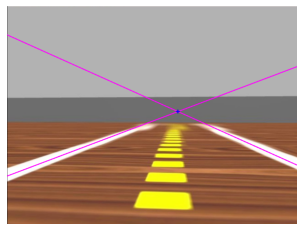

In [19]:
img, pontof = biblioteca2.calcular_ponto_de_fuga(img, equacoes)

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

print("Ponto de Fuga: " + str(pontof))
# Saida Esperada (aproximado):
# Ponto de Fuga: (519, 329)